In [24]:
import pandas as pd
import numpy as np

import time

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from catboost import CatBoostClassifier

import shap

In [25]:
df =  pd.read_csv("./dataset/creditcard.csv")

In [26]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [27]:
df.shape

(284807, 31)

In [28]:
df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [29]:
fraud = df[df['Class']==1]
normal = df[df['Class']==0]

print(f"Shape of Fraudulant transactions: {fraud.shape}")
print(f"Shape of Non-Fraudulant transactions: {normal.shape}")

Shape of Fraudulant transactions: (492, 31)
Shape of Non-Fraudulant transactions: (284315, 31)


In [30]:
pd.concat([fraud.Amount.describe(), normal.Amount.describe()], axis=1)

,Amount,Amount
count,492.000000,284315.000000
mean,122.211321,88.291022
std,256.683288,250.105092
min,0.000000,0.000000
25%,1.000000,5.650000
50%,9.250000,22.000000
75%,105.890000,77.050000
max,2125.870000,25691.160000


In [31]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score

def print_score(label, prediction, train=True):
    if train:
        clf_report = pd.DataFrame(classification_report(label, prediction, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(label, prediction) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Classification Report:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, prediction)}\n")
        
    elif train==False:
        clf_report = pd.DataFrame(classification_report(label, prediction, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(label, prediction) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Classification Report:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(label, prediction)}\n") 

In [32]:
x = df.drop('Class', axis=1)
y = df.Class

In [33]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [34]:
x_train.shape

(199364, 30)

In [35]:
model = CatBoostClassifier()
start = time.time()
model.fit(x_train, y_train)
stop = time.time()

print(f"Training time: {(stop - start) * 1000 }ms")

prediction = model.predict(x_test)

Learning rate set to 0.098829
0:	learn: 0.3679093	total: 27.4ms	remaining: 27.4s
1:	learn: 0.2033041	total: 49.1ms	remaining: 24.5s
2:	learn: 0.1097675	total: 69.8ms	remaining: 23.2s
3:	learn: 0.0627602	total: 90.3ms	remaining: 22.5s
4:	learn: 0.0368578	total: 111ms	remaining: 22.1s
5:	learn: 0.0227758	total: 131ms	remaining: 21.7s
6:	learn: 0.0156666	total: 152ms	remaining: 21.6s
7:	learn: 0.0114794	total: 174ms	remaining: 21.5s
8:	learn: 0.0088177	total: 195ms	remaining: 21.4s
9:	learn: 0.0070298	total: 215ms	remaining: 21.3s
10:	learn: 0.0058609	total: 234ms	remaining: 21s
11:	learn: 0.0050548	total: 253ms	remaining: 20.8s
12:	learn: 0.0045026	total: 273ms	remaining: 20.7s
13:	learn: 0.0041106	total: 293ms	remaining: 20.6s
14:	learn: 0.0038066	total: 314ms	remaining: 20.6s
15:	learn: 0.0035700	total: 333ms	remaining: 20.5s
16:	learn: 0.0033970	total: 354ms	remaining: 20.4s
17:	learn: 0.0032522	total: 376ms	remaining: 20.5s
18:	learn: 0.0031419	total: 396ms	remaining: 20.4s
19:	learn

161:	learn: 0.0013376	total: 3.34s	remaining: 17.3s
162:	learn: 0.0013365	total: 3.36s	remaining: 17.3s
163:	learn: 0.0013318	total: 3.38s	remaining: 17.2s
164:	learn: 0.0013298	total: 3.4s	remaining: 17.2s
165:	learn: 0.0013277	total: 3.42s	remaining: 17.2s
166:	learn: 0.0013245	total: 3.44s	remaining: 17.2s
167:	learn: 0.0013220	total: 3.46s	remaining: 17.1s
168:	learn: 0.0013184	total: 3.48s	remaining: 17.1s
169:	learn: 0.0013168	total: 3.5s	remaining: 17.1s
170:	learn: 0.0013111	total: 3.52s	remaining: 17.1s
171:	learn: 0.0013055	total: 3.54s	remaining: 17s
172:	learn: 0.0013016	total: 3.56s	remaining: 17s
173:	learn: 0.0012976	total: 3.58s	remaining: 17s
174:	learn: 0.0012963	total: 3.6s	remaining: 17s
175:	learn: 0.0012862	total: 3.62s	remaining: 16.9s
176:	learn: 0.0012827	total: 3.64s	remaining: 16.9s
177:	learn: 0.0012809	total: 3.66s	remaining: 16.9s
178:	learn: 0.0012791	total: 3.68s	remaining: 16.9s
179:	learn: 0.0012774	total: 3.7s	remaining: 16.8s
180:	learn: 0.0012738	to

324:	learn: 0.0008861	total: 6.71s	remaining: 13.9s
325:	learn: 0.0008847	total: 6.74s	remaining: 13.9s
326:	learn: 0.0008836	total: 6.75s	remaining: 13.9s
327:	learn: 0.0008825	total: 6.78s	remaining: 13.9s
328:	learn: 0.0008803	total: 6.8s	remaining: 13.9s
329:	learn: 0.0008776	total: 6.82s	remaining: 13.8s
330:	learn: 0.0008720	total: 6.84s	remaining: 13.8s
331:	learn: 0.0008715	total: 6.86s	remaining: 13.8s
332:	learn: 0.0008681	total: 6.88s	remaining: 13.8s
333:	learn: 0.0008655	total: 6.9s	remaining: 13.8s
334:	learn: 0.0008645	total: 6.92s	remaining: 13.7s
335:	learn: 0.0008610	total: 6.94s	remaining: 13.7s
336:	learn: 0.0008571	total: 6.96s	remaining: 13.7s
337:	learn: 0.0008545	total: 6.98s	remaining: 13.7s
338:	learn: 0.0008498	total: 7s	remaining: 13.7s
339:	learn: 0.0008476	total: 7.02s	remaining: 13.6s
340:	learn: 0.0008467	total: 7.04s	remaining: 13.6s
341:	learn: 0.0008453	total: 7.06s	remaining: 13.6s
342:	learn: 0.0008444	total: 7.08s	remaining: 13.6s
343:	learn: 0.000

484:	learn: 0.0005109	total: 10s	remaining: 10.6s
485:	learn: 0.0005096	total: 10s	remaining: 10.6s
486:	learn: 0.0005076	total: 10s	remaining: 10.6s
487:	learn: 0.0005062	total: 10.1s	remaining: 10.6s
488:	learn: 0.0005043	total: 10.1s	remaining: 10.5s
489:	learn: 0.0005023	total: 10.1s	remaining: 10.5s
490:	learn: 0.0005005	total: 10.1s	remaining: 10.5s
491:	learn: 0.0004988	total: 10.2s	remaining: 10.5s
492:	learn: 0.0004970	total: 10.2s	remaining: 10.5s
493:	learn: 0.0004951	total: 10.2s	remaining: 10.4s
494:	learn: 0.0004945	total: 10.2s	remaining: 10.4s
495:	learn: 0.0004940	total: 10.2s	remaining: 10.4s
496:	learn: 0.0004926	total: 10.3s	remaining: 10.4s
497:	learn: 0.0004915	total: 10.3s	remaining: 10.4s
498:	learn: 0.0004904	total: 10.3s	remaining: 10.3s
499:	learn: 0.0004901	total: 10.3s	remaining: 10.3s
500:	learn: 0.0004879	total: 10.3s	remaining: 10.3s
501:	learn: 0.0004876	total: 10.4s	remaining: 10.3s
502:	learn: 0.0004863	total: 10.4s	remaining: 10.3s
503:	learn: 0.0004

643:	learn: 0.0003120	total: 13.4s	remaining: 7.39s
644:	learn: 0.0003089	total: 13.4s	remaining: 7.37s
645:	learn: 0.0003076	total: 13.4s	remaining: 7.35s
646:	learn: 0.0003062	total: 13.4s	remaining: 7.33s
647:	learn: 0.0003042	total: 13.5s	remaining: 7.31s
648:	learn: 0.0003018	total: 13.5s	remaining: 7.29s
649:	learn: 0.0003011	total: 13.5s	remaining: 7.27s
650:	learn: 0.0003002	total: 13.5s	remaining: 7.25s
651:	learn: 0.0002982	total: 13.5s	remaining: 7.23s
652:	learn: 0.0002971	total: 13.6s	remaining: 7.21s
653:	learn: 0.0002948	total: 13.6s	remaining: 7.19s
654:	learn: 0.0002943	total: 13.6s	remaining: 7.17s
655:	learn: 0.0002935	total: 13.6s	remaining: 7.15s
656:	learn: 0.0002923	total: 13.6s	remaining: 7.13s
657:	learn: 0.0002918	total: 13.7s	remaining: 7.11s
658:	learn: 0.0002915	total: 13.7s	remaining: 7.09s
659:	learn: 0.0002909	total: 13.7s	remaining: 7.07s
660:	learn: 0.0002901	total: 13.7s	remaining: 7.04s
661:	learn: 0.0002897	total: 13.8s	remaining: 7.02s
662:	learn: 

804:	learn: 0.0002027	total: 16.8s	remaining: 4.06s
805:	learn: 0.0002026	total: 16.8s	remaining: 4.04s
806:	learn: 0.0002025	total: 16.8s	remaining: 4.02s
807:	learn: 0.0002020	total: 16.8s	remaining: 4s
808:	learn: 0.0002020	total: 16.9s	remaining: 3.98s
809:	learn: 0.0002015	total: 16.9s	remaining: 3.96s
810:	learn: 0.0002011	total: 16.9s	remaining: 3.94s
811:	learn: 0.0002005	total: 16.9s	remaining: 3.92s
812:	learn: 0.0002000	total: 16.9s	remaining: 3.9s
813:	learn: 0.0001993	total: 17s	remaining: 3.87s
814:	learn: 0.0001986	total: 17s	remaining: 3.85s
815:	learn: 0.0001985	total: 17s	remaining: 3.83s
816:	learn: 0.0001981	total: 17s	remaining: 3.81s
817:	learn: 0.0001977	total: 17s	remaining: 3.79s
818:	learn: 0.0001974	total: 17.1s	remaining: 3.77s
819:	learn: 0.0001971	total: 17.1s	remaining: 3.75s
820:	learn: 0.0001965	total: 17.1s	remaining: 3.73s
821:	learn: 0.0001961	total: 17.1s	remaining: 3.71s
822:	learn: 0.0001957	total: 17.1s	remaining: 3.69s
823:	learn: 0.0001950	tota

964:	learn: 0.0001494	total: 20.1s	remaining: 728ms
965:	learn: 0.0001484	total: 20.1s	remaining: 708ms
966:	learn: 0.0001479	total: 20.1s	remaining: 687ms
967:	learn: 0.0001478	total: 20.1s	remaining: 666ms
968:	learn: 0.0001477	total: 20.2s	remaining: 645ms
969:	learn: 0.0001476	total: 20.2s	remaining: 624ms
970:	learn: 0.0001474	total: 20.2s	remaining: 604ms
971:	learn: 0.0001471	total: 20.2s	remaining: 583ms
972:	learn: 0.0001470	total: 20.2s	remaining: 562ms
973:	learn: 0.0001464	total: 20.3s	remaining: 541ms
974:	learn: 0.0001464	total: 20.3s	remaining: 520ms
975:	learn: 0.0001463	total: 20.3s	remaining: 499ms
976:	learn: 0.0001456	total: 20.3s	remaining: 479ms
977:	learn: 0.0001455	total: 20.3s	remaining: 458ms
978:	learn: 0.0001450	total: 20.4s	remaining: 437ms
979:	learn: 0.0001447	total: 20.4s	remaining: 416ms
980:	learn: 0.0001435	total: 20.4s	remaining: 395ms
981:	learn: 0.0001434	total: 20.4s	remaining: 374ms
982:	learn: 0.0001432	total: 20.4s	remaining: 354ms
983:	learn: 

In [36]:
import shap

explainer = shap.Explainer(model)
shap_values = explainer.shap_values(x_train)

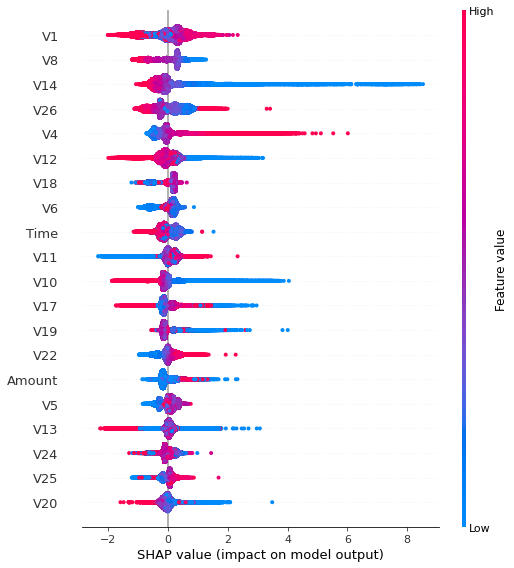

In [37]:
shap.initjs()

shap.summary_plot(shap_values, x_train)

In [38]:
vals= np.abs(shap_values).mean(0)
feature_importance = pd.DataFrame(list(zip(x_train.columns,vals)),columns=['feature_name','importance_value'])
feature_importance.sort_values(by=['importance_value'],ascending=False,inplace=True)

print(feature_importance.to_latex())

\begin{tabular}{llr}
\toprule
{} & feature\_name &  importance\_value \\
\midrule
1  &           V1 &          0.472765 \\
8  &           V8 &          0.428965 \\
14 &          V14 &          0.422216 \\
26 &          V26 &          0.399885 \\
4  &           V4 &          0.369031 \\
12 &          V12 &          0.248363 \\
18 &          V18 &          0.243715 \\
6  &           V6 &          0.243385 \\
0  &         Time &          0.225249 \\
11 &          V11 &          0.224930 \\
10 &          V10 &          0.213875 \\
17 &          V17 &          0.207019 \\
19 &          V19 &          0.192894 \\
22 &          V22 &          0.192109 \\
29 &       Amount &          0.191429 \\
5  &           V5 &          0.180814 \\
13 &          V13 &          0.176474 \\
24 &          V24 &          0.171885 \\
25 &          V25 &          0.154489 \\
20 &          V20 &          0.131343 \\
2  &           V2 &          0.122273 \\
15 &          V15 &          0.111868 \\
3  &           V

In [39]:
def get_feature_names(df, p_value=None):
    filtered_array = []
    for index, row in df.iterrows():
        if p_value != None:
            if row['importance_value'] >= p_value:
                filtered_array.append(row['feature_name'])
    
    return filtered_array

In [40]:
import os

measures_data = []
featured_names = []

def get_measures(feature, classification_report, training_time, shap_value, storage): 
    accuracy = classification_report["accuracy"]
    measures_data.append([feature, accuracy, training_time, shap_value, storage])

def train_model(feature, shap_value):
    featured_names.append(feature)
    aux = df[featured_names]
    print(f"Shape: {aux.shape}s")
    
    x_train, x_test, y_train, y_test = train_test_split(aux, y, train_size=0.7)

    model = CatBoostClassifier()
    start = time.time()
    model.fit(x_train, y_train)
    stop = time.time()
    
    prediction = model.predict(x_test)
    
    print(f"Training time: {(stop - start) * 1000 }ms")
    print(f"Training with features: {featured_names}s")
    
    storage = get_storage(featured_names)
    training_time = (stop - start) * 1000
    classification = classification_report(y_test, prediction, output_dict=True)
    get_measures(feature, classification, training_time, shap_value, storage)
    
def get_storage(features):
    merged_features = ['Class'] + features
    temp = df[merged_features]
    temp.to_csv('./dataset/temp.csv')
    
    return os.stat('./dataset/temp.csv').st_size
            
def shap_all(df):
    for index, row in df.iterrows():
        train_model(row['feature_name'], row['importance_value'])

In [ ]:
shap_all(feature_importance)

measures_df = pd.DataFrame(measures_data, columns = ['Feature Name', 'Accuracy', 'Training Time', 'Shap Value', 'Storage'])
measures_df.to_csv('./results/catboost/cc-fraud-catboost-report.csv')

Shape: (284807, 1)s
Learning rate set to 0.098829
0:	learn: 0.4067670	total: 24.6ms	remaining: 24.6s
1:	learn: 0.2464586	total: 41.7ms	remaining: 20.8s
2:	learn: 0.1515373	total: 60.9ms	remaining: 20.3s
3:	learn: 0.0968136	total: 77.6ms	remaining: 19.3s
4:	learn: 0.0655497	total: 98.1ms	remaining: 19.5s
5:	learn: 0.0468069	total: 121ms	remaining: 20.1s
6:	learn: 0.0351334	total: 145ms	remaining: 20.6s
7:	learn: 0.0277625	total: 168ms	remaining: 20.8s
8:	learn: 0.0229045	total: 187ms	remaining: 20.5s
9:	learn: 0.0194681	total: 209ms	remaining: 20.7s
10:	learn: 0.0170860	total: 230ms	remaining: 20.7s
11:	learn: 0.0155086	total: 248ms	remaining: 20.4s
12:	learn: 0.0142992	total: 266ms	remaining: 20.2s
13:	learn: 0.0134221	total: 284ms	remaining: 20s
14:	learn: 0.0127300	total: 303ms	remaining: 19.9s
15:	learn: 0.0122322	total: 323ms	remaining: 19.8s
16:	learn: 0.0118546	total: 341ms	remaining: 19.7s
17:	learn: 0.0115745	total: 359ms	remaining: 19.6s
18:	learn: 0.0113694	total: 376ms	remai

168:	learn: 0.0103343	total: 3.02s	remaining: 14.9s
169:	learn: 0.0103339	total: 3.03s	remaining: 14.8s
170:	learn: 0.0103306	total: 3.06s	remaining: 14.8s
171:	learn: 0.0103283	total: 3.08s	remaining: 14.8s
172:	learn: 0.0103278	total: 3.1s	remaining: 14.8s
173:	learn: 0.0103277	total: 3.11s	remaining: 14.8s
174:	learn: 0.0103276	total: 3.13s	remaining: 14.7s
175:	learn: 0.0103256	total: 3.15s	remaining: 14.7s
176:	learn: 0.0103252	total: 3.16s	remaining: 14.7s
177:	learn: 0.0103210	total: 3.18s	remaining: 14.7s
178:	learn: 0.0103184	total: 3.2s	remaining: 14.7s
179:	learn: 0.0103168	total: 3.22s	remaining: 14.7s
180:	learn: 0.0103134	total: 3.24s	remaining: 14.7s
181:	learn: 0.0103089	total: 3.26s	remaining: 14.7s
182:	learn: 0.0103086	total: 3.28s	remaining: 14.6s
183:	learn: 0.0103075	total: 3.29s	remaining: 14.6s
184:	learn: 0.0103058	total: 3.31s	remaining: 14.6s
185:	learn: 0.0103057	total: 3.33s	remaining: 14.6s
186:	learn: 0.0103039	total: 3.35s	remaining: 14.6s
187:	learn: 0.

333:	learn: 0.0100949	total: 6.15s	remaining: 12.3s
334:	learn: 0.0100937	total: 6.17s	remaining: 12.3s
335:	learn: 0.0100928	total: 6.19s	remaining: 12.2s
336:	learn: 0.0100919	total: 6.21s	remaining: 12.2s
337:	learn: 0.0100913	total: 6.23s	remaining: 12.2s
338:	learn: 0.0100912	total: 6.25s	remaining: 12.2s
339:	learn: 0.0100904	total: 6.27s	remaining: 12.2s
340:	learn: 0.0100902	total: 6.29s	remaining: 12.1s
341:	learn: 0.0100895	total: 6.3s	remaining: 12.1s
342:	learn: 0.0100891	total: 6.32s	remaining: 12.1s
343:	learn: 0.0100883	total: 6.34s	remaining: 12.1s
344:	learn: 0.0100880	total: 6.36s	remaining: 12.1s
345:	learn: 0.0100872	total: 6.37s	remaining: 12s
346:	learn: 0.0100867	total: 6.39s	remaining: 12s
347:	learn: 0.0100866	total: 6.41s	remaining: 12s
348:	learn: 0.0100866	total: 6.43s	remaining: 12s
349:	learn: 0.0100855	total: 6.45s	remaining: 12s
350:	learn: 0.0100846	total: 6.47s	remaining: 12s
351:	learn: 0.0100845	total: 6.49s	remaining: 11.9s
352:	learn: 0.0100844	tot

492:	learn: 0.0100186	total: 9.08s	remaining: 9.34s
493:	learn: 0.0100181	total: 9.1s	remaining: 9.32s
494:	learn: 0.0100180	total: 9.12s	remaining: 9.3s
495:	learn: 0.0100180	total: 9.13s	remaining: 9.28s
496:	learn: 0.0100180	total: 9.15s	remaining: 9.26s
497:	learn: 0.0100180	total: 9.16s	remaining: 9.24s
498:	learn: 0.0100180	total: 9.18s	remaining: 9.21s
499:	learn: 0.0100180	total: 9.19s	remaining: 9.19s
500:	learn: 0.0100180	total: 9.2s	remaining: 9.17s
501:	learn: 0.0100180	total: 9.22s	remaining: 9.14s
502:	learn: 0.0100180	total: 9.23s	remaining: 9.12s
503:	learn: 0.0100180	total: 9.24s	remaining: 9.1s
504:	learn: 0.0100180	total: 9.26s	remaining: 9.07s
505:	learn: 0.0100180	total: 9.27s	remaining: 9.05s
506:	learn: 0.0100180	total: 9.28s	remaining: 9.03s
507:	learn: 0.0100180	total: 9.3s	remaining: 9.01s
508:	learn: 0.0100175	total: 9.32s	remaining: 8.99s
509:	learn: 0.0100170	total: 9.33s	remaining: 8.97s
510:	learn: 0.0100168	total: 9.35s	remaining: 8.95s
511:	learn: 0.010

656:	learn: 0.0100121	total: 11.4s	remaining: 5.96s
657:	learn: 0.0100121	total: 11.4s	remaining: 5.94s
658:	learn: 0.0100121	total: 11.4s	remaining: 5.92s
659:	learn: 0.0100121	total: 11.5s	remaining: 5.9s
660:	learn: 0.0100121	total: 11.5s	remaining: 5.88s
661:	learn: 0.0100121	total: 11.5s	remaining: 5.86s
662:	learn: 0.0100121	total: 11.5s	remaining: 5.84s
663:	learn: 0.0100121	total: 11.5s	remaining: 5.82s
664:	learn: 0.0100121	total: 11.5s	remaining: 5.8s
665:	learn: 0.0100121	total: 11.5s	remaining: 5.78s
666:	learn: 0.0100121	total: 11.6s	remaining: 5.77s
667:	learn: 0.0100120	total: 11.6s	remaining: 5.75s
668:	learn: 0.0100115	total: 11.6s	remaining: 5.73s
669:	learn: 0.0100113	total: 11.6s	remaining: 5.71s
670:	learn: 0.0100112	total: 11.6s	remaining: 5.7s
671:	learn: 0.0100109	total: 11.6s	remaining: 5.68s
672:	learn: 0.0100101	total: 11.7s	remaining: 5.67s
673:	learn: 0.0100099	total: 11.7s	remaining: 5.65s
674:	learn: 0.0100098	total: 11.7s	remaining: 5.63s
675:	learn: 0.0

817:	learn: 0.0099881	total: 14.3s	remaining: 3.17s
818:	learn: 0.0099878	total: 14.3s	remaining: 3.16s
819:	learn: 0.0099874	total: 14.3s	remaining: 3.14s
820:	learn: 0.0099873	total: 14.3s	remaining: 3.12s
821:	learn: 0.0099873	total: 14.3s	remaining: 3.1s
822:	learn: 0.0099873	total: 14.3s	remaining: 3.09s
823:	learn: 0.0099873	total: 14.4s	remaining: 3.07s
824:	learn: 0.0099873	total: 14.4s	remaining: 3.05s
825:	learn: 0.0099873	total: 14.4s	remaining: 3.03s
826:	learn: 0.0099873	total: 14.4s	remaining: 3.01s
827:	learn: 0.0099871	total: 14.4s	remaining: 3s
828:	learn: 0.0099871	total: 14.4s	remaining: 2.98s
829:	learn: 0.0099868	total: 14.5s	remaining: 2.96s
830:	learn: 0.0099868	total: 14.5s	remaining: 2.94s
831:	learn: 0.0099865	total: 14.5s	remaining: 2.93s
832:	learn: 0.0099863	total: 14.5s	remaining: 2.91s
833:	learn: 0.0099859	total: 14.5s	remaining: 2.89s
834:	learn: 0.0099857	total: 14.6s	remaining: 2.88s
835:	learn: 0.0099856	total: 14.6s	remaining: 2.86s
836:	learn: 0.00

976:	learn: 0.0099690	total: 17.3s	remaining: 406ms
977:	learn: 0.0099686	total: 17.3s	remaining: 389ms
978:	learn: 0.0099683	total: 17.3s	remaining: 371ms
979:	learn: 0.0099683	total: 17.3s	remaining: 353ms
980:	learn: 0.0099682	total: 17.3s	remaining: 336ms
981:	learn: 0.0099682	total: 17.4s	remaining: 318ms
982:	learn: 0.0099680	total: 17.4s	remaining: 301ms
983:	learn: 0.0099680	total: 17.4s	remaining: 283ms
984:	learn: 0.0099677	total: 17.4s	remaining: 265ms
985:	learn: 0.0099677	total: 17.4s	remaining: 247ms
986:	learn: 0.0099677	total: 17.4s	remaining: 230ms
987:	learn: 0.0099677	total: 17.5s	remaining: 212ms
988:	learn: 0.0099676	total: 17.5s	remaining: 194ms
989:	learn: 0.0099674	total: 17.5s	remaining: 177ms
990:	learn: 0.0099672	total: 17.5s	remaining: 159ms
991:	learn: 0.0099672	total: 17.5s	remaining: 141ms
992:	learn: 0.0099671	total: 17.5s	remaining: 124ms
993:	learn: 0.0099671	total: 17.6s	remaining: 106ms
994:	learn: 0.0099671	total: 17.6s	remaining: 88.3ms
995:	learn:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


Shape: (284807, 2)s
Learning rate set to 0.098829
0:	learn: 0.4118285	total: 21.5ms	remaining: 21.5s
1:	learn: 0.2418236	total: 43.5ms	remaining: 21.7s
2:	learn: 0.1499875	total: 61.8ms	remaining: 20.5s
3:	learn: 0.0955437	total: 80.2ms	remaining: 20s
4:	learn: 0.0640380	total: 99.5ms	remaining: 19.8s
5:	learn: 0.0455530	total: 117ms	remaining: 19.5s
6:	learn: 0.0341610	total: 140ms	remaining: 19.9s
7:	learn: 0.0268593	total: 158ms	remaining: 19.6s
8:	learn: 0.0220353	total: 177ms	remaining: 19.5s
9:	learn: 0.0187785	total: 193ms	remaining: 19.1s
10:	learn: 0.0166151	total: 211ms	remaining: 18.9s
11:	learn: 0.0150351	total: 227ms	remaining: 18.7s
12:	learn: 0.0138993	total: 244ms	remaining: 18.6s
13:	learn: 0.0130902	total: 260ms	remaining: 18.3s
14:	learn: 0.0124832	total: 277ms	remaining: 18.2s
15:	learn: 0.0120124	total: 294ms	remaining: 18.1s
16:	learn: 0.0116746	total: 311ms	remaining: 18s
17:	learn: 0.0114061	total: 328ms	remaining: 17.9s
18:	learn: 0.0112049	total: 347ms	remaini

162:	learn: 0.0097099	total: 3.05s	remaining: 15.7s
163:	learn: 0.0097075	total: 3.07s	remaining: 15.7s
164:	learn: 0.0097056	total: 3.09s	remaining: 15.6s
165:	learn: 0.0097016	total: 3.11s	remaining: 15.6s
166:	learn: 0.0096984	total: 3.13s	remaining: 15.6s
167:	learn: 0.0096922	total: 3.15s	remaining: 15.6s
168:	learn: 0.0096886	total: 3.17s	remaining: 15.6s
169:	learn: 0.0096832	total: 3.19s	remaining: 15.6s
170:	learn: 0.0096829	total: 3.2s	remaining: 15.5s
171:	learn: 0.0096773	total: 3.22s	remaining: 15.5s
172:	learn: 0.0096752	total: 3.24s	remaining: 15.5s
173:	learn: 0.0096719	total: 3.26s	remaining: 15.5s
174:	learn: 0.0096670	total: 3.28s	remaining: 15.4s
175:	learn: 0.0096648	total: 3.29s	remaining: 15.4s
176:	learn: 0.0096604	total: 3.31s	remaining: 15.4s
177:	learn: 0.0096584	total: 3.33s	remaining: 15.4s
178:	learn: 0.0096563	total: 3.35s	remaining: 15.4s
179:	learn: 0.0096533	total: 3.37s	remaining: 15.3s
180:	learn: 0.0096517	total: 3.38s	remaining: 15.3s
181:	learn: 0

322:	learn: 0.0092091	total: 5.98s	remaining: 12.5s
323:	learn: 0.0092048	total: 6s	remaining: 12.5s
324:	learn: 0.0092022	total: 6.01s	remaining: 12.5s
325:	learn: 0.0091996	total: 6.03s	remaining: 12.5s
326:	learn: 0.0091932	total: 6.05s	remaining: 12.5s
327:	learn: 0.0091889	total: 6.07s	remaining: 12.4s
328:	learn: 0.0091870	total: 6.09s	remaining: 12.4s
329:	learn: 0.0091852	total: 6.11s	remaining: 12.4s
330:	learn: 0.0091809	total: 6.12s	remaining: 12.4s
331:	learn: 0.0091780	total: 6.14s	remaining: 12.4s
332:	learn: 0.0091736	total: 6.16s	remaining: 12.3s
333:	learn: 0.0091715	total: 6.17s	remaining: 12.3s
334:	learn: 0.0091681	total: 6.19s	remaining: 12.3s
335:	learn: 0.0091658	total: 6.21s	remaining: 12.3s
336:	learn: 0.0091623	total: 6.23s	remaining: 12.3s
337:	learn: 0.0091566	total: 6.25s	remaining: 12.2s
338:	learn: 0.0091511	total: 6.26s	remaining: 12.2s
339:	learn: 0.0091476	total: 6.29s	remaining: 12.2s
340:	learn: 0.0091459	total: 6.3s	remaining: 12.2s
341:	learn: 0.00

487:	learn: 0.0087546	total: 8.95s	remaining: 9.38s
488:	learn: 0.0087531	total: 8.96s	remaining: 9.37s
489:	learn: 0.0087521	total: 8.98s	remaining: 9.35s
490:	learn: 0.0087502	total: 9s	remaining: 9.33s
491:	learn: 0.0087474	total: 9.02s	remaining: 9.31s
492:	learn: 0.0087466	total: 9.04s	remaining: 9.29s
493:	learn: 0.0087447	total: 9.06s	remaining: 9.28s
494:	learn: 0.0087420	total: 9.07s	remaining: 9.26s
495:	learn: 0.0087402	total: 9.09s	remaining: 9.24s
496:	learn: 0.0087384	total: 9.11s	remaining: 9.22s
497:	learn: 0.0087367	total: 9.13s	remaining: 9.2s
498:	learn: 0.0087331	total: 9.15s	remaining: 9.19s
499:	learn: 0.0087316	total: 9.17s	remaining: 9.17s
500:	learn: 0.0087282	total: 9.19s	remaining: 9.15s
501:	learn: 0.0087278	total: 9.2s	remaining: 9.13s
502:	learn: 0.0087245	total: 9.22s	remaining: 9.11s
503:	learn: 0.0087214	total: 9.24s	remaining: 9.09s
504:	learn: 0.0087168	total: 9.26s	remaining: 9.07s
505:	learn: 0.0087136	total: 9.28s	remaining: 9.05s
506:	learn: 0.008

652:	learn: 0.0083545	total: 12.1s	remaining: 6.45s
653:	learn: 0.0083508	total: 12.2s	remaining: 6.43s
654:	learn: 0.0083487	total: 12.2s	remaining: 6.41s
655:	learn: 0.0083440	total: 12.2s	remaining: 6.39s
656:	learn: 0.0083416	total: 12.2s	remaining: 6.38s
657:	learn: 0.0083378	total: 12.2s	remaining: 6.36s
658:	learn: 0.0083358	total: 12.3s	remaining: 6.34s
659:	learn: 0.0083341	total: 12.3s	remaining: 6.32s
660:	learn: 0.0083321	total: 12.3s	remaining: 6.3s
661:	learn: 0.0083314	total: 12.3s	remaining: 6.28s
662:	learn: 0.0083292	total: 12.3s	remaining: 6.26s
663:	learn: 0.0083282	total: 12.3s	remaining: 6.25s
664:	learn: 0.0083252	total: 12.4s	remaining: 6.23s
665:	learn: 0.0083219	total: 12.4s	remaining: 6.21s
666:	learn: 0.0083198	total: 12.4s	remaining: 6.19s
667:	learn: 0.0083179	total: 12.4s	remaining: 6.17s
668:	learn: 0.0083164	total: 12.4s	remaining: 6.16s
669:	learn: 0.0083154	total: 12.5s	remaining: 6.14s
670:	learn: 0.0083142	total: 12.5s	remaining: 6.12s
671:	learn: 0

820:	learn: 0.0080067	total: 15.6s	remaining: 3.39s
821:	learn: 0.0080037	total: 15.6s	remaining: 3.37s
822:	learn: 0.0080029	total: 15.6s	remaining: 3.35s
823:	learn: 0.0080023	total: 15.6s	remaining: 3.33s
824:	learn: 0.0079998	total: 15.6s	remaining: 3.31s
825:	learn: 0.0079991	total: 15.7s	remaining: 3.3s
826:	learn: 0.0079940	total: 15.7s	remaining: 3.28s
827:	learn: 0.0079940	total: 15.7s	remaining: 3.26s
828:	learn: 0.0079920	total: 15.7s	remaining: 3.24s
829:	learn: 0.0079876	total: 15.7s	remaining: 3.22s
830:	learn: 0.0079828	total: 15.8s	remaining: 3.2s
831:	learn: 0.0079787	total: 15.8s	remaining: 3.18s
832:	learn: 0.0079757	total: 15.8s	remaining: 3.17s
833:	learn: 0.0079741	total: 15.8s	remaining: 3.15s
834:	learn: 0.0079701	total: 15.8s	remaining: 3.13s
835:	learn: 0.0079700	total: 15.8s	remaining: 3.11s
836:	learn: 0.0079692	total: 15.9s	remaining: 3.09s
837:	learn: 0.0079661	total: 15.9s	remaining: 3.07s
838:	learn: 0.0079643	total: 15.9s	remaining: 3.05s
839:	learn: 0.

986:	learn: 0.0076881	total: 18.6s	remaining: 246ms
987:	learn: 0.0076877	total: 18.7s	remaining: 227ms
988:	learn: 0.0076867	total: 18.7s	remaining: 208ms
989:	learn: 0.0076866	total: 18.7s	remaining: 189ms
990:	learn: 0.0076831	total: 18.7s	remaining: 170ms
991:	learn: 0.0076824	total: 18.7s	remaining: 151ms
992:	learn: 0.0076793	total: 18.8s	remaining: 132ms
993:	learn: 0.0076769	total: 18.8s	remaining: 113ms
994:	learn: 0.0076766	total: 18.8s	remaining: 94.5ms
995:	learn: 0.0076753	total: 18.8s	remaining: 75.6ms
996:	learn: 0.0076744	total: 18.8s	remaining: 56.7ms
997:	learn: 0.0076713	total: 18.9s	remaining: 37.8ms
998:	learn: 0.0076703	total: 18.9s	remaining: 18.9ms
999:	learn: 0.0076688	total: 18.9s	remaining: 0us
Training time: 19277.41575241089ms
Training with features: ['V1', 'V8']s


Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


Shape: (284807, 3)s
Learning rate set to 0.098829
0:	learn: 0.3664186	total: 25.4ms	remaining: 25.3s
1:	learn: 0.1969539	total: 43.6ms	remaining: 21.7s
2:	learn: 0.1069568	total: 66ms	remaining: 21.9s
3:	learn: 0.0607251	total: 84ms	remaining: 20.9s
4:	learn: 0.0371615	total: 103ms	remaining: 20.4s
5:	learn: 0.0242245	total: 123ms	remaining: 20.4s
6:	learn: 0.0169384	total: 144ms	remaining: 20.4s
7:	learn: 0.0126308	total: 164ms	remaining: 20.3s
8:	learn: 0.0100012	total: 181ms	remaining: 20s
9:	learn: 0.0083278	total: 198ms	remaining: 19.6s
10:	learn: 0.0072111	total: 217ms	remaining: 19.5s
11:	learn: 0.0064419	total: 234ms	remaining: 19.3s
12:	learn: 0.0059024	total: 251ms	remaining: 19s
13:	learn: 0.0055011	total: 270ms	remaining: 19s
14:	learn: 0.0052100	total: 288ms	remaining: 18.9s
15:	learn: 0.0050140	total: 305ms	remaining: 18.8s
16:	learn: 0.0048528	total: 323ms	remaining: 18.7s
17:	learn: 0.0047306	total: 342ms	remaining: 18.7s
18:	learn: 0.0046447	total: 363ms	remaining: 18.

160:	learn: 0.0034000	total: 3.11s	remaining: 16.2s
161:	learn: 0.0033981	total: 3.13s	remaining: 16.2s
162:	learn: 0.0033963	total: 3.15s	remaining: 16.1s
163:	learn: 0.0033947	total: 3.17s	remaining: 16.1s
164:	learn: 0.0033914	total: 3.19s	remaining: 16.1s
165:	learn: 0.0033897	total: 3.2s	remaining: 16.1s
166:	learn: 0.0033881	total: 3.22s	remaining: 16.1s
167:	learn: 0.0033866	total: 3.24s	remaining: 16s
168:	learn: 0.0033846	total: 3.25s	remaining: 16s
169:	learn: 0.0033833	total: 3.27s	remaining: 16s
170:	learn: 0.0033811	total: 3.29s	remaining: 15.9s
171:	learn: 0.0033779	total: 3.3s	remaining: 15.9s
172:	learn: 0.0033767	total: 3.32s	remaining: 15.9s
173:	learn: 0.0033753	total: 3.34s	remaining: 15.9s
174:	learn: 0.0033730	total: 3.36s	remaining: 15.8s
175:	learn: 0.0033718	total: 3.38s	remaining: 15.8s
176:	learn: 0.0033708	total: 3.39s	remaining: 15.8s
177:	learn: 0.0033670	total: 3.41s	remaining: 15.8s
178:	learn: 0.0033642	total: 3.43s	remaining: 15.7s
179:	learn: 0.003363

326:	learn: 0.0029420	total: 6.21s	remaining: 12.8s
327:	learn: 0.0029408	total: 6.23s	remaining: 12.8s
328:	learn: 0.0029372	total: 6.25s	remaining: 12.7s
329:	learn: 0.0029359	total: 6.27s	remaining: 12.7s
330:	learn: 0.0029325	total: 6.28s	remaining: 12.7s
331:	learn: 0.0029302	total: 6.3s	remaining: 12.7s
332:	learn: 0.0029261	total: 6.32s	remaining: 12.7s
333:	learn: 0.0029231	total: 6.34s	remaining: 12.6s
334:	learn: 0.0029197	total: 6.36s	remaining: 12.6s
335:	learn: 0.0029175	total: 6.38s	remaining: 12.6s
336:	learn: 0.0029154	total: 6.39s	remaining: 12.6s
337:	learn: 0.0029133	total: 6.41s	remaining: 12.6s
338:	learn: 0.0029101	total: 6.43s	remaining: 12.5s
339:	learn: 0.0029077	total: 6.45s	remaining: 12.5s
340:	learn: 0.0029069	total: 6.47s	remaining: 12.5s
341:	learn: 0.0029051	total: 6.49s	remaining: 12.5s
342:	learn: 0.0029026	total: 6.5s	remaining: 12.5s
343:	learn: 0.0029008	total: 6.52s	remaining: 12.4s
344:	learn: 0.0028991	total: 6.54s	remaining: 12.4s
345:	learn: 0.

487:	learn: 0.0026228	total: 9.14s	remaining: 9.59s
488:	learn: 0.0026218	total: 9.16s	remaining: 9.57s
489:	learn: 0.0026209	total: 9.17s	remaining: 9.55s
490:	learn: 0.0026196	total: 9.19s	remaining: 9.53s
491:	learn: 0.0026182	total: 9.21s	remaining: 9.51s
492:	learn: 0.0026167	total: 9.23s	remaining: 9.49s
493:	learn: 0.0026152	total: 9.25s	remaining: 9.47s
494:	learn: 0.0026133	total: 9.27s	remaining: 9.45s
495:	learn: 0.0026115	total: 9.28s	remaining: 9.43s
496:	learn: 0.0026112	total: 9.3s	remaining: 9.41s
497:	learn: 0.0026102	total: 9.32s	remaining: 9.39s
498:	learn: 0.0026094	total: 9.34s	remaining: 9.37s
499:	learn: 0.0026080	total: 9.36s	remaining: 9.36s
500:	learn: 0.0026065	total: 9.37s	remaining: 9.33s
501:	learn: 0.0026037	total: 9.39s	remaining: 9.31s
502:	learn: 0.0026028	total: 9.4s	remaining: 9.29s
503:	learn: 0.0026020	total: 9.42s	remaining: 9.27s
504:	learn: 0.0026012	total: 9.44s	remaining: 9.25s
505:	learn: 0.0025999	total: 9.46s	remaining: 9.23s
506:	learn: 0.

654:	learn: 0.0023950	total: 12.1s	remaining: 6.37s
655:	learn: 0.0023942	total: 12.1s	remaining: 6.36s
656:	learn: 0.0023932	total: 12.1s	remaining: 6.34s
657:	learn: 0.0023901	total: 12.2s	remaining: 6.32s
658:	learn: 0.0023893	total: 12.2s	remaining: 6.3s
659:	learn: 0.0023883	total: 12.2s	remaining: 6.28s
660:	learn: 0.0023853	total: 12.2s	remaining: 6.26s
661:	learn: 0.0023828	total: 12.2s	remaining: 6.24s
662:	learn: 0.0023807	total: 12.2s	remaining: 6.22s
663:	learn: 0.0023795	total: 12.3s	remaining: 6.21s
664:	learn: 0.0023791	total: 12.3s	remaining: 6.18s
665:	learn: 0.0023758	total: 12.3s	remaining: 6.17s
666:	learn: 0.0023754	total: 12.3s	remaining: 6.15s
667:	learn: 0.0023743	total: 12.3s	remaining: 6.13s
668:	learn: 0.0023730	total: 12.4s	remaining: 6.11s
669:	learn: 0.0023712	total: 12.4s	remaining: 6.09s
670:	learn: 0.0023709	total: 12.4s	remaining: 6.07s
671:	learn: 0.0023702	total: 12.4s	remaining: 6.05s
672:	learn: 0.0023682	total: 12.4s	remaining: 6.04s
673:	learn: 0

817:	learn: 0.0021844	total: 15s	remaining: 3.34s
818:	learn: 0.0021839	total: 15s	remaining: 3.32s
819:	learn: 0.0021835	total: 15.1s	remaining: 3.31s
820:	learn: 0.0021824	total: 15.1s	remaining: 3.29s
821:	learn: 0.0021818	total: 15.1s	remaining: 3.27s
822:	learn: 0.0021788	total: 15.1s	remaining: 3.25s
823:	learn: 0.0021772	total: 15.1s	remaining: 3.23s
824:	learn: 0.0021770	total: 15.2s	remaining: 3.21s
825:	learn: 0.0021752	total: 15.2s	remaining: 3.2s
826:	learn: 0.0021715	total: 15.2s	remaining: 3.18s
827:	learn: 0.0021707	total: 15.2s	remaining: 3.16s
828:	learn: 0.0021696	total: 15.2s	remaining: 3.14s
829:	learn: 0.0021669	total: 15.2s	remaining: 3.12s
830:	learn: 0.0021663	total: 15.3s	remaining: 3.1s
831:	learn: 0.0021658	total: 15.3s	remaining: 3.08s
832:	learn: 0.0021647	total: 15.3s	remaining: 3.07s
833:	learn: 0.0021620	total: 15.3s	remaining: 3.05s
834:	learn: 0.0021615	total: 15.3s	remaining: 3.03s
835:	learn: 0.0021589	total: 15.3s	remaining: 3.01s
836:	learn: 0.0021

980:	learn: 0.0019734	total: 17.9s	remaining: 347ms
981:	learn: 0.0019728	total: 18s	remaining: 329ms
982:	learn: 0.0019719	total: 18s	remaining: 311ms
983:	learn: 0.0019687	total: 18s	remaining: 293ms
984:	learn: 0.0019681	total: 18s	remaining: 274ms
985:	learn: 0.0019679	total: 18s	remaining: 256ms
986:	learn: 0.0019666	total: 18s	remaining: 238ms
987:	learn: 0.0019661	total: 18.1s	remaining: 219ms
988:	learn: 0.0019658	total: 18.1s	remaining: 201ms
989:	learn: 0.0019654	total: 18.1s	remaining: 183ms
990:	learn: 0.0019633	total: 18.1s	remaining: 165ms
991:	learn: 0.0019619	total: 18.1s	remaining: 146ms
992:	learn: 0.0019616	total: 18.2s	remaining: 128ms
993:	learn: 0.0019611	total: 18.2s	remaining: 110ms
994:	learn: 0.0019608	total: 18.2s	remaining: 91.4ms
995:	learn: 0.0019607	total: 18.2s	remaining: 73.1ms
996:	learn: 0.0019589	total: 18.2s	remaining: 54.8ms
997:	learn: 0.0019585	total: 18.2s	remaining: 36.6ms
998:	learn: 0.0019569	total: 18.3s	remaining: 18.3ms
999:	learn: 0.00195

144:	learn: 0.0030049	total: 2.84s	remaining: 16.7s
145:	learn: 0.0029985	total: 2.86s	remaining: 16.7s
146:	learn: 0.0029960	total: 2.88s	remaining: 16.7s
147:	learn: 0.0029919	total: 2.9s	remaining: 16.7s
148:	learn: 0.0029846	total: 2.92s	remaining: 16.7s
149:	learn: 0.0029815	total: 2.94s	remaining: 16.6s
150:	learn: 0.0029781	total: 2.95s	remaining: 16.6s
151:	learn: 0.0029697	total: 2.97s	remaining: 16.6s
152:	learn: 0.0029650	total: 2.99s	remaining: 16.6s
153:	learn: 0.0029582	total: 3.01s	remaining: 16.5s
154:	learn: 0.0029505	total: 3.03s	remaining: 16.5s
155:	learn: 0.0029453	total: 3.05s	remaining: 16.5s
156:	learn: 0.0029363	total: 3.07s	remaining: 16.5s
157:	learn: 0.0029298	total: 3.09s	remaining: 16.5s
158:	learn: 0.0029260	total: 3.1s	remaining: 16.4s
159:	learn: 0.0029197	total: 3.12s	remaining: 16.4s
160:	learn: 0.0029093	total: 3.14s	remaining: 16.4s
161:	learn: 0.0029050	total: 3.16s	remaining: 16.3s
162:	learn: 0.0029010	total: 3.18s	remaining: 16.3s
163:	learn: 0.

313:	learn: 0.0023658	total: 5.96s	remaining: 13s
314:	learn: 0.0023609	total: 5.98s	remaining: 13s
315:	learn: 0.0023575	total: 6s	remaining: 13s
316:	learn: 0.0023559	total: 6.02s	remaining: 13s
317:	learn: 0.0023546	total: 6.04s	remaining: 13s
318:	learn: 0.0023531	total: 6.06s	remaining: 12.9s
319:	learn: 0.0023514	total: 6.08s	remaining: 12.9s
320:	learn: 0.0023506	total: 6.09s	remaining: 12.9s
321:	learn: 0.0023464	total: 6.11s	remaining: 12.9s
322:	learn: 0.0023439	total: 6.13s	remaining: 12.8s
323:	learn: 0.0023422	total: 6.15s	remaining: 12.8s
324:	learn: 0.0023405	total: 6.17s	remaining: 12.8s
325:	learn: 0.0023383	total: 6.18s	remaining: 12.8s
326:	learn: 0.0023352	total: 6.2s	remaining: 12.8s
327:	learn: 0.0023333	total: 6.22s	remaining: 12.7s
328:	learn: 0.0023300	total: 6.24s	remaining: 12.7s
329:	learn: 0.0023279	total: 6.25s	remaining: 12.7s
330:	learn: 0.0023271	total: 6.27s	remaining: 12.7s
331:	learn: 0.0023234	total: 6.29s	remaining: 12.7s
332:	learn: 0.0023216	tota

473:	learn: 0.0019922	total: 8.85s	remaining: 9.82s
474:	learn: 0.0019898	total: 8.87s	remaining: 9.8s
475:	learn: 0.0019885	total: 8.89s	remaining: 9.78s
476:	learn: 0.0019877	total: 8.9s	remaining: 9.76s
477:	learn: 0.0019856	total: 8.93s	remaining: 9.75s
478:	learn: 0.0019827	total: 8.94s	remaining: 9.73s
479:	learn: 0.0019805	total: 8.96s	remaining: 9.71s
480:	learn: 0.0019796	total: 8.98s	remaining: 9.69s
481:	learn: 0.0019773	total: 9s	remaining: 9.67s
482:	learn: 0.0019764	total: 9.01s	remaining: 9.65s
483:	learn: 0.0019747	total: 9.03s	remaining: 9.63s
484:	learn: 0.0019729	total: 9.05s	remaining: 9.61s
485:	learn: 0.0019697	total: 9.07s	remaining: 9.59s
486:	learn: 0.0019675	total: 9.09s	remaining: 9.57s
487:	learn: 0.0019649	total: 9.1s	remaining: 9.55s
488:	learn: 0.0019633	total: 9.12s	remaining: 9.53s
489:	learn: 0.0019623	total: 9.14s	remaining: 9.51s
490:	learn: 0.0019580	total: 9.16s	remaining: 9.49s
491:	learn: 0.0019558	total: 9.17s	remaining: 9.47s
492:	learn: 0.0019

638:	learn: 0.0016725	total: 11.8s	remaining: 6.67s
639:	learn: 0.0016710	total: 11.8s	remaining: 6.66s
640:	learn: 0.0016702	total: 11.9s	remaining: 6.64s
641:	learn: 0.0016697	total: 11.9s	remaining: 6.62s
642:	learn: 0.0016687	total: 11.9s	remaining: 6.6s
643:	learn: 0.0016675	total: 11.9s	remaining: 6.58s
644:	learn: 0.0016638	total: 11.9s	remaining: 6.56s
645:	learn: 0.0016630	total: 11.9s	remaining: 6.54s
646:	learn: 0.0016608	total: 12s	remaining: 6.53s
647:	learn: 0.0016592	total: 12s	remaining: 6.51s
648:	learn: 0.0016568	total: 12s	remaining: 6.49s
649:	learn: 0.0016560	total: 12s	remaining: 6.47s
650:	learn: 0.0016537	total: 12s	remaining: 6.45s
651:	learn: 0.0016526	total: 12.1s	remaining: 6.43s
652:	learn: 0.0016508	total: 12.1s	remaining: 6.42s
653:	learn: 0.0016484	total: 12.1s	remaining: 6.4s
654:	learn: 0.0016453	total: 12.1s	remaining: 6.38s
655:	learn: 0.0016447	total: 12.1s	remaining: 6.36s
656:	learn: 0.0016446	total: 12.1s	remaining: 6.34s
657:	learn: 0.0016436	to

806:	learn: 0.0014329	total: 14.9s	remaining: 3.56s
807:	learn: 0.0014311	total: 14.9s	remaining: 3.54s
808:	learn: 0.0014285	total: 14.9s	remaining: 3.52s
809:	learn: 0.0014279	total: 14.9s	remaining: 3.5s
810:	learn: 0.0014266	total: 14.9s	remaining: 3.48s
811:	learn: 0.0014241	total: 15s	remaining: 3.46s
812:	learn: 0.0014238	total: 15s	remaining: 3.45s
813:	learn: 0.0014230	total: 15s	remaining: 3.43s
814:	learn: 0.0014217	total: 15s	remaining: 3.41s
815:	learn: 0.0014216	total: 15s	remaining: 3.39s
816:	learn: 0.0014215	total: 15.1s	remaining: 3.37s
817:	learn: 0.0014209	total: 15.1s	remaining: 3.35s
818:	learn: 0.0014185	total: 15.1s	remaining: 3.33s
819:	learn: 0.0014180	total: 15.1s	remaining: 3.31s
820:	learn: 0.0014172	total: 15.1s	remaining: 3.3s
821:	learn: 0.0014161	total: 15.1s	remaining: 3.28s
822:	learn: 0.0014154	total: 15.2s	remaining: 3.26s
823:	learn: 0.0014142	total: 15.2s	remaining: 3.24s
824:	learn: 0.0014124	total: 15.2s	remaining: 3.22s
825:	learn: 0.0014100	to

968:	learn: 0.0012201	total: 18.3s	remaining: 584ms
969:	learn: 0.0012173	total: 18.3s	remaining: 566ms
970:	learn: 0.0012159	total: 18.3s	remaining: 547ms
971:	learn: 0.0012145	total: 18.3s	remaining: 528ms
972:	learn: 0.0012130	total: 18.3s	remaining: 509ms
973:	learn: 0.0012109	total: 18.4s	remaining: 490ms
974:	learn: 0.0012097	total: 18.4s	remaining: 471ms
975:	learn: 0.0012093	total: 18.4s	remaining: 452ms
976:	learn: 0.0012075	total: 18.4s	remaining: 434ms
977:	learn: 0.0012063	total: 18.4s	remaining: 415ms
978:	learn: 0.0012051	total: 18.5s	remaining: 396ms
979:	learn: 0.0012048	total: 18.5s	remaining: 377ms
980:	learn: 0.0012031	total: 18.5s	remaining: 358ms
981:	learn: 0.0012015	total: 18.5s	remaining: 339ms
982:	learn: 0.0012002	total: 18.5s	remaining: 320ms
983:	learn: 0.0011998	total: 18.5s	remaining: 302ms
984:	learn: 0.0011994	total: 18.6s	remaining: 283ms
985:	learn: 0.0011978	total: 18.6s	remaining: 264ms
986:	learn: 0.0011963	total: 18.6s	remaining: 245ms
987:	learn: 

134:	learn: 0.0023370	total: 2.67s	remaining: 17.1s
135:	learn: 0.0023324	total: 2.68s	remaining: 17.1s
136:	learn: 0.0023298	total: 2.71s	remaining: 17s
137:	learn: 0.0023107	total: 2.72s	remaining: 17s
138:	learn: 0.0023077	total: 2.74s	remaining: 17s
139:	learn: 0.0023043	total: 2.76s	remaining: 17s
140:	learn: 0.0023015	total: 2.78s	remaining: 16.9s
141:	learn: 0.0022956	total: 2.79s	remaining: 16.9s
142:	learn: 0.0022864	total: 2.81s	remaining: 16.9s
143:	learn: 0.0022825	total: 2.83s	remaining: 16.8s
144:	learn: 0.0022796	total: 2.85s	remaining: 16.8s
145:	learn: 0.0022757	total: 2.86s	remaining: 16.8s
146:	learn: 0.0022738	total: 2.88s	remaining: 16.7s
147:	learn: 0.0022682	total: 2.9s	remaining: 16.7s
148:	learn: 0.0022600	total: 2.92s	remaining: 16.7s
149:	learn: 0.0022551	total: 2.94s	remaining: 16.6s
150:	learn: 0.0022529	total: 2.95s	remaining: 16.6s
151:	learn: 0.0022504	total: 2.97s	remaining: 16.6s
152:	learn: 0.0022456	total: 2.99s	remaining: 16.5s
153:	learn: 0.0022390

294:	learn: 0.0018036	total: 5.55s	remaining: 13.3s
295:	learn: 0.0018025	total: 5.57s	remaining: 13.3s
296:	learn: 0.0018015	total: 5.59s	remaining: 13.2s
297:	learn: 0.0018007	total: 5.61s	remaining: 13.2s
298:	learn: 0.0017996	total: 5.63s	remaining: 13.2s
299:	learn: 0.0017978	total: 5.65s	remaining: 13.2s
300:	learn: 0.0017957	total: 5.66s	remaining: 13.2s
301:	learn: 0.0017924	total: 5.68s	remaining: 13.1s
302:	learn: 0.0017884	total: 5.7s	remaining: 13.1s
303:	learn: 0.0017761	total: 5.72s	remaining: 13.1s
304:	learn: 0.0017747	total: 5.74s	remaining: 13.1s
305:	learn: 0.0017726	total: 5.76s	remaining: 13.1s
306:	learn: 0.0017680	total: 5.78s	remaining: 13s
307:	learn: 0.0017650	total: 5.8s	remaining: 13s
308:	learn: 0.0017642	total: 5.82s	remaining: 13s
309:	learn: 0.0017629	total: 5.83s	remaining: 13s
310:	learn: 0.0017607	total: 5.85s	remaining: 13s
311:	learn: 0.0017595	total: 5.87s	remaining: 12.9s
312:	learn: 0.0017549	total: 5.89s	remaining: 12.9s
313:	learn: 0.0017538	to

454:	learn: 0.0014722	total: 8.46s	remaining: 10.1s
455:	learn: 0.0014717	total: 8.48s	remaining: 10.1s
456:	learn: 0.0014712	total: 8.51s	remaining: 10.1s
457:	learn: 0.0014692	total: 8.52s	remaining: 10.1s
458:	learn: 0.0014669	total: 8.54s	remaining: 10.1s
459:	learn: 0.0014660	total: 8.56s	remaining: 10s
460:	learn: 0.0014628	total: 8.58s	remaining: 10s
461:	learn: 0.0014606	total: 8.6s	remaining: 10s
462:	learn: 0.0014584	total: 8.62s	remaining: 9.99s
463:	learn: 0.0014580	total: 8.63s	remaining: 9.97s
464:	learn: 0.0014540	total: 8.65s	remaining: 9.95s
465:	learn: 0.0014535	total: 8.67s	remaining: 9.93s
466:	learn: 0.0014517	total: 8.69s	remaining: 9.92s
467:	learn: 0.0014511	total: 8.71s	remaining: 9.9s
468:	learn: 0.0014493	total: 8.73s	remaining: 9.88s
469:	learn: 0.0014474	total: 8.74s	remaining: 9.86s
470:	learn: 0.0014456	total: 8.76s	remaining: 9.84s
471:	learn: 0.0014443	total: 8.78s	remaining: 9.82s
472:	learn: 0.0014423	total: 8.8s	remaining: 9.8s
473:	learn: 0.0014406	

613:	learn: 0.0011854	total: 11.4s	remaining: 7.15s
614:	learn: 0.0011837	total: 11.4s	remaining: 7.13s
615:	learn: 0.0011831	total: 11.4s	remaining: 7.11s
616:	learn: 0.0011822	total: 11.4s	remaining: 7.09s
617:	learn: 0.0011811	total: 11.4s	remaining: 7.07s
618:	learn: 0.0011800	total: 11.5s	remaining: 7.05s
619:	learn: 0.0011788	total: 11.5s	remaining: 7.03s
620:	learn: 0.0011760	total: 11.5s	remaining: 7.02s
621:	learn: 0.0011749	total: 11.5s	remaining: 7s
622:	learn: 0.0011741	total: 11.5s	remaining: 6.98s
623:	learn: 0.0011733	total: 11.5s	remaining: 6.96s
624:	learn: 0.0011717	total: 11.6s	remaining: 6.94s
625:	learn: 0.0011688	total: 11.6s	remaining: 6.92s
626:	learn: 0.0011680	total: 11.6s	remaining: 6.91s
627:	learn: 0.0011675	total: 11.6s	remaining: 6.89s
628:	learn: 0.0011660	total: 11.6s	remaining: 6.87s
629:	learn: 0.0011647	total: 11.7s	remaining: 6.85s
630:	learn: 0.0011636	total: 11.7s	remaining: 6.83s
631:	learn: 0.0011628	total: 11.7s	remaining: 6.81s
632:	learn: 0.0

780:	learn: 0.0009671	total: 14.5s	remaining: 4.05s
781:	learn: 0.0009666	total: 14.5s	remaining: 4.04s
782:	learn: 0.0009659	total: 14.5s	remaining: 4.02s
783:	learn: 0.0009642	total: 14.5s	remaining: 4s
784:	learn: 0.0009608	total: 14.5s	remaining: 3.98s
785:	learn: 0.0009585	total: 14.6s	remaining: 3.96s
786:	learn: 0.0009583	total: 14.6s	remaining: 3.94s
787:	learn: 0.0009567	total: 14.6s	remaining: 3.92s
788:	learn: 0.0009564	total: 14.6s	remaining: 3.91s
789:	learn: 0.0009545	total: 14.6s	remaining: 3.89s
790:	learn: 0.0009531	total: 14.6s	remaining: 3.87s
791:	learn: 0.0009523	total: 14.7s	remaining: 3.85s
792:	learn: 0.0009515	total: 14.7s	remaining: 3.83s
793:	learn: 0.0009512	total: 14.7s	remaining: 3.81s
794:	learn: 0.0009482	total: 14.7s	remaining: 3.8s
795:	learn: 0.0009471	total: 14.7s	remaining: 3.78s
796:	learn: 0.0009454	total: 14.8s	remaining: 3.76s
797:	learn: 0.0009451	total: 14.8s	remaining: 3.74s
798:	learn: 0.0009437	total: 14.8s	remaining: 3.72s
799:	learn: 0.00

943:	learn: 0.0007657	total: 17.4s	remaining: 1.03s
944:	learn: 0.0007641	total: 17.4s	remaining: 1.01s
945:	learn: 0.0007630	total: 17.4s	remaining: 995ms
946:	learn: 0.0007629	total: 17.5s	remaining: 977ms
947:	learn: 0.0007624	total: 17.5s	remaining: 958ms
948:	learn: 0.0007620	total: 17.5s	remaining: 940ms
949:	learn: 0.0007606	total: 17.5s	remaining: 921ms
950:	learn: 0.0007602	total: 17.5s	remaining: 903ms
951:	learn: 0.0007578	total: 17.5s	remaining: 885ms
952:	learn: 0.0007556	total: 17.6s	remaining: 866ms
953:	learn: 0.0007551	total: 17.6s	remaining: 848ms
954:	learn: 0.0007541	total: 17.6s	remaining: 829ms
955:	learn: 0.0007533	total: 17.6s	remaining: 811ms
956:	learn: 0.0007528	total: 17.6s	remaining: 792ms
957:	learn: 0.0007518	total: 17.7s	remaining: 774ms
958:	learn: 0.0007504	total: 17.7s	remaining: 756ms
959:	learn: 0.0007502	total: 17.7s	remaining: 737ms
960:	learn: 0.0007492	total: 17.7s	remaining: 719ms
961:	learn: 0.0007491	total: 17.7s	remaining: 700ms
962:	learn: 

106:	learn: 0.0020689	total: 1.97s	remaining: 16.4s
107:	learn: 0.0020610	total: 1.99s	remaining: 16.4s
108:	learn: 0.0020566	total: 2.01s	remaining: 16.4s
109:	learn: 0.0020449	total: 2.03s	remaining: 16.4s
110:	learn: 0.0020395	total: 2.04s	remaining: 16.4s
111:	learn: 0.0020352	total: 2.06s	remaining: 16.4s
112:	learn: 0.0020265	total: 2.08s	remaining: 16.3s
113:	learn: 0.0020208	total: 2.1s	remaining: 16.3s
114:	learn: 0.0020134	total: 2.12s	remaining: 16.3s
115:	learn: 0.0020095	total: 2.13s	remaining: 16.3s
116:	learn: 0.0020041	total: 2.15s	remaining: 16.2s
117:	learn: 0.0019959	total: 2.17s	remaining: 16.2s
118:	learn: 0.0019895	total: 2.19s	remaining: 16.2s
119:	learn: 0.0019819	total: 2.21s	remaining: 16.2s
120:	learn: 0.0019790	total: 2.22s	remaining: 16.2s
121:	learn: 0.0019715	total: 2.24s	remaining: 16.1s
122:	learn: 0.0019669	total: 2.26s	remaining: 16.1s
123:	learn: 0.0019613	total: 2.28s	remaining: 16.1s
124:	learn: 0.0019582	total: 2.29s	remaining: 16.1s
125:	learn: 0

265:	learn: 0.0014864	total: 4.89s	remaining: 13.5s
266:	learn: 0.0014859	total: 4.91s	remaining: 13.5s
267:	learn: 0.0014834	total: 4.93s	remaining: 13.5s
268:	learn: 0.0014814	total: 4.95s	remaining: 13.5s
269:	learn: 0.0014784	total: 4.97s	remaining: 13.4s
270:	learn: 0.0014737	total: 4.99s	remaining: 13.4s
271:	learn: 0.0014698	total: 5.01s	remaining: 13.4s
272:	learn: 0.0014680	total: 5.03s	remaining: 13.4s
273:	learn: 0.0014657	total: 5.04s	remaining: 13.4s
274:	learn: 0.0014640	total: 5.06s	remaining: 13.3s
275:	learn: 0.0014636	total: 5.08s	remaining: 13.3s
276:	learn: 0.0014617	total: 5.1s	remaining: 13.3s
277:	learn: 0.0014600	total: 5.11s	remaining: 13.3s
278:	learn: 0.0014579	total: 5.13s	remaining: 13.3s
279:	learn: 0.0014562	total: 5.15s	remaining: 13.3s
280:	learn: 0.0014538	total: 5.17s	remaining: 13.2s
281:	learn: 0.0014521	total: 5.19s	remaining: 13.2s
282:	learn: 0.0014505	total: 5.21s	remaining: 13.2s
283:	learn: 0.0014489	total: 5.22s	remaining: 13.2s
284:	learn: 0

429:	learn: 0.0011432	total: 7.98s	remaining: 10.6s
430:	learn: 0.0011422	total: 8s	remaining: 10.6s
431:	learn: 0.0011398	total: 8.02s	remaining: 10.5s
432:	learn: 0.0011384	total: 8.04s	remaining: 10.5s
433:	learn: 0.0011382	total: 8.06s	remaining: 10.5s
434:	learn: 0.0011366	total: 8.08s	remaining: 10.5s
435:	learn: 0.0011345	total: 8.1s	remaining: 10.5s
436:	learn: 0.0011340	total: 8.12s	remaining: 10.5s
437:	learn: 0.0011288	total: 8.13s	remaining: 10.4s
438:	learn: 0.0011283	total: 8.16s	remaining: 10.4s
439:	learn: 0.0011256	total: 8.18s	remaining: 10.4s
440:	learn: 0.0011231	total: 8.19s	remaining: 10.4s
441:	learn: 0.0011225	total: 8.21s	remaining: 10.4s
442:	learn: 0.0011221	total: 8.23s	remaining: 10.3s
443:	learn: 0.0011198	total: 8.25s	remaining: 10.3s
444:	learn: 0.0011173	total: 8.27s	remaining: 10.3s
445:	learn: 0.0011166	total: 8.29s	remaining: 10.3s
446:	learn: 0.0011109	total: 8.3s	remaining: 10.3s
447:	learn: 0.0011098	total: 8.32s	remaining: 10.3s
448:	learn: 0.001

597:	learn: 0.0008410	total: 11.1s	remaining: 7.47s
598:	learn: 0.0008400	total: 11.1s	remaining: 7.45s
599:	learn: 0.0008371	total: 11.2s	remaining: 7.43s
600:	learn: 0.0008334	total: 11.2s	remaining: 7.42s
601:	learn: 0.0008302	total: 11.2s	remaining: 7.4s
602:	learn: 0.0008295	total: 11.2s	remaining: 7.38s
603:	learn: 0.0008279	total: 11.2s	remaining: 7.37s
604:	learn: 0.0008277	total: 11.3s	remaining: 7.35s
605:	learn: 0.0008276	total: 11.3s	remaining: 7.33s
606:	learn: 0.0008261	total: 11.3s	remaining: 7.32s
607:	learn: 0.0008259	total: 11.3s	remaining: 7.3s
608:	learn: 0.0008249	total: 11.4s	remaining: 7.29s
609:	learn: 0.0008235	total: 11.4s	remaining: 7.27s
610:	learn: 0.0008209	total: 11.4s	remaining: 7.26s
611:	learn: 0.0008208	total: 11.4s	remaining: 7.24s
612:	learn: 0.0008198	total: 11.4s	remaining: 7.23s
613:	learn: 0.0008196	total: 11.5s	remaining: 7.21s
614:	learn: 0.0008186	total: 11.5s	remaining: 7.19s
615:	learn: 0.0008185	total: 11.5s	remaining: 7.18s
616:	learn: 0.

763:	learn: 0.0006367	total: 14.5s	remaining: 4.47s
764:	learn: 0.0006362	total: 14.5s	remaining: 4.46s
765:	learn: 0.0006352	total: 14.5s	remaining: 4.44s
766:	learn: 0.0006351	total: 14.6s	remaining: 4.42s
767:	learn: 0.0006344	total: 14.6s	remaining: 4.4s
768:	learn: 0.0006334	total: 14.6s	remaining: 4.38s
769:	learn: 0.0006331	total: 14.6s	remaining: 4.36s
770:	learn: 0.0006329	total: 14.6s	remaining: 4.34s
771:	learn: 0.0006328	total: 14.6s	remaining: 4.33s
772:	learn: 0.0006310	total: 14.7s	remaining: 4.31s
773:	learn: 0.0006305	total: 14.7s	remaining: 4.29s
774:	learn: 0.0006304	total: 14.7s	remaining: 4.27s
775:	learn: 0.0006289	total: 14.7s	remaining: 4.25s
776:	learn: 0.0006280	total: 14.7s	remaining: 4.23s
777:	learn: 0.0006268	total: 14.8s	remaining: 4.21s
778:	learn: 0.0006262	total: 14.8s	remaining: 4.2s
779:	learn: 0.0006261	total: 14.8s	remaining: 4.18s
780:	learn: 0.0006237	total: 14.8s	remaining: 4.16s
781:	learn: 0.0006233	total: 14.8s	remaining: 4.14s
782:	learn: 0.

928:	learn: 0.0004670	total: 17.6s	remaining: 1.34s
929:	learn: 0.0004669	total: 17.6s	remaining: 1.32s
930:	learn: 0.0004645	total: 17.6s	remaining: 1.3s
931:	learn: 0.0004638	total: 17.6s	remaining: 1.29s
932:	learn: 0.0004636	total: 17.7s	remaining: 1.27s
933:	learn: 0.0004633	total: 17.7s	remaining: 1.25s
934:	learn: 0.0004617	total: 17.7s	remaining: 1.23s
935:	learn: 0.0004615	total: 17.7s	remaining: 1.21s
936:	learn: 0.0004608	total: 17.7s	remaining: 1.19s
937:	learn: 0.0004589	total: 17.7s	remaining: 1.17s
938:	learn: 0.0004586	total: 17.8s	remaining: 1.15s
939:	learn: 0.0004578	total: 17.8s	remaining: 1.13s
940:	learn: 0.0004558	total: 17.8s	remaining: 1.11s
941:	learn: 0.0004550	total: 17.8s	remaining: 1.1s
942:	learn: 0.0004545	total: 17.8s	remaining: 1.08s
943:	learn: 0.0004527	total: 17.9s	remaining: 1.06s
944:	learn: 0.0004506	total: 17.9s	remaining: 1.04s
945:	learn: 0.0004501	total: 17.9s	remaining: 1.02s
946:	learn: 0.0004487	total: 17.9s	remaining: 1s
947:	learn: 0.000

86:	learn: 0.0020593	total: 2.01s	remaining: 21.1s
87:	learn: 0.0020533	total: 2.04s	remaining: 21.2s
88:	learn: 0.0020474	total: 2.08s	remaining: 21.3s
89:	learn: 0.0020420	total: 2.11s	remaining: 21.4s
90:	learn: 0.0020363	total: 2.15s	remaining: 21.5s
91:	learn: 0.0020313	total: 2.17s	remaining: 21.5s
92:	learn: 0.0020280	total: 2.2s	remaining: 21.5s
93:	learn: 0.0020201	total: 2.23s	remaining: 21.5s
94:	learn: 0.0020147	total: 2.26s	remaining: 21.6s
95:	learn: 0.0020060	total: 2.29s	remaining: 21.6s
96:	learn: 0.0019896	total: 2.32s	remaining: 21.6s
97:	learn: 0.0019826	total: 2.35s	remaining: 21.7s
98:	learn: 0.0019758	total: 2.39s	remaining: 21.7s
99:	learn: 0.0019650	total: 2.41s	remaining: 21.7s
100:	learn: 0.0019590	total: 2.44s	remaining: 21.7s
101:	learn: 0.0019523	total: 2.46s	remaining: 21.7s
102:	learn: 0.0019428	total: 2.48s	remaining: 21.6s
103:	learn: 0.0019391	total: 2.51s	remaining: 21.6s
104:	learn: 0.0019310	total: 2.53s	remaining: 21.6s
105:	learn: 0.0019262	total

252:	learn: 0.0014347	total: 6.09s	remaining: 18s
253:	learn: 0.0014333	total: 6.12s	remaining: 18s
254:	learn: 0.0014323	total: 6.14s	remaining: 18s
255:	learn: 0.0014313	total: 6.17s	remaining: 17.9s
256:	learn: 0.0014300	total: 6.2s	remaining: 17.9s
257:	learn: 0.0014284	total: 6.23s	remaining: 17.9s
258:	learn: 0.0014269	total: 6.25s	remaining: 17.9s
259:	learn: 0.0014217	total: 6.28s	remaining: 17.9s
260:	learn: 0.0014210	total: 6.31s	remaining: 17.9s
261:	learn: 0.0014208	total: 6.33s	remaining: 17.8s
262:	learn: 0.0014185	total: 6.36s	remaining: 17.8s
263:	learn: 0.0014163	total: 6.39s	remaining: 17.8s
264:	learn: 0.0014130	total: 6.42s	remaining: 17.8s
265:	learn: 0.0014109	total: 6.45s	remaining: 17.8s
266:	learn: 0.0014070	total: 6.47s	remaining: 17.8s
267:	learn: 0.0014055	total: 6.5s	remaining: 17.8s
268:	learn: 0.0014038	total: 6.53s	remaining: 17.7s
269:	learn: 0.0013955	total: 6.56s	remaining: 17.7s
270:	learn: 0.0013937	total: 6.58s	remaining: 17.7s
271:	learn: 0.001392

418:	learn: 0.0010977	total: 9.92s	remaining: 13.8s
419:	learn: 0.0010948	total: 9.96s	remaining: 13.8s
420:	learn: 0.0010942	total: 9.99s	remaining: 13.7s
421:	learn: 0.0010912	total: 10s	remaining: 13.8s
422:	learn: 0.0010892	total: 10.1s	remaining: 13.8s
423:	learn: 0.0010862	total: 10.1s	remaining: 13.7s
424:	learn: 0.0010839	total: 10.1s	remaining: 13.7s
425:	learn: 0.0010801	total: 10.2s	remaining: 13.7s
426:	learn: 0.0010795	total: 10.2s	remaining: 13.7s
427:	learn: 0.0010776	total: 10.2s	remaining: 13.7s
428:	learn: 0.0010741	total: 10.2s	remaining: 13.6s
429:	learn: 0.0010740	total: 10.3s	remaining: 13.6s
430:	learn: 0.0010715	total: 10.3s	remaining: 13.6s
431:	learn: 0.0010710	total: 10.3s	remaining: 13.6s
432:	learn: 0.0010704	total: 10.3s	remaining: 13.5s
433:	learn: 0.0010699	total: 10.4s	remaining: 13.5s
434:	learn: 0.0010694	total: 10.4s	remaining: 13.5s
435:	learn: 0.0010690	total: 10.4s	remaining: 13.4s
436:	learn: 0.0010686	total: 10.4s	remaining: 13.4s
437:	learn: 0.

583:	learn: 0.0008455	total: 13.7s	remaining: 9.79s
584:	learn: 0.0008436	total: 13.8s	remaining: 9.76s
585:	learn: 0.0008430	total: 13.8s	remaining: 9.73s
586:	learn: 0.0008407	total: 13.8s	remaining: 9.71s
587:	learn: 0.0008396	total: 13.8s	remaining: 9.68s
588:	learn: 0.0008395	total: 13.8s	remaining: 9.66s
589:	learn: 0.0008391	total: 13.9s	remaining: 9.63s
590:	learn: 0.0008391	total: 13.9s	remaining: 9.61s
591:	learn: 0.0008377	total: 13.9s	remaining: 9.59s
592:	learn: 0.0008375	total: 13.9s	remaining: 9.57s
593:	learn: 0.0008375	total: 14s	remaining: 9.55s
594:	learn: 0.0008357	total: 14s	remaining: 9.53s
595:	learn: 0.0008309	total: 14s	remaining: 9.5s
596:	learn: 0.0008244	total: 14s	remaining: 9.48s
597:	learn: 0.0008242	total: 14.1s	remaining: 9.46s
598:	learn: 0.0008237	total: 14.1s	remaining: 9.43s
599:	learn: 0.0008227	total: 14.1s	remaining: 9.41s
600:	learn: 0.0008210	total: 14.1s	remaining: 9.39s
601:	learn: 0.0008210	total: 14.2s	remaining: 9.36s
602:	learn: 0.0008132

747:	learn: 0.0005892	total: 17.3s	remaining: 5.84s
748:	learn: 0.0005873	total: 17.4s	remaining: 5.82s
749:	learn: 0.0005866	total: 17.4s	remaining: 5.8s
750:	learn: 0.0005856	total: 17.4s	remaining: 5.77s
751:	learn: 0.0005828	total: 17.4s	remaining: 5.75s
752:	learn: 0.0005796	total: 17.5s	remaining: 5.72s
753:	learn: 0.0005781	total: 17.5s	remaining: 5.7s
754:	learn: 0.0005772	total: 17.5s	remaining: 5.68s
755:	learn: 0.0005763	total: 17.5s	remaining: 5.66s
756:	learn: 0.0005752	total: 17.5s	remaining: 5.63s
757:	learn: 0.0005735	total: 17.6s	remaining: 5.61s
758:	learn: 0.0005726	total: 17.6s	remaining: 5.59s
759:	learn: 0.0005690	total: 17.6s	remaining: 5.56s
760:	learn: 0.0005669	total: 17.6s	remaining: 5.54s
761:	learn: 0.0005656	total: 17.7s	remaining: 5.52s
762:	learn: 0.0005646	total: 17.7s	remaining: 5.49s
763:	learn: 0.0005636	total: 17.7s	remaining: 5.47s
764:	learn: 0.0005634	total: 17.7s	remaining: 5.45s
765:	learn: 0.0005630	total: 17.8s	remaining: 5.42s
766:	learn: 0.

911:	learn: 0.0004127	total: 20.9s	remaining: 2.02s
912:	learn: 0.0004119	total: 20.9s	remaining: 2s
913:	learn: 0.0004108	total: 21s	remaining: 1.97s
914:	learn: 0.0004091	total: 21s	remaining: 1.95s
915:	learn: 0.0004089	total: 21s	remaining: 1.93s
916:	learn: 0.0004083	total: 21.1s	remaining: 1.91s
917:	learn: 0.0004065	total: 21.1s	remaining: 1.88s
918:	learn: 0.0004063	total: 21.1s	remaining: 1.86s
919:	learn: 0.0004061	total: 21.1s	remaining: 1.84s
920:	learn: 0.0004058	total: 21.1s	remaining: 1.81s
921:	learn: 0.0004058	total: 21.2s	remaining: 1.79s
922:	learn: 0.0004057	total: 21.2s	remaining: 1.77s
923:	learn: 0.0004043	total: 21.2s	remaining: 1.74s
924:	learn: 0.0004024	total: 21.2s	remaining: 1.72s
925:	learn: 0.0004018	total: 21.2s	remaining: 1.7s
926:	learn: 0.0004013	total: 21.3s	remaining: 1.67s
927:	learn: 0.0004012	total: 21.3s	remaining: 1.65s
928:	learn: 0.0004002	total: 21.3s	remaining: 1.63s
929:	learn: 0.0004001	total: 21.3s	remaining: 1.6s
930:	learn: 0.0003996	t

70:	learn: 0.0022256	total: 1.59s	remaining: 20.8s
71:	learn: 0.0022230	total: 1.61s	remaining: 20.8s
72:	learn: 0.0022158	total: 1.63s	remaining: 20.7s
73:	learn: 0.0022023	total: 1.66s	remaining: 20.7s
74:	learn: 0.0021969	total: 1.68s	remaining: 20.8s
75:	learn: 0.0021931	total: 1.71s	remaining: 20.7s
76:	learn: 0.0021846	total: 1.73s	remaining: 20.7s
77:	learn: 0.0021764	total: 1.75s	remaining: 20.7s
78:	learn: 0.0021720	total: 1.78s	remaining: 20.7s
79:	learn: 0.0021644	total: 1.8s	remaining: 20.7s
80:	learn: 0.0021570	total: 1.82s	remaining: 20.6s
81:	learn: 0.0021494	total: 1.84s	remaining: 20.6s
82:	learn: 0.0021386	total: 1.86s	remaining: 20.6s
83:	learn: 0.0021249	total: 1.89s	remaining: 20.6s
84:	learn: 0.0021188	total: 1.91s	remaining: 20.6s
85:	learn: 0.0021150	total: 1.94s	remaining: 20.6s
86:	learn: 0.0021035	total: 1.96s	remaining: 20.6s
87:	learn: 0.0020968	total: 1.99s	remaining: 20.6s
88:	learn: 0.0020881	total: 2.01s	remaining: 20.6s
89:	learn: 0.0020698	total: 2.04

236:	learn: 0.0014105	total: 5.23s	remaining: 16.8s
237:	learn: 0.0014093	total: 5.25s	remaining: 16.8s
238:	learn: 0.0014064	total: 5.28s	remaining: 16.8s
239:	learn: 0.0014049	total: 5.3s	remaining: 16.8s
240:	learn: 0.0014014	total: 5.32s	remaining: 16.8s
241:	learn: 0.0014009	total: 5.34s	remaining: 16.7s
242:	learn: 0.0013976	total: 5.36s	remaining: 16.7s
243:	learn: 0.0013955	total: 5.38s	remaining: 16.7s
244:	learn: 0.0013919	total: 5.4s	remaining: 16.6s
245:	learn: 0.0013909	total: 5.42s	remaining: 16.6s
246:	learn: 0.0013849	total: 5.45s	remaining: 16.6s
247:	learn: 0.0013844	total: 5.46s	remaining: 16.6s
248:	learn: 0.0013820	total: 5.48s	remaining: 16.5s
249:	learn: 0.0013786	total: 5.5s	remaining: 16.5s
250:	learn: 0.0013764	total: 5.52s	remaining: 16.5s
251:	learn: 0.0013697	total: 5.54s	remaining: 16.5s
252:	learn: 0.0013667	total: 5.57s	remaining: 16.4s
253:	learn: 0.0013637	total: 5.59s	remaining: 16.4s
254:	learn: 0.0013579	total: 5.61s	remaining: 16.4s
255:	learn: 0.0

395:	learn: 0.0010395	total: 8.85s	remaining: 13.5s
396:	learn: 0.0010384	total: 8.88s	remaining: 13.5s
397:	learn: 0.0010352	total: 8.9s	remaining: 13.5s
398:	learn: 0.0010319	total: 8.92s	remaining: 13.4s
399:	learn: 0.0010301	total: 8.94s	remaining: 13.4s
400:	learn: 0.0010290	total: 8.97s	remaining: 13.4s
401:	learn: 0.0010269	total: 9s	remaining: 13.4s
402:	learn: 0.0010191	total: 9.03s	remaining: 13.4s
403:	learn: 0.0010135	total: 9.05s	remaining: 13.4s
404:	learn: 0.0010123	total: 9.08s	remaining: 13.3s
405:	learn: 0.0010092	total: 9.11s	remaining: 13.3s
406:	learn: 0.0010088	total: 9.13s	remaining: 13.3s
407:	learn: 0.0010067	total: 9.16s	remaining: 13.3s
408:	learn: 0.0010055	total: 9.19s	remaining: 13.3s
409:	learn: 0.0010038	total: 9.21s	remaining: 13.3s
410:	learn: 0.0010015	total: 9.24s	remaining: 13.2s
411:	learn: 0.0010003	total: 9.27s	remaining: 13.2s
412:	learn: 0.0009977	total: 9.3s	remaining: 13.2s
413:	learn: 0.0009955	total: 9.33s	remaining: 13.2s
414:	learn: 0.000

556:	learn: 0.0007633	total: 12.7s	remaining: 10.1s
557:	learn: 0.0007617	total: 12.7s	remaining: 10.1s
558:	learn: 0.0007609	total: 12.7s	remaining: 10s
559:	learn: 0.0007581	total: 12.7s	remaining: 10s
560:	learn: 0.0007577	total: 12.8s	remaining: 9.99s
561:	learn: 0.0007572	total: 12.8s	remaining: 9.97s
562:	learn: 0.0007538	total: 12.8s	remaining: 9.95s
563:	learn: 0.0007535	total: 12.8s	remaining: 9.93s
564:	learn: 0.0007511	total: 12.9s	remaining: 9.91s
565:	learn: 0.0007506	total: 12.9s	remaining: 9.89s
566:	learn: 0.0007492	total: 12.9s	remaining: 9.86s
567:	learn: 0.0007490	total: 12.9s	remaining: 9.84s
568:	learn: 0.0007467	total: 13s	remaining: 9.81s
569:	learn: 0.0007457	total: 13s	remaining: 9.78s
570:	learn: 0.0007451	total: 13s	remaining: 9.76s
571:	learn: 0.0007437	total: 13s	remaining: 9.73s
572:	learn: 0.0007435	total: 13s	remaining: 9.71s
573:	learn: 0.0007429	total: 13.1s	remaining: 9.69s
574:	learn: 0.0007425	total: 13.1s	remaining: 9.67s
575:	learn: 0.0007413	tota

715:	learn: 0.0005491	total: 16s	remaining: 6.35s
716:	learn: 0.0005482	total: 16s	remaining: 6.33s
717:	learn: 0.0005470	total: 16.1s	remaining: 6.31s
718:	learn: 0.0005447	total: 16.1s	remaining: 6.28s
719:	learn: 0.0005438	total: 16.1s	remaining: 6.26s
720:	learn: 0.0005425	total: 16.1s	remaining: 6.24s
721:	learn: 0.0005417	total: 16.1s	remaining: 6.22s
722:	learn: 0.0005401	total: 16.2s	remaining: 6.19s
723:	learn: 0.0005397	total: 16.2s	remaining: 6.17s
724:	learn: 0.0005395	total: 16.2s	remaining: 6.15s
725:	learn: 0.0005382	total: 16.2s	remaining: 6.13s
726:	learn: 0.0005358	total: 16.3s	remaining: 6.1s
727:	learn: 0.0005338	total: 16.3s	remaining: 6.08s
728:	learn: 0.0005321	total: 16.3s	remaining: 6.06s
729:	learn: 0.0005309	total: 16.3s	remaining: 6.03s
730:	learn: 0.0005295	total: 16.3s	remaining: 6.01s
731:	learn: 0.0005281	total: 16.3s	remaining: 5.99s
732:	learn: 0.0005278	total: 16.4s	remaining: 5.96s
733:	learn: 0.0005269	total: 16.4s	remaining: 5.94s
734:	learn: 0.000

875:	learn: 0.0003984	total: 19.2s	remaining: 2.72s
876:	learn: 0.0003972	total: 19.2s	remaining: 2.7s
877:	learn: 0.0003954	total: 19.3s	remaining: 2.67s
878:	learn: 0.0003947	total: 19.3s	remaining: 2.65s
879:	learn: 0.0003929	total: 19.3s	remaining: 2.63s
880:	learn: 0.0003926	total: 19.3s	remaining: 2.61s
881:	learn: 0.0003924	total: 19.3s	remaining: 2.58s
882:	learn: 0.0003911	total: 19.3s	remaining: 2.56s
883:	learn: 0.0003893	total: 19.4s	remaining: 2.54s
884:	learn: 0.0003887	total: 19.4s	remaining: 2.52s
885:	learn: 0.0003870	total: 19.4s	remaining: 2.5s
886:	learn: 0.0003850	total: 19.4s	remaining: 2.47s
887:	learn: 0.0003842	total: 19.4s	remaining: 2.45s
888:	learn: 0.0003826	total: 19.5s	remaining: 2.43s
889:	learn: 0.0003824	total: 19.5s	remaining: 2.41s
890:	learn: 0.0003802	total: 19.5s	remaining: 2.38s
891:	learn: 0.0003793	total: 19.5s	remaining: 2.36s
892:	learn: 0.0003776	total: 19.5s	remaining: 2.34s
893:	learn: 0.0003775	total: 19.5s	remaining: 2.32s
894:	learn: 0.

35:	learn: 0.0025436	total: 718ms	remaining: 19.2s
36:	learn: 0.0025211	total: 739ms	remaining: 19.2s
37:	learn: 0.0025041	total: 756ms	remaining: 19.1s
38:	learn: 0.0024932	total: 774ms	remaining: 19.1s
39:	learn: 0.0024740	total: 793ms	remaining: 19s
40:	learn: 0.0024650	total: 811ms	remaining: 19s
41:	learn: 0.0024463	total: 830ms	remaining: 18.9s
42:	learn: 0.0024354	total: 849ms	remaining: 18.9s
43:	learn: 0.0024102	total: 868ms	remaining: 18.9s
44:	learn: 0.0024003	total: 885ms	remaining: 18.8s
45:	learn: 0.0023692	total: 905ms	remaining: 18.8s
46:	learn: 0.0023564	total: 925ms	remaining: 18.8s
47:	learn: 0.0023486	total: 948ms	remaining: 18.8s
48:	learn: 0.0023347	total: 973ms	remaining: 18.9s
49:	learn: 0.0023223	total: 997ms	remaining: 19s
50:	learn: 0.0023048	total: 1.02s	remaining: 19s
51:	learn: 0.0022988	total: 1.05s	remaining: 19.1s
52:	learn: 0.0022854	total: 1.08s	remaining: 19.3s
53:	learn: 0.0022797	total: 1.1s	remaining: 19.4s
54:	learn: 0.0022748	total: 1.13s	remain

199:	learn: 0.0015012	total: 4.29s	remaining: 17.2s
200:	learn: 0.0014993	total: 4.32s	remaining: 17.2s
201:	learn: 0.0014945	total: 4.34s	remaining: 17.1s
202:	learn: 0.0014933	total: 4.37s	remaining: 17.1s
203:	learn: 0.0014911	total: 4.39s	remaining: 17.1s
204:	learn: 0.0014826	total: 4.42s	remaining: 17.1s
205:	learn: 0.0014790	total: 4.45s	remaining: 17.1s
206:	learn: 0.0014757	total: 4.48s	remaining: 17.2s
207:	learn: 0.0014718	total: 4.5s	remaining: 17.2s
208:	learn: 0.0014645	total: 4.53s	remaining: 17.1s
209:	learn: 0.0014624	total: 4.56s	remaining: 17.1s
210:	learn: 0.0014576	total: 4.58s	remaining: 17.1s
211:	learn: 0.0014539	total: 4.61s	remaining: 17.1s
212:	learn: 0.0014523	total: 4.63s	remaining: 17.1s
213:	learn: 0.0014471	total: 4.66s	remaining: 17.1s
214:	learn: 0.0014406	total: 4.69s	remaining: 17.1s
215:	learn: 0.0014395	total: 4.71s	remaining: 17.1s
216:	learn: 0.0014388	total: 4.74s	remaining: 17.1s
217:	learn: 0.0014358	total: 4.76s	remaining: 17.1s
218:	learn: 0

361:	learn: 0.0010648	total: 8.1s	remaining: 14.3s
362:	learn: 0.0010619	total: 8.13s	remaining: 14.3s
363:	learn: 0.0010589	total: 8.15s	remaining: 14.2s
364:	learn: 0.0010585	total: 8.18s	remaining: 14.2s
365:	learn: 0.0010581	total: 8.21s	remaining: 14.2s
366:	learn: 0.0010541	total: 8.24s	remaining: 14.2s
367:	learn: 0.0010532	total: 8.27s	remaining: 14.2s
368:	learn: 0.0010510	total: 8.3s	remaining: 14.2s
369:	learn: 0.0010488	total: 8.33s	remaining: 14.2s
370:	learn: 0.0010486	total: 8.35s	remaining: 14.2s
371:	learn: 0.0010461	total: 8.38s	remaining: 14.2s
372:	learn: 0.0010458	total: 8.41s	remaining: 14.1s
373:	learn: 0.0010432	total: 8.43s	remaining: 14.1s
374:	learn: 0.0010418	total: 8.46s	remaining: 14.1s
375:	learn: 0.0010406	total: 8.48s	remaining: 14.1s
376:	learn: 0.0010384	total: 8.51s	remaining: 14.1s
377:	learn: 0.0010362	total: 8.54s	remaining: 14.1s
378:	learn: 0.0010291	total: 8.57s	remaining: 14s
379:	learn: 0.0010263	total: 8.59s	remaining: 14s
380:	learn: 0.0010

524:	learn: 0.0007292	total: 11.9s	remaining: 10.8s
525:	learn: 0.0007261	total: 12s	remaining: 10.8s
526:	learn: 0.0007255	total: 12s	remaining: 10.8s
527:	learn: 0.0007254	total: 12s	remaining: 10.7s
528:	learn: 0.0007218	total: 12s	remaining: 10.7s
529:	learn: 0.0007207	total: 12s	remaining: 10.7s
530:	learn: 0.0007191	total: 12.1s	remaining: 10.7s
531:	learn: 0.0007172	total: 12.1s	remaining: 10.6s
532:	learn: 0.0007148	total: 12.1s	remaining: 10.6s
533:	learn: 0.0007142	total: 12.1s	remaining: 10.6s
534:	learn: 0.0007106	total: 12.2s	remaining: 10.6s
535:	learn: 0.0007101	total: 12.2s	remaining: 10.5s
536:	learn: 0.0007087	total: 12.2s	remaining: 10.5s
537:	learn: 0.0007053	total: 12.2s	remaining: 10.5s
538:	learn: 0.0007045	total: 12.2s	remaining: 10.5s
539:	learn: 0.0007038	total: 12.3s	remaining: 10.4s
540:	learn: 0.0007011	total: 12.3s	remaining: 10.4s
541:	learn: 0.0007001	total: 12.3s	remaining: 10.4s
542:	learn: 0.0006983	total: 12.3s	remaining: 10.4s
543:	learn: 0.0006979	

690:	learn: 0.0005056	total: 15.3s	remaining: 6.85s
691:	learn: 0.0005038	total: 15.3s	remaining: 6.82s
692:	learn: 0.0005035	total: 15.4s	remaining: 6.8s
693:	learn: 0.0004999	total: 15.4s	remaining: 6.78s
694:	learn: 0.0004985	total: 15.4s	remaining: 6.75s
695:	learn: 0.0004953	total: 15.4s	remaining: 6.73s
696:	learn: 0.0004948	total: 15.4s	remaining: 6.71s
697:	learn: 0.0004922	total: 15.5s	remaining: 6.68s
698:	learn: 0.0004919	total: 15.5s	remaining: 6.66s
699:	learn: 0.0004908	total: 15.5s	remaining: 6.64s
700:	learn: 0.0004862	total: 15.5s	remaining: 6.62s
701:	learn: 0.0004857	total: 15.5s	remaining: 6.59s
702:	learn: 0.0004835	total: 15.6s	remaining: 6.57s
703:	learn: 0.0004834	total: 15.6s	remaining: 6.55s
704:	learn: 0.0004823	total: 15.6s	remaining: 6.52s
705:	learn: 0.0004821	total: 15.6s	remaining: 6.5s
706:	learn: 0.0004803	total: 15.6s	remaining: 6.48s
707:	learn: 0.0004783	total: 15.7s	remaining: 6.45s
708:	learn: 0.0004770	total: 15.7s	remaining: 6.43s
709:	learn: 0.

858:	learn: 0.0003358	total: 18.7s	remaining: 3.07s
859:	learn: 0.0003353	total: 18.7s	remaining: 3.05s
860:	learn: 0.0003348	total: 18.7s	remaining: 3.03s
861:	learn: 0.0003343	total: 18.8s	remaining: 3s
862:	learn: 0.0003341	total: 18.8s	remaining: 2.98s
863:	learn: 0.0003339	total: 18.8s	remaining: 2.96s
864:	learn: 0.0003333	total: 18.8s	remaining: 2.94s
865:	learn: 0.0003331	total: 18.9s	remaining: 2.92s
866:	learn: 0.0003329	total: 18.9s	remaining: 2.9s
867:	learn: 0.0003317	total: 18.9s	remaining: 2.87s
868:	learn: 0.0003315	total: 18.9s	remaining: 2.85s
869:	learn: 0.0003296	total: 18.9s	remaining: 2.83s
870:	learn: 0.0003295	total: 19s	remaining: 2.81s
871:	learn: 0.0003290	total: 19s	remaining: 2.79s
872:	learn: 0.0003289	total: 19s	remaining: 2.76s
873:	learn: 0.0003282	total: 19s	remaining: 2.74s
874:	learn: 0.0003267	total: 19s	remaining: 2.72s
875:	learn: 0.0003266	total: 19.1s	remaining: 2.7s
876:	learn: 0.0003255	total: 19.1s	remaining: 2.67s
877:	learn: 0.0003253	total

20:	learn: 0.0028982	total: 516ms	remaining: 24.1s
21:	learn: 0.0028547	total: 553ms	remaining: 24.6s
22:	learn: 0.0027960	total: 596ms	remaining: 25.3s
23:	learn: 0.0027408	total: 620ms	remaining: 25.2s
24:	learn: 0.0027074	total: 643ms	remaining: 25.1s
25:	learn: 0.0026812	total: 666ms	remaining: 25s
26:	learn: 0.0026482	total: 690ms	remaining: 24.9s
27:	learn: 0.0026131	total: 713ms	remaining: 24.8s
28:	learn: 0.0025791	total: 737ms	remaining: 24.7s
29:	learn: 0.0025601	total: 760ms	remaining: 24.6s
30:	learn: 0.0025231	total: 784ms	remaining: 24.5s
31:	learn: 0.0025053	total: 807ms	remaining: 24.4s
32:	learn: 0.0024875	total: 831ms	remaining: 24.4s
33:	learn: 0.0024722	total: 856ms	remaining: 24.3s
34:	learn: 0.0024561	total: 881ms	remaining: 24.3s
35:	learn: 0.0024391	total: 905ms	remaining: 24.2s
36:	learn: 0.0024239	total: 928ms	remaining: 24.2s
37:	learn: 0.0024164	total: 954ms	remaining: 24.1s
38:	learn: 0.0023954	total: 979ms	remaining: 24.1s
39:	learn: 0.0023842	total: 1s	re

186:	learn: 0.0014333	total: 4.53s	remaining: 19.7s
187:	learn: 0.0014301	total: 4.56s	remaining: 19.7s
188:	learn: 0.0014291	total: 4.58s	remaining: 19.7s
189:	learn: 0.0014265	total: 4.6s	remaining: 19.6s
190:	learn: 0.0014257	total: 4.63s	remaining: 19.6s
191:	learn: 0.0014224	total: 4.65s	remaining: 19.6s
192:	learn: 0.0014201	total: 4.67s	remaining: 19.5s
193:	learn: 0.0014163	total: 4.7s	remaining: 19.5s
194:	learn: 0.0014145	total: 4.72s	remaining: 19.5s
195:	learn: 0.0014122	total: 4.74s	remaining: 19.5s
196:	learn: 0.0014084	total: 4.77s	remaining: 19.4s
197:	learn: 0.0014027	total: 4.79s	remaining: 19.4s
198:	learn: 0.0013999	total: 4.81s	remaining: 19.4s
199:	learn: 0.0013991	total: 4.83s	remaining: 19.3s
200:	learn: 0.0013942	total: 4.86s	remaining: 19.3s
201:	learn: 0.0013935	total: 4.88s	remaining: 19.3s
202:	learn: 0.0013901	total: 4.91s	remaining: 19.3s
203:	learn: 0.0013887	total: 4.93s	remaining: 19.3s
204:	learn: 0.0013872	total: 4.96s	remaining: 19.3s
205:	learn: 0.

348:	learn: 0.0010425	total: 8.63s	remaining: 16.1s
349:	learn: 0.0010406	total: 8.66s	remaining: 16.1s
350:	learn: 0.0010361	total: 8.68s	remaining: 16.1s
351:	learn: 0.0010348	total: 8.71s	remaining: 16s
352:	learn: 0.0010329	total: 8.73s	remaining: 16s
353:	learn: 0.0010294	total: 8.76s	remaining: 16s
354:	learn: 0.0010277	total: 8.78s	remaining: 16s
355:	learn: 0.0010181	total: 8.8s	remaining: 15.9s
356:	learn: 0.0010177	total: 8.83s	remaining: 15.9s
357:	learn: 0.0010157	total: 8.86s	remaining: 15.9s
358:	learn: 0.0010153	total: 8.88s	remaining: 15.9s
359:	learn: 0.0010118	total: 8.91s	remaining: 15.8s
360:	learn: 0.0010107	total: 8.93s	remaining: 15.8s
361:	learn: 0.0010091	total: 8.95s	remaining: 15.8s
362:	learn: 0.0010071	total: 8.98s	remaining: 15.8s
363:	learn: 0.0010022	total: 9s	remaining: 15.7s
364:	learn: 0.0010020	total: 9.03s	remaining: 15.7s
365:	learn: 0.0010002	total: 9.05s	remaining: 15.7s
366:	learn: 0.0009999	total: 9.08s	remaining: 15.7s
367:	learn: 0.0009966	to

507:	learn: 0.0007092	total: 12.5s	remaining: 12.1s
508:	learn: 0.0007075	total: 12.5s	remaining: 12.1s
509:	learn: 0.0007060	total: 12.5s	remaining: 12.1s
510:	learn: 0.0007014	total: 12.6s	remaining: 12s
511:	learn: 0.0006992	total: 12.6s	remaining: 12s
512:	learn: 0.0006988	total: 12.6s	remaining: 12s
513:	learn: 0.0006976	total: 12.6s	remaining: 12s
514:	learn: 0.0006959	total: 12.7s	remaining: 11.9s
515:	learn: 0.0006958	total: 12.7s	remaining: 11.9s
516:	learn: 0.0006947	total: 12.7s	remaining: 11.9s
517:	learn: 0.0006937	total: 12.7s	remaining: 11.9s
518:	learn: 0.0006930	total: 12.8s	remaining: 11.8s
519:	learn: 0.0006923	total: 12.8s	remaining: 11.8s
520:	learn: 0.0006910	total: 12.8s	remaining: 11.8s
521:	learn: 0.0006909	total: 12.8s	remaining: 11.8s
522:	learn: 0.0006868	total: 12.9s	remaining: 11.7s
523:	learn: 0.0006853	total: 12.9s	remaining: 11.7s
524:	learn: 0.0006837	total: 12.9s	remaining: 11.7s
525:	learn: 0.0006819	total: 12.9s	remaining: 11.7s
526:	learn: 0.000680

670:	learn: 0.0004826	total: 16.3s	remaining: 7.98s
671:	learn: 0.0004821	total: 16.3s	remaining: 7.96s
672:	learn: 0.0004819	total: 16.3s	remaining: 7.93s
673:	learn: 0.0004802	total: 16.4s	remaining: 7.91s
674:	learn: 0.0004799	total: 16.4s	remaining: 7.88s
675:	learn: 0.0004793	total: 16.4s	remaining: 7.86s
676:	learn: 0.0004783	total: 16.4s	remaining: 7.84s
677:	learn: 0.0004780	total: 16.4s	remaining: 7.81s
678:	learn: 0.0004764	total: 16.5s	remaining: 7.79s
679:	learn: 0.0004757	total: 16.5s	remaining: 7.76s
680:	learn: 0.0004757	total: 16.5s	remaining: 7.74s
681:	learn: 0.0004757	total: 16.5s	remaining: 7.71s
682:	learn: 0.0004755	total: 16.6s	remaining: 7.68s
683:	learn: 0.0004747	total: 16.6s	remaining: 7.66s
684:	learn: 0.0004725	total: 16.6s	remaining: 7.63s
685:	learn: 0.0004701	total: 16.6s	remaining: 7.61s
686:	learn: 0.0004690	total: 16.7s	remaining: 7.59s
687:	learn: 0.0004684	total: 16.7s	remaining: 7.56s
688:	learn: 0.0004673	total: 16.7s	remaining: 7.54s
689:	learn: 

829:	learn: 0.0003351	total: 20.5s	remaining: 4.2s
830:	learn: 0.0003340	total: 20.5s	remaining: 4.18s
831:	learn: 0.0003334	total: 20.6s	remaining: 4.15s
832:	learn: 0.0003332	total: 20.6s	remaining: 4.13s
833:	learn: 0.0003318	total: 20.6s	remaining: 4.11s
834:	learn: 0.0003308	total: 20.7s	remaining: 4.08s
835:	learn: 0.0003302	total: 20.7s	remaining: 4.06s
836:	learn: 0.0003301	total: 20.7s	remaining: 4.04s
837:	learn: 0.0003280	total: 20.7s	remaining: 4.01s
838:	learn: 0.0003261	total: 20.8s	remaining: 3.99s
839:	learn: 0.0003260	total: 20.8s	remaining: 3.96s
840:	learn: 0.0003237	total: 20.8s	remaining: 3.94s
841:	learn: 0.0003228	total: 20.8s	remaining: 3.91s
842:	learn: 0.0003223	total: 20.9s	remaining: 3.89s
843:	learn: 0.0003223	total: 20.9s	remaining: 3.86s
844:	learn: 0.0003222	total: 20.9s	remaining: 3.84s
845:	learn: 0.0003203	total: 20.9s	remaining: 3.81s
846:	learn: 0.0003203	total: 21s	remaining: 3.79s
847:	learn: 0.0003200	total: 21s	remaining: 3.77s
848:	learn: 0.000

988:	learn: 0.0002427	total: 24.8s	remaining: 276ms
989:	learn: 0.0002422	total: 24.9s	remaining: 251ms
990:	learn: 0.0002417	total: 24.9s	remaining: 226ms
991:	learn: 0.0002412	total: 24.9s	remaining: 201ms
992:	learn: 0.0002407	total: 25s	remaining: 176ms
993:	learn: 0.0002406	total: 25s	remaining: 151ms
994:	learn: 0.0002404	total: 25s	remaining: 126ms
995:	learn: 0.0002403	total: 25s	remaining: 101ms
996:	learn: 0.0002402	total: 25.1s	remaining: 75.4ms
997:	learn: 0.0002391	total: 25.1s	remaining: 50.3ms
998:	learn: 0.0002388	total: 25.1s	remaining: 25.2ms
999:	learn: 0.0002384	total: 25.2s	remaining: 0us
Training time: 25584.736108779907ms
Training with features: ['V1', 'V8', 'V14', 'V26', 'V4', 'V12', 'V18', 'V6', 'Time', 'V11']s
Shape: (284807, 11)s
Learning rate set to 0.098829
0:	learn: 0.3668605	total: 27.1ms	remaining: 27.1s
1:	learn: 0.1890193	total: 49.6ms	remaining: 24.8s
2:	learn: 0.1033259	total: 72.4ms	remaining: 24.1s
3:	learn: 0.0557013	total: 95.2ms	remaining: 23.7s

148:	learn: 0.0013867	total: 3.66s	remaining: 20.9s
149:	learn: 0.0013845	total: 3.69s	remaining: 20.9s
150:	learn: 0.0013818	total: 3.71s	remaining: 20.9s
151:	learn: 0.0013806	total: 3.73s	remaining: 20.8s
152:	learn: 0.0013772	total: 3.76s	remaining: 20.8s
153:	learn: 0.0013670	total: 3.78s	remaining: 20.8s
154:	learn: 0.0013660	total: 3.81s	remaining: 20.8s
155:	learn: 0.0013644	total: 3.83s	remaining: 20.7s
156:	learn: 0.0013630	total: 3.85s	remaining: 20.7s
157:	learn: 0.0013589	total: 3.88s	remaining: 20.7s
158:	learn: 0.0013580	total: 3.9s	remaining: 20.6s
159:	learn: 0.0013547	total: 3.93s	remaining: 20.6s
160:	learn: 0.0013536	total: 3.95s	remaining: 20.6s
161:	learn: 0.0013495	total: 3.98s	remaining: 20.6s
162:	learn: 0.0013484	total: 4s	remaining: 20.5s
163:	learn: 0.0013476	total: 4.02s	remaining: 20.5s
164:	learn: 0.0013467	total: 4.04s	remaining: 20.5s
165:	learn: 0.0013400	total: 4.07s	remaining: 20.4s
166:	learn: 0.0013281	total: 4.09s	remaining: 20.4s
167:	learn: 0.00

309:	learn: 0.0009207	total: 7.53s	remaining: 16.8s
310:	learn: 0.0009205	total: 7.56s	remaining: 16.7s
311:	learn: 0.0009190	total: 7.58s	remaining: 16.7s
312:	learn: 0.0009170	total: 7.6s	remaining: 16.7s
313:	learn: 0.0009152	total: 7.63s	remaining: 16.7s
314:	learn: 0.0009135	total: 7.65s	remaining: 16.6s
315:	learn: 0.0009123	total: 7.67s	remaining: 16.6s
316:	learn: 0.0009106	total: 7.7s	remaining: 16.6s
317:	learn: 0.0009081	total: 7.72s	remaining: 16.6s
318:	learn: 0.0009067	total: 7.75s	remaining: 16.5s
319:	learn: 0.0009061	total: 7.78s	remaining: 16.5s
320:	learn: 0.0009034	total: 7.8s	remaining: 16.5s
321:	learn: 0.0009012	total: 7.83s	remaining: 16.5s
322:	learn: 0.0008984	total: 7.85s	remaining: 16.5s
323:	learn: 0.0008923	total: 7.88s	remaining: 16.4s
324:	learn: 0.0008918	total: 7.9s	remaining: 16.4s
325:	learn: 0.0008910	total: 7.93s	remaining: 16.4s
326:	learn: 0.0008881	total: 7.95s	remaining: 16.4s
327:	learn: 0.0008876	total: 7.98s	remaining: 16.3s
328:	learn: 0.00

471:	learn: 0.0006236	total: 11.5s	remaining: 12.9s
472:	learn: 0.0006219	total: 11.5s	remaining: 12.8s
473:	learn: 0.0006207	total: 11.6s	remaining: 12.8s
474:	learn: 0.0006152	total: 11.6s	remaining: 12.8s
475:	learn: 0.0006133	total: 11.6s	remaining: 12.8s
476:	learn: 0.0006073	total: 11.6s	remaining: 12.7s
477:	learn: 0.0006063	total: 11.7s	remaining: 12.7s
478:	learn: 0.0006046	total: 11.7s	remaining: 12.7s
479:	learn: 0.0006026	total: 11.7s	remaining: 12.7s
480:	learn: 0.0006022	total: 11.7s	remaining: 12.6s
481:	learn: 0.0006007	total: 11.7s	remaining: 12.6s
482:	learn: 0.0005987	total: 11.8s	remaining: 12.6s
483:	learn: 0.0005975	total: 11.8s	remaining: 12.6s
484:	learn: 0.0005957	total: 11.8s	remaining: 12.5s
485:	learn: 0.0005938	total: 11.8s	remaining: 12.5s
486:	learn: 0.0005917	total: 11.9s	remaining: 12.5s
487:	learn: 0.0005888	total: 11.9s	remaining: 12.5s
488:	learn: 0.0005867	total: 11.9s	remaining: 12.4s
489:	learn: 0.0005842	total: 11.9s	remaining: 12.4s
490:	learn: 

637:	learn: 0.0003979	total: 15.6s	remaining: 8.84s
638:	learn: 0.0003970	total: 15.6s	remaining: 8.82s
639:	learn: 0.0003948	total: 15.6s	remaining: 8.8s
640:	learn: 0.0003943	total: 15.7s	remaining: 8.77s
641:	learn: 0.0003916	total: 15.7s	remaining: 8.75s
642:	learn: 0.0003909	total: 15.7s	remaining: 8.73s
643:	learn: 0.0003907	total: 15.7s	remaining: 8.71s
644:	learn: 0.0003905	total: 15.8s	remaining: 8.68s
645:	learn: 0.0003896	total: 15.8s	remaining: 8.66s
646:	learn: 0.0003876	total: 15.8s	remaining: 8.64s
647:	learn: 0.0003866	total: 15.9s	remaining: 8.62s
648:	learn: 0.0003857	total: 15.9s	remaining: 8.6s
649:	learn: 0.0003832	total: 15.9s	remaining: 8.57s
650:	learn: 0.0003828	total: 15.9s	remaining: 8.55s
651:	learn: 0.0003819	total: 16s	remaining: 8.53s
652:	learn: 0.0003813	total: 16s	remaining: 8.5s
653:	learn: 0.0003806	total: 16s	remaining: 8.48s
654:	learn: 0.0003791	total: 16.1s	remaining: 8.46s
655:	learn: 0.0003783	total: 16.1s	remaining: 8.43s
656:	learn: 0.0003777

797:	learn: 0.0002728	total: 19.5s	remaining: 4.94s
798:	learn: 0.0002727	total: 19.5s	remaining: 4.91s
799:	learn: 0.0002725	total: 19.6s	remaining: 4.89s
800:	learn: 0.0002725	total: 19.6s	remaining: 4.86s
801:	learn: 0.0002723	total: 19.6s	remaining: 4.84s
802:	learn: 0.0002718	total: 19.6s	remaining: 4.81s
803:	learn: 0.0002716	total: 19.6s	remaining: 4.79s
804:	learn: 0.0002688	total: 19.7s	remaining: 4.76s
805:	learn: 0.0002684	total: 19.7s	remaining: 4.74s
806:	learn: 0.0002667	total: 19.7s	remaining: 4.72s
807:	learn: 0.0002665	total: 19.7s	remaining: 4.69s
808:	learn: 0.0002645	total: 19.8s	remaining: 4.67s
809:	learn: 0.0002634	total: 19.8s	remaining: 4.64s
810:	learn: 0.0002626	total: 19.8s	remaining: 4.62s
811:	learn: 0.0002621	total: 19.8s	remaining: 4.59s
812:	learn: 0.0002616	total: 19.9s	remaining: 4.57s
813:	learn: 0.0002613	total: 19.9s	remaining: 4.54s
814:	learn: 0.0002610	total: 19.9s	remaining: 4.52s
815:	learn: 0.0002607	total: 19.9s	remaining: 4.5s
816:	learn: 0

959:	learn: 0.0001866	total: 23.3s	remaining: 972ms
960:	learn: 0.0001859	total: 23.4s	remaining: 948ms
961:	learn: 0.0001853	total: 23.4s	remaining: 924ms
962:	learn: 0.0001851	total: 23.4s	remaining: 899ms
963:	learn: 0.0001849	total: 23.4s	remaining: 875ms
964:	learn: 0.0001846	total: 23.5s	remaining: 851ms
965:	learn: 0.0001846	total: 23.5s	remaining: 826ms
966:	learn: 0.0001845	total: 23.5s	remaining: 802ms
967:	learn: 0.0001839	total: 23.5s	remaining: 778ms
968:	learn: 0.0001836	total: 23.5s	remaining: 753ms
969:	learn: 0.0001836	total: 23.6s	remaining: 729ms
970:	learn: 0.0001823	total: 23.6s	remaining: 705ms
971:	learn: 0.0001821	total: 23.6s	remaining: 680ms
972:	learn: 0.0001819	total: 23.6s	remaining: 656ms
973:	learn: 0.0001817	total: 23.7s	remaining: 632ms
974:	learn: 0.0001808	total: 23.7s	remaining: 607ms
975:	learn: 0.0001806	total: 23.7s	remaining: 583ms
976:	learn: 0.0001805	total: 23.7s	remaining: 559ms
977:	learn: 0.0001804	total: 23.8s	remaining: 535ms
978:	learn: 

118:	learn: 0.0015015	total: 2.79s	remaining: 20.7s
119:	learn: 0.0014923	total: 2.81s	remaining: 20.6s
120:	learn: 0.0014890	total: 2.84s	remaining: 20.6s
121:	learn: 0.0014848	total: 2.86s	remaining: 20.6s
122:	learn: 0.0014831	total: 2.88s	remaining: 20.6s
123:	learn: 0.0014805	total: 2.91s	remaining: 20.5s
124:	learn: 0.0014754	total: 2.93s	remaining: 20.5s
125:	learn: 0.0014728	total: 2.95s	remaining: 20.5s
126:	learn: 0.0014683	total: 2.98s	remaining: 20.5s
127:	learn: 0.0014660	total: 3s	remaining: 20.4s
128:	learn: 0.0014639	total: 3.02s	remaining: 20.4s
129:	learn: 0.0014578	total: 3.05s	remaining: 20.4s
130:	learn: 0.0014564	total: 3.07s	remaining: 20.4s
131:	learn: 0.0014519	total: 3.09s	remaining: 20.3s
132:	learn: 0.0014464	total: 3.12s	remaining: 20.3s
133:	learn: 0.0014410	total: 3.14s	remaining: 20.3s
134:	learn: 0.0014378	total: 3.16s	remaining: 20.3s
135:	learn: 0.0014355	total: 3.19s	remaining: 20.3s
136:	learn: 0.0014325	total: 3.21s	remaining: 20.2s
137:	learn: 0.0

280:	learn: 0.0009929	total: 6.61s	remaining: 16.9s
281:	learn: 0.0009886	total: 6.63s	remaining: 16.9s
282:	learn: 0.0009858	total: 6.66s	remaining: 16.9s
283:	learn: 0.0009819	total: 6.68s	remaining: 16.9s
284:	learn: 0.0009810	total: 6.71s	remaining: 16.8s
285:	learn: 0.0009789	total: 6.73s	remaining: 16.8s
286:	learn: 0.0009770	total: 6.75s	remaining: 16.8s
287:	learn: 0.0009751	total: 6.78s	remaining: 16.8s
288:	learn: 0.0009734	total: 6.8s	remaining: 16.7s
289:	learn: 0.0009709	total: 6.83s	remaining: 16.7s
290:	learn: 0.0009690	total: 6.85s	remaining: 16.7s
291:	learn: 0.0009669	total: 6.88s	remaining: 16.7s
292:	learn: 0.0009653	total: 6.9s	remaining: 16.7s
293:	learn: 0.0009638	total: 6.93s	remaining: 16.6s
294:	learn: 0.0009628	total: 6.95s	remaining: 16.6s
295:	learn: 0.0009614	total: 6.97s	remaining: 16.6s
296:	learn: 0.0009595	total: 7s	remaining: 16.6s
297:	learn: 0.0009569	total: 7.02s	remaining: 16.5s
298:	learn: 0.0009563	total: 7.05s	remaining: 16.5s
299:	learn: 0.000

447:	learn: 0.0006512	total: 10.7s	remaining: 13.2s
448:	learn: 0.0006496	total: 10.8s	remaining: 13.2s
449:	learn: 0.0006479	total: 10.8s	remaining: 13.2s
450:	learn: 0.0006476	total: 10.8s	remaining: 13.2s
451:	learn: 0.0006472	total: 10.8s	remaining: 13.1s
452:	learn: 0.0006447	total: 10.9s	remaining: 13.1s
453:	learn: 0.0006426	total: 10.9s	remaining: 13.1s
454:	learn: 0.0006411	total: 10.9s	remaining: 13.1s
455:	learn: 0.0006389	total: 10.9s	remaining: 13s
456:	learn: 0.0006378	total: 11s	remaining: 13s
457:	learn: 0.0006365	total: 11s	remaining: 13s
458:	learn: 0.0006355	total: 11s	remaining: 13s
459:	learn: 0.0006348	total: 11s	remaining: 12.9s
460:	learn: 0.0006336	total: 11s	remaining: 12.9s
461:	learn: 0.0006302	total: 11.1s	remaining: 12.9s
462:	learn: 0.0006287	total: 11.1s	remaining: 12.9s
463:	learn: 0.0006274	total: 11.1s	remaining: 12.8s
464:	learn: 0.0006235	total: 11.1s	remaining: 12.8s
465:	learn: 0.0006230	total: 11.2s	remaining: 12.8s
466:	learn: 0.0006198	total: 1

609:	learn: 0.0004210	total: 14.6s	remaining: 9.33s
610:	learn: 0.0004206	total: 14.6s	remaining: 9.31s
611:	learn: 0.0004198	total: 14.7s	remaining: 9.29s
612:	learn: 0.0004186	total: 14.7s	remaining: 9.26s
613:	learn: 0.0004179	total: 14.7s	remaining: 9.24s
614:	learn: 0.0004170	total: 14.7s	remaining: 9.22s
615:	learn: 0.0004157	total: 14.7s	remaining: 9.19s
616:	learn: 0.0004147	total: 14.8s	remaining: 9.17s
617:	learn: 0.0004143	total: 14.8s	remaining: 9.14s
618:	learn: 0.0004142	total: 14.8s	remaining: 9.12s
619:	learn: 0.0004130	total: 14.8s	remaining: 9.1s
620:	learn: 0.0004127	total: 14.9s	remaining: 9.07s
621:	learn: 0.0004123	total: 14.9s	remaining: 9.05s
622:	learn: 0.0004110	total: 14.9s	remaining: 9.02s
623:	learn: 0.0004109	total: 14.9s	remaining: 9s
624:	learn: 0.0004094	total: 15s	remaining: 8.97s
625:	learn: 0.0004091	total: 15s	remaining: 8.95s
626:	learn: 0.0004073	total: 15s	remaining: 8.93s
627:	learn: 0.0004064	total: 15s	remaining: 8.9s
628:	learn: 0.0004046	tot

774:	learn: 0.0002710	total: 18.8s	remaining: 5.46s
775:	learn: 0.0002707	total: 18.8s	remaining: 5.44s
776:	learn: 0.0002706	total: 18.9s	remaining: 5.41s
777:	learn: 0.0002700	total: 18.9s	remaining: 5.39s
778:	learn: 0.0002683	total: 18.9s	remaining: 5.37s
779:	learn: 0.0002679	total: 19s	remaining: 5.34s
780:	learn: 0.0002678	total: 19s	remaining: 5.32s
781:	learn: 0.0002677	total: 19s	remaining: 5.3s
782:	learn: 0.0002671	total: 19s	remaining: 5.28s
783:	learn: 0.0002667	total: 19.1s	remaining: 5.25s
784:	learn: 0.0002664	total: 19.1s	remaining: 5.23s
785:	learn: 0.0002640	total: 19.1s	remaining: 5.21s
786:	learn: 0.0002639	total: 19.2s	remaining: 5.18s
787:	learn: 0.0002638	total: 19.2s	remaining: 5.16s
788:	learn: 0.0002633	total: 19.2s	remaining: 5.14s
789:	learn: 0.0002628	total: 19.2s	remaining: 5.11s
790:	learn: 0.0002620	total: 19.3s	remaining: 5.09s
791:	learn: 0.0002619	total: 19.3s	remaining: 5.07s
792:	learn: 0.0002616	total: 19.3s	remaining: 5.04s
793:	learn: 0.0002605

934:	learn: 0.0001891	total: 23.1s	remaining: 1.6s
935:	learn: 0.0001874	total: 23.1s	remaining: 1.58s
936:	learn: 0.0001871	total: 23.1s	remaining: 1.55s
937:	learn: 0.0001869	total: 23.1s	remaining: 1.53s
938:	learn: 0.0001862	total: 23.2s	remaining: 1.5s
939:	learn: 0.0001851	total: 23.2s	remaining: 1.48s
940:	learn: 0.0001851	total: 23.2s	remaining: 1.46s
941:	learn: 0.0001846	total: 23.3s	remaining: 1.43s
942:	learn: 0.0001846	total: 23.3s	remaining: 1.41s
943:	learn: 0.0001846	total: 23.3s	remaining: 1.38s
944:	learn: 0.0001841	total: 23.4s	remaining: 1.36s
945:	learn: 0.0001839	total: 23.4s	remaining: 1.33s
946:	learn: 0.0001839	total: 23.4s	remaining: 1.31s
947:	learn: 0.0001835	total: 23.4s	remaining: 1.29s
948:	learn: 0.0001830	total: 23.5s	remaining: 1.26s
949:	learn: 0.0001828	total: 23.5s	remaining: 1.24s
950:	learn: 0.0001828	total: 23.5s	remaining: 1.21s
951:	learn: 0.0001828	total: 23.6s	remaining: 1.19s
952:	learn: 0.0001821	total: 23.6s	remaining: 1.16s
953:	learn: 0.

99:	learn: 0.0017235	total: 2.35s	remaining: 21.1s
100:	learn: 0.0017201	total: 2.37s	remaining: 21.1s
101:	learn: 0.0017154	total: 2.39s	remaining: 21.1s
102:	learn: 0.0017084	total: 2.42s	remaining: 21.1s
103:	learn: 0.0017000	total: 2.44s	remaining: 21s
104:	learn: 0.0016891	total: 2.46s	remaining: 21s
105:	learn: 0.0016878	total: 2.49s	remaining: 21s
106:	learn: 0.0016839	total: 2.51s	remaining: 21s
107:	learn: 0.0016738	total: 2.53s	remaining: 20.9s
108:	learn: 0.0016682	total: 2.56s	remaining: 20.9s
109:	learn: 0.0016625	total: 2.58s	remaining: 20.9s
110:	learn: 0.0016577	total: 2.6s	remaining: 20.8s
111:	learn: 0.0016543	total: 2.62s	remaining: 20.8s
112:	learn: 0.0016490	total: 2.65s	remaining: 20.8s
113:	learn: 0.0016443	total: 2.67s	remaining: 20.7s
114:	learn: 0.0016399	total: 2.69s	remaining: 20.7s
115:	learn: 0.0016314	total: 2.71s	remaining: 20.7s
116:	learn: 0.0016270	total: 2.74s	remaining: 20.7s
117:	learn: 0.0016211	total: 2.76s	remaining: 20.7s
118:	learn: 0.0016168	

260:	learn: 0.0010983	total: 6.18s	remaining: 17.5s
261:	learn: 0.0010931	total: 6.21s	remaining: 17.5s
262:	learn: 0.0010857	total: 6.24s	remaining: 17.5s
263:	learn: 0.0010836	total: 6.27s	remaining: 17.5s
264:	learn: 0.0010805	total: 6.29s	remaining: 17.5s
265:	learn: 0.0010799	total: 6.32s	remaining: 17.4s
266:	learn: 0.0010794	total: 6.34s	remaining: 17.4s
267:	learn: 0.0010751	total: 6.37s	remaining: 17.4s
268:	learn: 0.0010711	total: 6.39s	remaining: 17.4s
269:	learn: 0.0010696	total: 6.42s	remaining: 17.4s
270:	learn: 0.0010686	total: 6.45s	remaining: 17.3s
271:	learn: 0.0010659	total: 6.47s	remaining: 17.3s
272:	learn: 0.0010614	total: 6.49s	remaining: 17.3s
273:	learn: 0.0010583	total: 6.52s	remaining: 17.3s
274:	learn: 0.0010546	total: 6.54s	remaining: 17.3s
275:	learn: 0.0010525	total: 6.57s	remaining: 17.2s
276:	learn: 0.0010453	total: 6.6s	remaining: 17.2s
277:	learn: 0.0010440	total: 6.62s	remaining: 17.2s
278:	learn: 0.0010409	total: 6.65s	remaining: 17.2s
279:	learn: 0

421:	learn: 0.0007194	total: 10.2s	remaining: 14s
422:	learn: 0.0007191	total: 10.3s	remaining: 14s
423:	learn: 0.0007178	total: 10.3s	remaining: 14s
424:	learn: 0.0007158	total: 10.3s	remaining: 13.9s
425:	learn: 0.0007152	total: 10.3s	remaining: 13.9s
426:	learn: 0.0007124	total: 10.3s	remaining: 13.9s
427:	learn: 0.0007105	total: 10.4s	remaining: 13.9s
428:	learn: 0.0007075	total: 10.4s	remaining: 13.8s
429:	learn: 0.0007055	total: 10.4s	remaining: 13.8s
430:	learn: 0.0007039	total: 10.4s	remaining: 13.8s
431:	learn: 0.0007019	total: 10.5s	remaining: 13.8s
432:	learn: 0.0006995	total: 10.5s	remaining: 13.7s
433:	learn: 0.0006964	total: 10.5s	remaining: 13.7s
434:	learn: 0.0006925	total: 10.5s	remaining: 13.7s
435:	learn: 0.0006919	total: 10.6s	remaining: 13.7s
436:	learn: 0.0006903	total: 10.6s	remaining: 13.6s
437:	learn: 0.0006897	total: 10.6s	remaining: 13.6s
438:	learn: 0.0006868	total: 10.6s	remaining: 13.6s
439:	learn: 0.0006843	total: 10.7s	remaining: 13.6s
440:	learn: 0.0006

582:	learn: 0.0004677	total: 14.1s	remaining: 10.1s
583:	learn: 0.0004665	total: 14.1s	remaining: 10s
584:	learn: 0.0004638	total: 14.1s	remaining: 10s
585:	learn: 0.0004611	total: 14.1s	remaining: 9.99s
586:	learn: 0.0004609	total: 14.2s	remaining: 9.97s
587:	learn: 0.0004596	total: 14.2s	remaining: 9.94s
588:	learn: 0.0004573	total: 14.2s	remaining: 9.92s
589:	learn: 0.0004566	total: 14.2s	remaining: 9.9s
590:	learn: 0.0004554	total: 14.3s	remaining: 9.87s
591:	learn: 0.0004530	total: 14.3s	remaining: 9.85s
592:	learn: 0.0004522	total: 14.3s	remaining: 9.82s
593:	learn: 0.0004518	total: 14.3s	remaining: 9.8s
594:	learn: 0.0004506	total: 14.4s	remaining: 9.78s
595:	learn: 0.0004488	total: 14.4s	remaining: 9.75s
596:	learn: 0.0004482	total: 14.4s	remaining: 9.72s
597:	learn: 0.0004473	total: 14.4s	remaining: 9.7s
598:	learn: 0.0004449	total: 14.5s	remaining: 9.68s
599:	learn: 0.0004432	total: 14.5s	remaining: 9.65s
600:	learn: 0.0004421	total: 14.5s	remaining: 9.63s
601:	learn: 0.00044

743:	learn: 0.0003110	total: 18s	remaining: 6.19s
744:	learn: 0.0003092	total: 18s	remaining: 6.16s
745:	learn: 0.0003085	total: 18s	remaining: 6.14s
746:	learn: 0.0003078	total: 18.1s	remaining: 6.12s
747:	learn: 0.0003066	total: 18.1s	remaining: 6.09s
748:	learn: 0.0003050	total: 18.1s	remaining: 6.07s
749:	learn: 0.0003050	total: 18.1s	remaining: 6.04s
750:	learn: 0.0003047	total: 18.2s	remaining: 6.02s
751:	learn: 0.0003030	total: 18.2s	remaining: 6s
752:	learn: 0.0003014	total: 18.2s	remaining: 5.97s
753:	learn: 0.0003007	total: 18.2s	remaining: 5.95s
754:	learn: 0.0002996	total: 18.3s	remaining: 5.92s
755:	learn: 0.0002986	total: 18.3s	remaining: 5.9s
756:	learn: 0.0002975	total: 18.3s	remaining: 5.87s
757:	learn: 0.0002960	total: 18.3s	remaining: 5.85s
758:	learn: 0.0002951	total: 18.3s	remaining: 5.83s
759:	learn: 0.0002945	total: 18.4s	remaining: 5.8s
760:	learn: 0.0002940	total: 18.4s	remaining: 5.78s
761:	learn: 0.0002932	total: 18.4s	remaining: 5.75s
762:	learn: 0.0002931	t

903:	learn: 0.0002086	total: 21.9s	remaining: 2.32s
904:	learn: 0.0002076	total: 21.9s	remaining: 2.3s
905:	learn: 0.0002075	total: 21.9s	remaining: 2.27s
906:	learn: 0.0002074	total: 21.9s	remaining: 2.25s
907:	learn: 0.0002071	total: 22s	remaining: 2.22s
908:	learn: 0.0002064	total: 22s	remaining: 2.2s
909:	learn: 0.0002061	total: 22s	remaining: 2.18s
910:	learn: 0.0002059	total: 22s	remaining: 2.15s
911:	learn: 0.0002058	total: 22.1s	remaining: 2.13s
912:	learn: 0.0002049	total: 22.1s	remaining: 2.1s
913:	learn: 0.0002048	total: 22.1s	remaining: 2.08s
914:	learn: 0.0002043	total: 22.1s	remaining: 2.06s
915:	learn: 0.0002040	total: 22.1s	remaining: 2.03s
916:	learn: 0.0002037	total: 22.2s	remaining: 2.01s
917:	learn: 0.0002037	total: 22.2s	remaining: 1.98s
918:	learn: 0.0002036	total: 22.2s	remaining: 1.96s
919:	learn: 0.0002030	total: 22.2s	remaining: 1.93s
920:	learn: 0.0002027	total: 22.3s	remaining: 1.91s
921:	learn: 0.0002026	total: 22.3s	remaining: 1.89s
922:	learn: 0.0002025	t

65:	learn: 0.0018272	total: 1.55s	remaining: 21.9s
66:	learn: 0.0018179	total: 1.57s	remaining: 21.9s
67:	learn: 0.0018050	total: 1.6s	remaining: 21.9s
68:	learn: 0.0017981	total: 1.62s	remaining: 21.8s
69:	learn: 0.0017852	total: 1.64s	remaining: 21.8s
70:	learn: 0.0017723	total: 1.67s	remaining: 21.8s
71:	learn: 0.0017669	total: 1.69s	remaining: 21.8s
72:	learn: 0.0017591	total: 1.71s	remaining: 21.8s
73:	learn: 0.0017543	total: 1.74s	remaining: 21.7s
74:	learn: 0.0017481	total: 1.76s	remaining: 21.7s
75:	learn: 0.0017443	total: 1.78s	remaining: 21.7s
76:	learn: 0.0017330	total: 1.8s	remaining: 21.6s
77:	learn: 0.0017264	total: 1.83s	remaining: 21.6s
78:	learn: 0.0017188	total: 1.85s	remaining: 21.6s
79:	learn: 0.0017139	total: 1.88s	remaining: 21.6s
80:	learn: 0.0017046	total: 1.9s	remaining: 21.6s
81:	learn: 0.0017013	total: 1.92s	remaining: 21.5s
82:	learn: 0.0016959	total: 1.95s	remaining: 21.5s
83:	learn: 0.0016919	total: 1.97s	remaining: 21.5s
84:	learn: 0.0016886	total: 1.99s	

226:	learn: 0.0011659	total: 5.31s	remaining: 18.1s
227:	learn: 0.0011643	total: 5.33s	remaining: 18s
228:	learn: 0.0011612	total: 5.35s	remaining: 18s
229:	learn: 0.0011601	total: 5.38s	remaining: 18s
230:	learn: 0.0011564	total: 5.4s	remaining: 18s
231:	learn: 0.0011543	total: 5.42s	remaining: 18s
232:	learn: 0.0011532	total: 5.45s	remaining: 17.9s
233:	learn: 0.0011523	total: 5.47s	remaining: 17.9s
234:	learn: 0.0011469	total: 5.5s	remaining: 17.9s
235:	learn: 0.0011443	total: 5.52s	remaining: 17.9s
236:	learn: 0.0011416	total: 5.54s	remaining: 17.9s
237:	learn: 0.0011403	total: 5.57s	remaining: 17.8s
238:	learn: 0.0011389	total: 5.59s	remaining: 17.8s
239:	learn: 0.0011372	total: 5.62s	remaining: 17.8s
240:	learn: 0.0011357	total: 5.64s	remaining: 17.8s
241:	learn: 0.0011335	total: 5.66s	remaining: 17.7s
242:	learn: 0.0011287	total: 5.69s	remaining: 17.7s
243:	learn: 0.0011251	total: 5.71s	remaining: 17.7s
244:	learn: 0.0011224	total: 5.74s	remaining: 17.7s
245:	learn: 0.0011218	to

388:	learn: 0.0007812	total: 9.38s	remaining: 14.7s
389:	learn: 0.0007791	total: 9.4s	remaining: 14.7s
390:	learn: 0.0007772	total: 9.43s	remaining: 14.7s
391:	learn: 0.0007751	total: 9.45s	remaining: 14.7s
392:	learn: 0.0007718	total: 9.48s	remaining: 14.6s
393:	learn: 0.0007708	total: 9.5s	remaining: 14.6s
394:	learn: 0.0007646	total: 9.53s	remaining: 14.6s
395:	learn: 0.0007621	total: 9.55s	remaining: 14.6s
396:	learn: 0.0007597	total: 9.58s	remaining: 14.5s
397:	learn: 0.0007582	total: 9.6s	remaining: 14.5s
398:	learn: 0.0007561	total: 9.63s	remaining: 14.5s
399:	learn: 0.0007543	total: 9.65s	remaining: 14.5s
400:	learn: 0.0007520	total: 9.68s	remaining: 14.5s
401:	learn: 0.0007510	total: 9.7s	remaining: 14.4s
402:	learn: 0.0007508	total: 9.73s	remaining: 14.4s
403:	learn: 0.0007500	total: 9.75s	remaining: 14.4s
404:	learn: 0.0007474	total: 9.78s	remaining: 14.4s
405:	learn: 0.0007419	total: 9.8s	remaining: 14.3s
406:	learn: 0.0007372	total: 9.83s	remaining: 14.3s
407:	learn: 0.000

548:	learn: 0.0005384	total: 13.3s	remaining: 10.9s
549:	learn: 0.0005384	total: 13.3s	remaining: 10.9s
550:	learn: 0.0005382	total: 13.3s	remaining: 10.9s
551:	learn: 0.0005366	total: 13.3s	remaining: 10.8s
552:	learn: 0.0005366	total: 13.4s	remaining: 10.8s
553:	learn: 0.0005364	total: 13.4s	remaining: 10.8s
554:	learn: 0.0005355	total: 13.4s	remaining: 10.8s
555:	learn: 0.0005334	total: 13.4s	remaining: 10.7s
556:	learn: 0.0005305	total: 13.5s	remaining: 10.7s
557:	learn: 0.0005286	total: 13.5s	remaining: 10.7s
558:	learn: 0.0005268	total: 13.5s	remaining: 10.7s
559:	learn: 0.0005254	total: 13.5s	remaining: 10.6s
560:	learn: 0.0005237	total: 13.6s	remaining: 10.6s
561:	learn: 0.0005218	total: 13.6s	remaining: 10.6s
562:	learn: 0.0005201	total: 13.6s	remaining: 10.6s
563:	learn: 0.0005188	total: 13.6s	remaining: 10.5s
564:	learn: 0.0005172	total: 13.7s	remaining: 10.5s
565:	learn: 0.0005165	total: 13.7s	remaining: 10.5s
566:	learn: 0.0005160	total: 13.7s	remaining: 10.5s
567:	learn: 

711:	learn: 0.0003653	total: 17.1s	remaining: 6.92s
712:	learn: 0.0003652	total: 17.1s	remaining: 6.89s
713:	learn: 0.0003635	total: 17.2s	remaining: 6.87s
714:	learn: 0.0003627	total: 17.2s	remaining: 6.85s
715:	learn: 0.0003627	total: 17.2s	remaining: 6.82s
716:	learn: 0.0003626	total: 17.2s	remaining: 6.8s
717:	learn: 0.0003626	total: 17.2s	remaining: 6.77s
718:	learn: 0.0003623	total: 17.3s	remaining: 6.75s
719:	learn: 0.0003622	total: 17.3s	remaining: 6.72s
720:	learn: 0.0003620	total: 17.3s	remaining: 6.7s
721:	learn: 0.0003604	total: 17.3s	remaining: 6.68s
722:	learn: 0.0003590	total: 17.4s	remaining: 6.65s
723:	learn: 0.0003579	total: 17.4s	remaining: 6.63s
724:	learn: 0.0003573	total: 17.4s	remaining: 6.61s
725:	learn: 0.0003573	total: 17.4s	remaining: 6.58s
726:	learn: 0.0003572	total: 17.5s	remaining: 6.56s
727:	learn: 0.0003562	total: 17.5s	remaining: 6.53s
728:	learn: 0.0003561	total: 17.5s	remaining: 6.51s
729:	learn: 0.0003561	total: 17.5s	remaining: 6.49s
730:	learn: 0.

870:	learn: 0.0003143	total: 20.7s	remaining: 3.06s
871:	learn: 0.0003143	total: 20.7s	remaining: 3.04s
872:	learn: 0.0003143	total: 20.7s	remaining: 3.01s
873:	learn: 0.0003143	total: 20.7s	remaining: 2.99s
874:	learn: 0.0003143	total: 20.7s	remaining: 2.96s
875:	learn: 0.0003143	total: 20.8s	remaining: 2.94s
876:	learn: 0.0003143	total: 20.8s	remaining: 2.92s
877:	learn: 0.0003143	total: 20.8s	remaining: 2.89s
878:	learn: 0.0003143	total: 20.8s	remaining: 2.87s
879:	learn: 0.0003143	total: 20.9s	remaining: 2.84s
880:	learn: 0.0003143	total: 20.9s	remaining: 2.82s
881:	learn: 0.0003143	total: 20.9s	remaining: 2.8s
882:	learn: 0.0003143	total: 20.9s	remaining: 2.77s
883:	learn: 0.0003143	total: 21s	remaining: 2.75s
884:	learn: 0.0003143	total: 21s	remaining: 2.73s
885:	learn: 0.0003143	total: 21s	remaining: 2.7s
886:	learn: 0.0003143	total: 21s	remaining: 2.68s
887:	learn: 0.0003143	total: 21s	remaining: 2.65s
888:	learn: 0.0003143	total: 21.1s	remaining: 2.63s
889:	learn: 0.0003143	to

28:	learn: 0.0023607	total: 703ms	remaining: 23.5s
29:	learn: 0.0023298	total: 727ms	remaining: 23.5s
30:	learn: 0.0023185	total: 750ms	remaining: 23.4s
31:	learn: 0.0023017	total: 775ms	remaining: 23.4s
32:	learn: 0.0022797	total: 799ms	remaining: 23.4s
33:	learn: 0.0022650	total: 822ms	remaining: 23.4s
34:	learn: 0.0022569	total: 845ms	remaining: 23.3s
35:	learn: 0.0022367	total: 868ms	remaining: 23.2s
36:	learn: 0.0022250	total: 893ms	remaining: 23.2s
37:	learn: 0.0021902	total: 917ms	remaining: 23.2s
38:	learn: 0.0021843	total: 941ms	remaining: 23.2s
39:	learn: 0.0021695	total: 965ms	remaining: 23.2s
40:	learn: 0.0021281	total: 990ms	remaining: 23.2s
41:	learn: 0.0021233	total: 1.01s	remaining: 23.1s
42:	learn: 0.0021159	total: 1.04s	remaining: 23.1s
43:	learn: 0.0021077	total: 1.06s	remaining: 23s
44:	learn: 0.0020774	total: 1.08s	remaining: 23s
45:	learn: 0.0020499	total: 1.11s	remaining: 23s
46:	learn: 0.0020288	total: 1.13s	remaining: 22.9s
47:	learn: 0.0020210	total: 1.15s	rem

190:	learn: 0.0011319	total: 4.56s	remaining: 19.3s
191:	learn: 0.0011288	total: 4.59s	remaining: 19.3s
192:	learn: 0.0011214	total: 4.61s	remaining: 19.3s
193:	learn: 0.0011206	total: 4.64s	remaining: 19.3s
194:	learn: 0.0011198	total: 4.66s	remaining: 19.2s
195:	learn: 0.0011171	total: 4.68s	remaining: 19.2s
196:	learn: 0.0011139	total: 4.71s	remaining: 19.2s
197:	learn: 0.0011083	total: 4.73s	remaining: 19.2s
198:	learn: 0.0011061	total: 4.75s	remaining: 19.1s
199:	learn: 0.0011024	total: 4.78s	remaining: 19.1s
200:	learn: 0.0010978	total: 4.8s	remaining: 19.1s
201:	learn: 0.0010946	total: 4.83s	remaining: 19.1s
202:	learn: 0.0010916	total: 4.85s	remaining: 19.1s
203:	learn: 0.0010891	total: 4.88s	remaining: 19s
204:	learn: 0.0010862	total: 4.9s	remaining: 19s
205:	learn: 0.0010836	total: 4.93s	remaining: 19s
206:	learn: 0.0010814	total: 4.95s	remaining: 19s
207:	learn: 0.0010793	total: 4.98s	remaining: 19s
208:	learn: 0.0010755	total: 5s	remaining: 18.9s
209:	learn: 0.0010715	total

353:	learn: 0.0006715	total: 8.75s	remaining: 16s
354:	learn: 0.0006680	total: 8.77s	remaining: 15.9s
355:	learn: 0.0006653	total: 8.8s	remaining: 15.9s
356:	learn: 0.0006637	total: 8.82s	remaining: 15.9s
357:	learn: 0.0006623	total: 8.85s	remaining: 15.9s
358:	learn: 0.0006574	total: 8.87s	remaining: 15.8s
359:	learn: 0.0006563	total: 8.9s	remaining: 15.8s
360:	learn: 0.0006545	total: 8.93s	remaining: 15.8s
361:	learn: 0.0006523	total: 8.95s	remaining: 15.8s
362:	learn: 0.0006457	total: 8.98s	remaining: 15.8s
363:	learn: 0.0006428	total: 9s	remaining: 15.7s
364:	learn: 0.0006426	total: 9.03s	remaining: 15.7s
365:	learn: 0.0006420	total: 9.05s	remaining: 15.7s
366:	learn: 0.0006415	total: 9.08s	remaining: 15.7s
367:	learn: 0.0006384	total: 9.1s	remaining: 15.6s
368:	learn: 0.0006365	total: 9.13s	remaining: 15.6s
369:	learn: 0.0006356	total: 9.15s	remaining: 15.6s
370:	learn: 0.0006345	total: 9.18s	remaining: 15.6s
371:	learn: 0.0006317	total: 9.21s	remaining: 15.5s
372:	learn: 0.000631

516:	learn: 0.0004062	total: 12.8s	remaining: 12s
517:	learn: 0.0004055	total: 12.8s	remaining: 12s
518:	learn: 0.0004051	total: 12.9s	remaining: 11.9s
519:	learn: 0.0004037	total: 12.9s	remaining: 11.9s
520:	learn: 0.0004000	total: 12.9s	remaining: 11.9s
521:	learn: 0.0003999	total: 12.9s	remaining: 11.9s
522:	learn: 0.0003998	total: 13s	remaining: 11.8s
523:	learn: 0.0003986	total: 13s	remaining: 11.8s
524:	learn: 0.0003983	total: 13s	remaining: 11.8s
525:	learn: 0.0003957	total: 13s	remaining: 11.7s
526:	learn: 0.0003954	total: 13.1s	remaining: 11.7s
527:	learn: 0.0003953	total: 13.1s	remaining: 11.7s
528:	learn: 0.0003940	total: 13.1s	remaining: 11.7s
529:	learn: 0.0003936	total: 13.1s	remaining: 11.6s
530:	learn: 0.0003913	total: 13.2s	remaining: 11.6s
531:	learn: 0.0003900	total: 13.2s	remaining: 11.6s
532:	learn: 0.0003890	total: 13.2s	remaining: 11.6s
533:	learn: 0.0003863	total: 13.2s	remaining: 11.5s
534:	learn: 0.0003859	total: 13.3s	remaining: 11.5s
535:	learn: 0.0003833	to

678:	learn: 0.0002464	total: 16.7s	remaining: 7.92s
679:	learn: 0.0002463	total: 16.8s	remaining: 7.89s
680:	learn: 0.0002449	total: 16.8s	remaining: 7.87s
681:	learn: 0.0002447	total: 16.8s	remaining: 7.84s
682:	learn: 0.0002446	total: 16.8s	remaining: 7.82s
683:	learn: 0.0002446	total: 16.9s	remaining: 7.79s
684:	learn: 0.0002442	total: 16.9s	remaining: 7.77s
685:	learn: 0.0002435	total: 16.9s	remaining: 7.74s
686:	learn: 0.0002427	total: 16.9s	remaining: 7.72s
687:	learn: 0.0002419	total: 17s	remaining: 7.7s
688:	learn: 0.0002417	total: 17s	remaining: 7.67s
689:	learn: 0.0002414	total: 17s	remaining: 7.65s
690:	learn: 0.0002411	total: 17s	remaining: 7.62s
691:	learn: 0.0002403	total: 17.1s	remaining: 7.6s
692:	learn: 0.0002402	total: 17.1s	remaining: 7.57s
693:	learn: 0.0002399	total: 17.1s	remaining: 7.55s
694:	learn: 0.0002399	total: 17.1s	remaining: 7.52s
695:	learn: 0.0002392	total: 17.2s	remaining: 7.5s
696:	learn: 0.0002383	total: 17.2s	remaining: 7.47s
697:	learn: 0.0002374	t

843:	learn: 0.0001671	total: 20.9s	remaining: 3.86s
844:	learn: 0.0001667	total: 20.9s	remaining: 3.83s
845:	learn: 0.0001661	total: 20.9s	remaining: 3.81s
846:	learn: 0.0001660	total: 20.9s	remaining: 3.78s
847:	learn: 0.0001659	total: 21s	remaining: 3.76s
848:	learn: 0.0001648	total: 21s	remaining: 3.73s
849:	learn: 0.0001648	total: 21s	remaining: 3.71s
850:	learn: 0.0001646	total: 21s	remaining: 3.68s
851:	learn: 0.0001643	total: 21.1s	remaining: 3.66s
852:	learn: 0.0001631	total: 21.1s	remaining: 3.63s
853:	learn: 0.0001623	total: 21.1s	remaining: 3.61s
854:	learn: 0.0001623	total: 21.1s	remaining: 3.58s
855:	learn: 0.0001619	total: 21.2s	remaining: 3.56s
856:	learn: 0.0001618	total: 21.2s	remaining: 3.54s
857:	learn: 0.0001618	total: 21.2s	remaining: 3.51s
858:	learn: 0.0001616	total: 21.2s	remaining: 3.49s
859:	learn: 0.0001612	total: 21.3s	remaining: 3.46s
860:	learn: 0.0001609	total: 21.3s	remaining: 3.44s
861:	learn: 0.0001605	total: 21.3s	remaining: 3.41s
862:	learn: 0.000159

Shape: (284807, 16)s
Learning rate set to 0.098829
0:	learn: 0.3758509	total: 30.6ms	remaining: 30.5s
1:	learn: 0.2055666	total: 56.6ms	remaining: 28.2s
2:	learn: 0.1102211	total: 82.5ms	remaining: 27.4s
3:	learn: 0.0604365	total: 109ms	remaining: 27s
4:	learn: 0.0351629	total: 132ms	remaining: 26.3s
5:	learn: 0.0224796	total: 155ms	remaining: 25.6s
6:	learn: 0.0153669	total: 178ms	remaining: 25.2s
7:	learn: 0.0110671	total: 200ms	remaining: 24.8s
8:	learn: 0.0084808	total: 222ms	remaining: 24.4s
9:	learn: 0.0068328	total: 245ms	remaining: 24.2s
10:	learn: 0.0057142	total: 269ms	remaining: 24.2s
11:	learn: 0.0048506	total: 293ms	remaining: 24.1s
12:	learn: 0.0042595	total: 317ms	remaining: 24s
13:	learn: 0.0038858	total: 340ms	remaining: 23.9s
14:	learn: 0.0035790	total: 364ms	remaining: 23.9s
15:	learn: 0.0033527	total: 388ms	remaining: 23.8s
16:	learn: 0.0031721	total: 411ms	remaining: 23.8s
17:	learn: 0.0030466	total: 436ms	remaining: 23.8s
18:	learn: 0.0029561	total: 460ms	remainin

163:	learn: 0.0013951	total: 3.96s	remaining: 20.2s
164:	learn: 0.0013904	total: 3.98s	remaining: 20.2s
165:	learn: 0.0013760	total: 4.01s	remaining: 20.1s
166:	learn: 0.0013698	total: 4.03s	remaining: 20.1s
167:	learn: 0.0013657	total: 4.06s	remaining: 20.1s
168:	learn: 0.0013623	total: 4.08s	remaining: 20.1s
169:	learn: 0.0013592	total: 4.1s	remaining: 20s
170:	learn: 0.0013566	total: 4.13s	remaining: 20s
171:	learn: 0.0013525	total: 4.15s	remaining: 20s
172:	learn: 0.0013514	total: 4.18s	remaining: 20s
173:	learn: 0.0013467	total: 4.2s	remaining: 19.9s
174:	learn: 0.0013437	total: 4.23s	remaining: 19.9s
175:	learn: 0.0013389	total: 4.25s	remaining: 19.9s
176:	learn: 0.0013347	total: 4.28s	remaining: 19.9s
177:	learn: 0.0013325	total: 4.3s	remaining: 19.9s
178:	learn: 0.0013265	total: 4.32s	remaining: 19.8s
179:	learn: 0.0013259	total: 4.35s	remaining: 19.8s
180:	learn: 0.0013222	total: 4.37s	remaining: 19.8s
181:	learn: 0.0013167	total: 4.4s	remaining: 19.8s
182:	learn: 0.0013104	to

326:	learn: 0.0008565	total: 8.2s	remaining: 16.9s
327:	learn: 0.0008538	total: 8.22s	remaining: 16.8s
328:	learn: 0.0008500	total: 8.25s	remaining: 16.8s
329:	learn: 0.0008483	total: 8.28s	remaining: 16.8s
330:	learn: 0.0008470	total: 8.3s	remaining: 16.8s
331:	learn: 0.0008466	total: 8.33s	remaining: 16.8s
332:	learn: 0.0008415	total: 8.36s	remaining: 16.7s
333:	learn: 0.0008386	total: 8.38s	remaining: 16.7s
334:	learn: 0.0008356	total: 8.41s	remaining: 16.7s
335:	learn: 0.0008336	total: 8.44s	remaining: 16.7s
336:	learn: 0.0008302	total: 8.46s	remaining: 16.7s
337:	learn: 0.0008280	total: 8.49s	remaining: 16.6s
338:	learn: 0.0008275	total: 8.52s	remaining: 16.6s
339:	learn: 0.0008268	total: 8.54s	remaining: 16.6s
340:	learn: 0.0008189	total: 8.57s	remaining: 16.6s
341:	learn: 0.0008185	total: 8.6s	remaining: 16.5s
342:	learn: 0.0008176	total: 8.62s	remaining: 16.5s
343:	learn: 0.0008147	total: 8.65s	remaining: 16.5s
344:	learn: 0.0008127	total: 8.68s	remaining: 16.5s
345:	learn: 0.0

490:	learn: 0.0005396	total: 12.4s	remaining: 12.8s
491:	learn: 0.0005383	total: 12.4s	remaining: 12.8s
492:	learn: 0.0005380	total: 12.4s	remaining: 12.8s
493:	learn: 0.0005364	total: 12.5s	remaining: 12.8s
494:	learn: 0.0005349	total: 12.5s	remaining: 12.7s
495:	learn: 0.0005346	total: 12.5s	remaining: 12.7s
496:	learn: 0.0005318	total: 12.5s	remaining: 12.7s
497:	learn: 0.0005301	total: 12.6s	remaining: 12.7s
498:	learn: 0.0005274	total: 12.6s	remaining: 12.6s
499:	learn: 0.0005230	total: 12.6s	remaining: 12.6s
500:	learn: 0.0005206	total: 12.6s	remaining: 12.6s
501:	learn: 0.0005204	total: 12.6s	remaining: 12.5s
502:	learn: 0.0005182	total: 12.7s	remaining: 12.5s
503:	learn: 0.0005159	total: 12.7s	remaining: 12.5s
504:	learn: 0.0005157	total: 12.7s	remaining: 12.5s
505:	learn: 0.0005127	total: 12.7s	remaining: 12.4s
506:	learn: 0.0005089	total: 12.8s	remaining: 12.4s
507:	learn: 0.0005078	total: 12.8s	remaining: 12.4s
508:	learn: 0.0005049	total: 12.8s	remaining: 12.4s
509:	learn: 

656:	learn: 0.0003099	total: 16.5s	remaining: 8.6s
657:	learn: 0.0003089	total: 16.5s	remaining: 8.58s
658:	learn: 0.0003085	total: 16.5s	remaining: 8.55s
659:	learn: 0.0003082	total: 16.6s	remaining: 8.53s
660:	learn: 0.0003075	total: 16.6s	remaining: 8.5s
661:	learn: 0.0003073	total: 16.6s	remaining: 8.48s
662:	learn: 0.0003072	total: 16.6s	remaining: 8.45s
663:	learn: 0.0003056	total: 16.7s	remaining: 8.43s
664:	learn: 0.0003030	total: 16.7s	remaining: 8.4s
665:	learn: 0.0003014	total: 16.7s	remaining: 8.38s
666:	learn: 0.0003012	total: 16.7s	remaining: 8.35s
667:	learn: 0.0003009	total: 16.8s	remaining: 8.32s
668:	learn: 0.0002991	total: 16.8s	remaining: 8.3s
669:	learn: 0.0002974	total: 16.8s	remaining: 8.28s
670:	learn: 0.0002958	total: 16.8s	remaining: 8.25s
671:	learn: 0.0002947	total: 16.9s	remaining: 8.23s
672:	learn: 0.0002943	total: 16.9s	remaining: 8.2s
673:	learn: 0.0002941	total: 16.9s	remaining: 8.18s
674:	learn: 0.0002937	total: 16.9s	remaining: 8.15s
675:	learn: 0.000

817:	learn: 0.0002094	total: 20.5s	remaining: 4.57s
818:	learn: 0.0002092	total: 20.5s	remaining: 4.54s
819:	learn: 0.0002079	total: 20.6s	remaining: 4.51s
820:	learn: 0.0002076	total: 20.6s	remaining: 4.49s
821:	learn: 0.0002070	total: 20.6s	remaining: 4.46s
822:	learn: 0.0002065	total: 20.6s	remaining: 4.44s
823:	learn: 0.0002057	total: 20.7s	remaining: 4.41s
824:	learn: 0.0002056	total: 20.7s	remaining: 4.39s
825:	learn: 0.0002051	total: 20.7s	remaining: 4.36s
826:	learn: 0.0002050	total: 20.7s	remaining: 4.34s
827:	learn: 0.0002039	total: 20.8s	remaining: 4.31s
828:	learn: 0.0002037	total: 20.8s	remaining: 4.29s
829:	learn: 0.0002036	total: 20.8s	remaining: 4.26s
830:	learn: 0.0002028	total: 20.8s	remaining: 4.24s
831:	learn: 0.0002024	total: 20.9s	remaining: 4.21s
832:	learn: 0.0002016	total: 20.9s	remaining: 4.19s
833:	learn: 0.0002015	total: 20.9s	remaining: 4.16s
834:	learn: 0.0002006	total: 20.9s	remaining: 4.14s
835:	learn: 0.0002004	total: 21s	remaining: 4.11s
836:	learn: 0.

984:	learn: 0.0001462	total: 24.7s	remaining: 376ms
985:	learn: 0.0001461	total: 24.7s	remaining: 351ms
986:	learn: 0.0001457	total: 24.7s	remaining: 325ms
987:	learn: 0.0001455	total: 24.7s	remaining: 300ms
988:	learn: 0.0001454	total: 24.8s	remaining: 275ms
989:	learn: 0.0001453	total: 24.8s	remaining: 250ms
990:	learn: 0.0001451	total: 24.8s	remaining: 225ms
991:	learn: 0.0001449	total: 24.8s	remaining: 200ms
992:	learn: 0.0001448	total: 24.9s	remaining: 175ms
993:	learn: 0.0001439	total: 24.9s	remaining: 150ms
994:	learn: 0.0001437	total: 24.9s	remaining: 125ms
995:	learn: 0.0001437	total: 24.9s	remaining: 100ms
996:	learn: 0.0001437	total: 25s	remaining: 75.1ms
997:	learn: 0.0001436	total: 25s	remaining: 50.1ms
998:	learn: 0.0001436	total: 25s	remaining: 25ms
999:	learn: 0.0001435	total: 25s	remaining: 0us
Training time: 25426.92494392395ms
Training with features: ['V1', 'V8', 'V14', 'V26', 'V4', 'V12', 'V18', 'V6', 'Time', 'V11', 'V10', 'V17', 'V19', 'V22', 'Amount', 'V5']s
Shape

143:	learn: 0.0015629	total: 3.49s	remaining: 20.8s
144:	learn: 0.0015568	total: 3.52s	remaining: 20.7s
145:	learn: 0.0015541	total: 3.54s	remaining: 20.7s
146:	learn: 0.0015476	total: 3.56s	remaining: 20.7s
147:	learn: 0.0015399	total: 3.59s	remaining: 20.6s
148:	learn: 0.0015369	total: 3.61s	remaining: 20.6s
149:	learn: 0.0015344	total: 3.63s	remaining: 20.6s
150:	learn: 0.0015311	total: 3.66s	remaining: 20.6s
151:	learn: 0.0015293	total: 3.68s	remaining: 20.5s
152:	learn: 0.0015230	total: 3.71s	remaining: 20.5s
153:	learn: 0.0015198	total: 3.73s	remaining: 20.5s
154:	learn: 0.0015188	total: 3.75s	remaining: 20.5s
155:	learn: 0.0015174	total: 3.78s	remaining: 20.4s
156:	learn: 0.0015124	total: 3.8s	remaining: 20.4s
157:	learn: 0.0015056	total: 3.83s	remaining: 20.4s
158:	learn: 0.0014997	total: 3.85s	remaining: 20.4s
159:	learn: 0.0014953	total: 3.88s	remaining: 20.4s
160:	learn: 0.0014909	total: 3.9s	remaining: 20.3s
161:	learn: 0.0014889	total: 3.93s	remaining: 20.3s
162:	learn: 0.

308:	learn: 0.0009498	total: 7.77s	remaining: 17.4s
309:	learn: 0.0009467	total: 7.79s	remaining: 17.4s
310:	learn: 0.0009443	total: 7.82s	remaining: 17.3s
311:	learn: 0.0009399	total: 7.85s	remaining: 17.3s
312:	learn: 0.0009360	total: 7.87s	remaining: 17.3s
313:	learn: 0.0009293	total: 7.9s	remaining: 17.3s
314:	learn: 0.0009220	total: 7.93s	remaining: 17.2s
315:	learn: 0.0009181	total: 7.95s	remaining: 17.2s
316:	learn: 0.0009170	total: 7.98s	remaining: 17.2s
317:	learn: 0.0009137	total: 8.01s	remaining: 17.2s
318:	learn: 0.0009113	total: 8.04s	remaining: 17.2s
319:	learn: 0.0009101	total: 8.06s	remaining: 17.1s
320:	learn: 0.0009079	total: 8.09s	remaining: 17.1s
321:	learn: 0.0009043	total: 8.11s	remaining: 17.1s
322:	learn: 0.0009000	total: 8.14s	remaining: 17.1s
323:	learn: 0.0008972	total: 8.17s	remaining: 17s
324:	learn: 0.0008945	total: 8.2s	remaining: 17s
325:	learn: 0.0008926	total: 8.23s	remaining: 17s
326:	learn: 0.0008898	total: 8.25s	remaining: 17s
327:	learn: 0.0008874	

470:	learn: 0.0006123	total: 12s	remaining: 13.4s
471:	learn: 0.0006107	total: 12s	remaining: 13.4s
472:	learn: 0.0006093	total: 12s	remaining: 13.4s
473:	learn: 0.0006067	total: 12s	remaining: 13.4s
474:	learn: 0.0006041	total: 12.1s	remaining: 13.3s
475:	learn: 0.0006035	total: 12.1s	remaining: 13.3s
476:	learn: 0.0006016	total: 12.1s	remaining: 13.3s
477:	learn: 0.0006014	total: 12.1s	remaining: 13.3s
478:	learn: 0.0005982	total: 12.2s	remaining: 13.2s
479:	learn: 0.0005892	total: 12.2s	remaining: 13.2s
480:	learn: 0.0005891	total: 12.2s	remaining: 13.2s
481:	learn: 0.0005890	total: 12.2s	remaining: 13.2s
482:	learn: 0.0005853	total: 12.3s	remaining: 13.1s
483:	learn: 0.0005819	total: 12.3s	remaining: 13.1s
484:	learn: 0.0005817	total: 12.3s	remaining: 13.1s
485:	learn: 0.0005806	total: 12.3s	remaining: 13.1s
486:	learn: 0.0005800	total: 12.4s	remaining: 13s
487:	learn: 0.0005790	total: 12.4s	remaining: 13s
488:	learn: 0.0005741	total: 12.4s	remaining: 13s
489:	learn: 0.0005736	tota

633:	learn: 0.0004002	total: 16s	remaining: 9.26s
634:	learn: 0.0003988	total: 16.1s	remaining: 9.24s
635:	learn: 0.0003968	total: 16.1s	remaining: 9.21s
636:	learn: 0.0003965	total: 16.1s	remaining: 9.19s
637:	learn: 0.0003964	total: 16.1s	remaining: 9.16s
638:	learn: 0.0003960	total: 16.2s	remaining: 9.14s
639:	learn: 0.0003959	total: 16.2s	remaining: 9.11s
640:	learn: 0.0003900	total: 16.2s	remaining: 9.09s
641:	learn: 0.0003899	total: 16.3s	remaining: 9.06s
642:	learn: 0.0003897	total: 16.3s	remaining: 9.04s
643:	learn: 0.0003881	total: 16.3s	remaining: 9.01s
644:	learn: 0.0003857	total: 16.3s	remaining: 8.99s
645:	learn: 0.0003839	total: 16.4s	remaining: 8.96s
646:	learn: 0.0003838	total: 16.4s	remaining: 8.94s
647:	learn: 0.0003818	total: 16.4s	remaining: 8.91s
648:	learn: 0.0003815	total: 16.4s	remaining: 8.88s
649:	learn: 0.0003805	total: 16.5s	remaining: 8.86s
650:	learn: 0.0003805	total: 16.5s	remaining: 8.83s
651:	learn: 0.0003782	total: 16.5s	remaining: 8.81s
652:	learn: 0.

794:	learn: 0.0002629	total: 20.5s	remaining: 5.29s
795:	learn: 0.0002628	total: 20.6s	remaining: 5.27s
796:	learn: 0.0002628	total: 20.6s	remaining: 5.24s
797:	learn: 0.0002612	total: 20.6s	remaining: 5.22s
798:	learn: 0.0002612	total: 20.6s	remaining: 5.19s
799:	learn: 0.0002604	total: 20.7s	remaining: 5.17s
800:	learn: 0.0002590	total: 20.7s	remaining: 5.14s
801:	learn: 0.0002586	total: 20.7s	remaining: 5.12s
802:	learn: 0.0002569	total: 20.8s	remaining: 5.09s
803:	learn: 0.0002563	total: 20.8s	remaining: 5.07s
804:	learn: 0.0002563	total: 20.8s	remaining: 5.04s
805:	learn: 0.0002562	total: 20.8s	remaining: 5.02s
806:	learn: 0.0002554	total: 20.9s	remaining: 4.99s
807:	learn: 0.0002545	total: 20.9s	remaining: 4.96s
808:	learn: 0.0002544	total: 20.9s	remaining: 4.94s
809:	learn: 0.0002528	total: 20.9s	remaining: 4.91s
810:	learn: 0.0002527	total: 21s	remaining: 4.89s
811:	learn: 0.0002525	total: 21s	remaining: 4.86s
812:	learn: 0.0002517	total: 21s	remaining: 4.84s
813:	learn: 0.0002

958:	learn: 0.0001798	total: 25.3s	remaining: 1.08s
959:	learn: 0.0001794	total: 25.3s	remaining: 1.05s
960:	learn: 0.0001794	total: 25.3s	remaining: 1.03s
961:	learn: 0.0001791	total: 25.4s	remaining: 1s
962:	learn: 0.0001788	total: 25.4s	remaining: 975ms
963:	learn: 0.0001784	total: 25.4s	remaining: 949ms
964:	learn: 0.0001784	total: 25.4s	remaining: 923ms
965:	learn: 0.0001781	total: 25.5s	remaining: 897ms
966:	learn: 0.0001770	total: 25.5s	remaining: 871ms
967:	learn: 0.0001763	total: 25.5s	remaining: 844ms
968:	learn: 0.0001754	total: 25.6s	remaining: 818ms
969:	learn: 0.0001753	total: 25.6s	remaining: 792ms
970:	learn: 0.0001752	total: 25.6s	remaining: 766ms
971:	learn: 0.0001750	total: 25.7s	remaining: 739ms
972:	learn: 0.0001750	total: 25.7s	remaining: 713ms
973:	learn: 0.0001749	total: 25.7s	remaining: 687ms
974:	learn: 0.0001748	total: 25.8s	remaining: 660ms
975:	learn: 0.0001746	total: 25.8s	remaining: 634ms
976:	learn: 0.0001742	total: 25.8s	remaining: 608ms
977:	learn: 0.0

121:	learn: 0.0014509	total: 3.05s	remaining: 22s
122:	learn: 0.0014474	total: 3.08s	remaining: 21.9s
123:	learn: 0.0014396	total: 3.1s	remaining: 21.9s
124:	learn: 0.0014361	total: 3.12s	remaining: 21.9s
125:	learn: 0.0014312	total: 3.15s	remaining: 21.8s
126:	learn: 0.0014287	total: 3.17s	remaining: 21.8s
127:	learn: 0.0014215	total: 3.19s	remaining: 21.8s
128:	learn: 0.0014180	total: 3.22s	remaining: 21.7s
129:	learn: 0.0014114	total: 3.24s	remaining: 21.7s
130:	learn: 0.0014036	total: 3.27s	remaining: 21.7s
131:	learn: 0.0013986	total: 3.3s	remaining: 21.7s
132:	learn: 0.0013953	total: 3.32s	remaining: 21.7s
133:	learn: 0.0013863	total: 3.35s	remaining: 21.6s
134:	learn: 0.0013820	total: 3.38s	remaining: 21.6s
135:	learn: 0.0013779	total: 3.4s	remaining: 21.6s
136:	learn: 0.0013663	total: 3.43s	remaining: 21.6s
137:	learn: 0.0013588	total: 3.46s	remaining: 21.6s
138:	learn: 0.0013554	total: 3.49s	remaining: 21.6s
139:	learn: 0.0013501	total: 3.51s	remaining: 21.6s
140:	learn: 0.001

284:	learn: 0.0008412	total: 7.29s	remaining: 18.3s
285:	learn: 0.0008393	total: 7.32s	remaining: 18.3s
286:	learn: 0.0008388	total: 7.35s	remaining: 18.3s
287:	learn: 0.0008338	total: 7.38s	remaining: 18.2s
288:	learn: 0.0008318	total: 7.4s	remaining: 18.2s
289:	learn: 0.0008232	total: 7.43s	remaining: 18.2s
290:	learn: 0.0008212	total: 7.46s	remaining: 18.2s
291:	learn: 0.0008179	total: 7.48s	remaining: 18.1s
292:	learn: 0.0008160	total: 7.51s	remaining: 18.1s
293:	learn: 0.0008114	total: 7.54s	remaining: 18.1s
294:	learn: 0.0008102	total: 7.56s	remaining: 18.1s
295:	learn: 0.0008093	total: 7.59s	remaining: 18s
296:	learn: 0.0008079	total: 7.61s	remaining: 18s
297:	learn: 0.0008057	total: 7.64s	remaining: 18s
298:	learn: 0.0008052	total: 7.66s	remaining: 18s
299:	learn: 0.0007976	total: 7.69s	remaining: 17.9s
300:	learn: 0.0007947	total: 7.72s	remaining: 17.9s
301:	learn: 0.0007924	total: 7.75s	remaining: 17.9s
302:	learn: 0.0007911	total: 7.77s	remaining: 17.9s
303:	learn: 0.0007896

450:	learn: 0.0004833	total: 11.8s	remaining: 14.4s
451:	learn: 0.0004801	total: 11.9s	remaining: 14.4s
452:	learn: 0.0004790	total: 11.9s	remaining: 14.4s
453:	learn: 0.0004782	total: 11.9s	remaining: 14.3s
454:	learn: 0.0004775	total: 11.9s	remaining: 14.3s
455:	learn: 0.0004771	total: 12s	remaining: 14.3s
456:	learn: 0.0004757	total: 12s	remaining: 14.3s
457:	learn: 0.0004731	total: 12s	remaining: 14.2s
458:	learn: 0.0004708	total: 12.1s	remaining: 14.2s
459:	learn: 0.0004691	total: 12.1s	remaining: 14.2s
460:	learn: 0.0004631	total: 12.1s	remaining: 14.2s
461:	learn: 0.0004628	total: 12.2s	remaining: 14.2s
462:	learn: 0.0004608	total: 12.2s	remaining: 14.2s
463:	learn: 0.0004580	total: 12.2s	remaining: 14.1s
464:	learn: 0.0004579	total: 12.3s	remaining: 14.1s
465:	learn: 0.0004573	total: 12.3s	remaining: 14.1s
466:	learn: 0.0004555	total: 12.4s	remaining: 14.1s
467:	learn: 0.0004549	total: 12.4s	remaining: 14.1s
468:	learn: 0.0004536	total: 12.4s	remaining: 14.1s
469:	learn: 0.0004

613:	learn: 0.0002888	total: 16.8s	remaining: 10.6s
614:	learn: 0.0002887	total: 16.9s	remaining: 10.6s
615:	learn: 0.0002852	total: 16.9s	remaining: 10.5s
616:	learn: 0.0002821	total: 16.9s	remaining: 10.5s
617:	learn: 0.0002816	total: 16.9s	remaining: 10.5s
618:	learn: 0.0002814	total: 17s	remaining: 10.4s
619:	learn: 0.0002787	total: 17s	remaining: 10.4s
620:	learn: 0.0002782	total: 17s	remaining: 10.4s
621:	learn: 0.0002770	total: 17.1s	remaining: 10.4s
622:	learn: 0.0002764	total: 17.1s	remaining: 10.3s
623:	learn: 0.0002761	total: 17.1s	remaining: 10.3s
624:	learn: 0.0002751	total: 17.2s	remaining: 10.3s
625:	learn: 0.0002743	total: 17.2s	remaining: 10.3s
626:	learn: 0.0002741	total: 17.2s	remaining: 10.2s
627:	learn: 0.0002718	total: 17.3s	remaining: 10.2s
628:	learn: 0.0002713	total: 17.3s	remaining: 10.2s
629:	learn: 0.0002708	total: 17.3s	remaining: 10.2s
630:	learn: 0.0002698	total: 17.3s	remaining: 10.1s
631:	learn: 0.0002695	total: 17.4s	remaining: 10.1s
632:	learn: 0.0002

776:	learn: 0.0001708	total: 21s	remaining: 6.02s
777:	learn: 0.0001700	total: 21s	remaining: 5.99s
778:	learn: 0.0001695	total: 21s	remaining: 5.96s
779:	learn: 0.0001694	total: 21s	remaining: 5.93s
780:	learn: 0.0001688	total: 21.1s	remaining: 5.91s
781:	learn: 0.0001687	total: 21.1s	remaining: 5.88s
782:	learn: 0.0001687	total: 21.1s	remaining: 5.85s
783:	learn: 0.0001675	total: 21.1s	remaining: 5.83s
784:	learn: 0.0001671	total: 21.2s	remaining: 5.8s
785:	learn: 0.0001663	total: 21.2s	remaining: 5.77s
786:	learn: 0.0001660	total: 21.2s	remaining: 5.74s
787:	learn: 0.0001659	total: 21.3s	remaining: 5.72s
788:	learn: 0.0001658	total: 21.3s	remaining: 5.69s
789:	learn: 0.0001650	total: 21.3s	remaining: 5.66s
790:	learn: 0.0001649	total: 21.3s	remaining: 5.63s
791:	learn: 0.0001647	total: 21.3s	remaining: 5.61s
792:	learn: 0.0001642	total: 21.4s	remaining: 5.58s
793:	learn: 0.0001639	total: 21.4s	remaining: 5.55s
794:	learn: 0.0001636	total: 21.4s	remaining: 5.52s
795:	learn: 0.0001625

942:	learn: 0.0001183	total: 25.1s	remaining: 1.52s
943:	learn: 0.0001182	total: 25.1s	remaining: 1.49s
944:	learn: 0.0001181	total: 25.1s	remaining: 1.46s
945:	learn: 0.0001181	total: 25.2s	remaining: 1.44s
946:	learn: 0.0001180	total: 25.2s	remaining: 1.41s
947:	learn: 0.0001176	total: 25.2s	remaining: 1.38s
948:	learn: 0.0001174	total: 25.2s	remaining: 1.36s
949:	learn: 0.0001173	total: 25.3s	remaining: 1.33s
950:	learn: 0.0001166	total: 25.3s	remaining: 1.3s
951:	learn: 0.0001165	total: 25.3s	remaining: 1.28s
952:	learn: 0.0001162	total: 25.3s	remaining: 1.25s
953:	learn: 0.0001161	total: 25.4s	remaining: 1.22s
954:	learn: 0.0001159	total: 25.4s	remaining: 1.2s
955:	learn: 0.0001156	total: 25.4s	remaining: 1.17s
956:	learn: 0.0001155	total: 25.4s	remaining: 1.14s
957:	learn: 0.0001153	total: 25.5s	remaining: 1.12s
958:	learn: 0.0001152	total: 25.5s	remaining: 1.09s
959:	learn: 0.0001150	total: 25.5s	remaining: 1.06s
960:	learn: 0.0001150	total: 25.5s	remaining: 1.04s
961:	learn: 0.

98:	learn: 0.0015415	total: 2.45s	remaining: 22.3s
99:	learn: 0.0015351	total: 2.47s	remaining: 22.3s
100:	learn: 0.0015204	total: 2.5s	remaining: 22.2s
101:	learn: 0.0015137	total: 2.52s	remaining: 22.2s
102:	learn: 0.0015061	total: 2.54s	remaining: 22.2s
103:	learn: 0.0014999	total: 2.57s	remaining: 22.1s
104:	learn: 0.0014900	total: 2.6s	remaining: 22.1s
105:	learn: 0.0014815	total: 2.62s	remaining: 22.1s
106:	learn: 0.0014751	total: 2.64s	remaining: 22.1s
107:	learn: 0.0014629	total: 2.67s	remaining: 22s
108:	learn: 0.0014595	total: 2.69s	remaining: 22s
109:	learn: 0.0014552	total: 2.71s	remaining: 22s
110:	learn: 0.0014504	total: 2.74s	remaining: 21.9s
111:	learn: 0.0014443	total: 2.77s	remaining: 21.9s
112:	learn: 0.0014401	total: 2.79s	remaining: 21.9s
113:	learn: 0.0014320	total: 2.81s	remaining: 21.9s
114:	learn: 0.0014293	total: 2.84s	remaining: 21.9s
115:	learn: 0.0014242	total: 2.86s	remaining: 21.8s
116:	learn: 0.0014215	total: 2.89s	remaining: 21.8s
117:	learn: 0.0014170	

261:	learn: 0.0008956	total: 6.5s	remaining: 18.3s
262:	learn: 0.0008903	total: 6.53s	remaining: 18.3s
263:	learn: 0.0008851	total: 6.56s	remaining: 18.3s
264:	learn: 0.0008830	total: 6.59s	remaining: 18.3s
265:	learn: 0.0008774	total: 6.61s	remaining: 18.3s
266:	learn: 0.0008753	total: 6.64s	remaining: 18.2s
267:	learn: 0.0008737	total: 6.67s	remaining: 18.2s
268:	learn: 0.0008720	total: 6.69s	remaining: 18.2s
269:	learn: 0.0008687	total: 6.72s	remaining: 18.2s
270:	learn: 0.0008652	total: 6.75s	remaining: 18.2s
271:	learn: 0.0008634	total: 6.77s	remaining: 18.1s
272:	learn: 0.0008623	total: 6.8s	remaining: 18.1s
273:	learn: 0.0008596	total: 6.83s	remaining: 18.1s
274:	learn: 0.0008553	total: 6.85s	remaining: 18.1s
275:	learn: 0.0008520	total: 6.88s	remaining: 18s
276:	learn: 0.0008502	total: 6.91s	remaining: 18s
277:	learn: 0.0008482	total: 6.93s	remaining: 18s
278:	learn: 0.0008419	total: 6.96s	remaining: 18s
279:	learn: 0.0008403	total: 6.99s	remaining: 18s
280:	learn: 0.0008394	to

421:	learn: 0.0004751	total: 10.7s	remaining: 14.7s
422:	learn: 0.0004736	total: 10.8s	remaining: 14.7s
423:	learn: 0.0004731	total: 10.8s	remaining: 14.7s
424:	learn: 0.0004714	total: 10.8s	remaining: 14.6s
425:	learn: 0.0004694	total: 10.9s	remaining: 14.6s
426:	learn: 0.0004682	total: 10.9s	remaining: 14.6s
427:	learn: 0.0004672	total: 10.9s	remaining: 14.6s
428:	learn: 0.0004670	total: 10.9s	remaining: 14.6s
429:	learn: 0.0004655	total: 11s	remaining: 14.5s
430:	learn: 0.0004642	total: 11s	remaining: 14.5s
431:	learn: 0.0004635	total: 11s	remaining: 14.5s
432:	learn: 0.0004633	total: 11s	remaining: 14.5s
433:	learn: 0.0004629	total: 11.1s	remaining: 14.4s
434:	learn: 0.0004604	total: 11.1s	remaining: 14.4s
435:	learn: 0.0004597	total: 11.1s	remaining: 14.4s
436:	learn: 0.0004593	total: 11.1s	remaining: 14.3s
437:	learn: 0.0004578	total: 11.2s	remaining: 14.3s
438:	learn: 0.0004547	total: 11.2s	remaining: 14.3s
439:	learn: 0.0004541	total: 11.2s	remaining: 14.3s
440:	learn: 0.000454

583:	learn: 0.0002920	total: 14.9s	remaining: 10.6s
584:	learn: 0.0002914	total: 14.9s	remaining: 10.6s
585:	learn: 0.0002911	total: 14.9s	remaining: 10.5s
586:	learn: 0.0002885	total: 14.9s	remaining: 10.5s
587:	learn: 0.0002882	total: 15s	remaining: 10.5s
588:	learn: 0.0002870	total: 15s	remaining: 10.5s
589:	learn: 0.0002866	total: 15s	remaining: 10.4s
590:	learn: 0.0002865	total: 15.1s	remaining: 10.4s
591:	learn: 0.0002864	total: 15.1s	remaining: 10.4s
592:	learn: 0.0002859	total: 15.1s	remaining: 10.4s
593:	learn: 0.0002858	total: 15.1s	remaining: 10.3s
594:	learn: 0.0002858	total: 15.2s	remaining: 10.3s
595:	learn: 0.0002840	total: 15.2s	remaining: 10.3s
596:	learn: 0.0002838	total: 15.2s	remaining: 10.3s
597:	learn: 0.0002837	total: 15.2s	remaining: 10.2s
598:	learn: 0.0002833	total: 15.3s	remaining: 10.2s
599:	learn: 0.0002830	total: 15.3s	remaining: 10.2s
600:	learn: 0.0002813	total: 15.3s	remaining: 10.2s
601:	learn: 0.0002811	total: 15.3s	remaining: 10.1s
602:	learn: 0.0002

749:	learn: 0.0001950	total: 19s	remaining: 6.33s
750:	learn: 0.0001927	total: 19s	remaining: 6.31s
751:	learn: 0.0001919	total: 19s	remaining: 6.28s
752:	learn: 0.0001917	total: 19.1s	remaining: 6.26s
753:	learn: 0.0001916	total: 19.1s	remaining: 6.23s
754:	learn: 0.0001913	total: 19.1s	remaining: 6.21s
755:	learn: 0.0001912	total: 19.1s	remaining: 6.18s
756:	learn: 0.0001910	total: 19.2s	remaining: 6.16s
757:	learn: 0.0001903	total: 19.2s	remaining: 6.13s
758:	learn: 0.0001901	total: 19.2s	remaining: 6.11s
759:	learn: 0.0001898	total: 19.3s	remaining: 6.08s
760:	learn: 0.0001890	total: 19.3s	remaining: 6.05s
761:	learn: 0.0001890	total: 19.3s	remaining: 6.03s
762:	learn: 0.0001876	total: 19.3s	remaining: 6s
763:	learn: 0.0001873	total: 19.4s	remaining: 5.98s
764:	learn: 0.0001872	total: 19.4s	remaining: 5.95s
765:	learn: 0.0001872	total: 19.4s	remaining: 5.92s
766:	learn: 0.0001872	total: 19.4s	remaining: 5.9s
767:	learn: 0.0001872	total: 19.4s	remaining: 5.87s
768:	learn: 0.0001872	

913:	learn: 0.0001424	total: 23s	remaining: 2.17s
914:	learn: 0.0001423	total: 23.1s	remaining: 2.14s
915:	learn: 0.0001421	total: 23.1s	remaining: 2.12s
916:	learn: 0.0001416	total: 23.1s	remaining: 2.09s
917:	learn: 0.0001412	total: 23.1s	remaining: 2.07s
918:	learn: 0.0001410	total: 23.2s	remaining: 2.04s
919:	learn: 0.0001409	total: 23.2s	remaining: 2.02s
920:	learn: 0.0001404	total: 23.2s	remaining: 1.99s
921:	learn: 0.0001401	total: 23.2s	remaining: 1.97s
922:	learn: 0.0001401	total: 23.3s	remaining: 1.94s
923:	learn: 0.0001385	total: 23.3s	remaining: 1.92s
924:	learn: 0.0001382	total: 23.3s	remaining: 1.89s
925:	learn: 0.0001380	total: 23.3s	remaining: 1.86s
926:	learn: 0.0001379	total: 23.4s	remaining: 1.84s
927:	learn: 0.0001377	total: 23.4s	remaining: 1.81s
928:	learn: 0.0001364	total: 23.4s	remaining: 1.79s
929:	learn: 0.0001363	total: 23.4s	remaining: 1.76s
930:	learn: 0.0001362	total: 23.5s	remaining: 1.74s
931:	learn: 0.0001361	total: 23.5s	remaining: 1.71s
932:	learn: 0.

71:	learn: 0.0018030	total: 1.77s	remaining: 22.8s
72:	learn: 0.0017913	total: 1.79s	remaining: 22.7s
73:	learn: 0.0017863	total: 1.81s	remaining: 22.7s
74:	learn: 0.0017809	total: 1.84s	remaining: 22.7s
75:	learn: 0.0017706	total: 1.86s	remaining: 22.7s
76:	learn: 0.0017658	total: 1.89s	remaining: 22.6s
77:	learn: 0.0017587	total: 1.91s	remaining: 22.6s
78:	learn: 0.0017499	total: 1.93s	remaining: 22.5s
79:	learn: 0.0017413	total: 1.96s	remaining: 22.5s
80:	learn: 0.0017334	total: 1.98s	remaining: 22.5s
81:	learn: 0.0017257	total: 2.01s	remaining: 22.5s
82:	learn: 0.0017206	total: 2.03s	remaining: 22.5s
83:	learn: 0.0017028	total: 2.06s	remaining: 22.4s
84:	learn: 0.0016949	total: 2.08s	remaining: 22.4s
85:	learn: 0.0016854	total: 2.1s	remaining: 22.4s
86:	learn: 0.0016757	total: 2.13s	remaining: 22.3s
87:	learn: 0.0016684	total: 2.15s	remaining: 22.3s
88:	learn: 0.0016635	total: 2.17s	remaining: 22.3s
89:	learn: 0.0016583	total: 2.2s	remaining: 22.2s
90:	learn: 0.0016549	total: 2.23s

232:	learn: 0.0009509	total: 5.7s	remaining: 18.8s
233:	learn: 0.0009507	total: 5.73s	remaining: 18.8s
234:	learn: 0.0009481	total: 5.75s	remaining: 18.7s
235:	learn: 0.0009440	total: 5.78s	remaining: 18.7s
236:	learn: 0.0009437	total: 5.8s	remaining: 18.7s
237:	learn: 0.0009423	total: 5.83s	remaining: 18.7s
238:	learn: 0.0009394	total: 5.85s	remaining: 18.6s
239:	learn: 0.0009374	total: 5.88s	remaining: 18.6s
240:	learn: 0.0009355	total: 5.9s	remaining: 18.6s
241:	learn: 0.0009330	total: 5.93s	remaining: 18.6s
242:	learn: 0.0009288	total: 5.96s	remaining: 18.6s
243:	learn: 0.0009262	total: 5.98s	remaining: 18.5s
244:	learn: 0.0009195	total: 6.01s	remaining: 18.5s
245:	learn: 0.0009186	total: 6.03s	remaining: 18.5s
246:	learn: 0.0009176	total: 6.06s	remaining: 18.5s
247:	learn: 0.0009141	total: 6.08s	remaining: 18.4s
248:	learn: 0.0009116	total: 6.11s	remaining: 18.4s
249:	learn: 0.0009109	total: 6.13s	remaining: 18.4s
250:	learn: 0.0009040	total: 6.16s	remaining: 18.4s
251:	learn: 0.0

394:	learn: 0.0005703	total: 9.96s	remaining: 15.3s
395:	learn: 0.0005694	total: 9.99s	remaining: 15.2s
396:	learn: 0.0005693	total: 10s	remaining: 15.2s
397:	learn: 0.0005650	total: 10s	remaining: 15.2s
398:	learn: 0.0005639	total: 10.1s	remaining: 15.2s
399:	learn: 0.0005612	total: 10.1s	remaining: 15.1s
400:	learn: 0.0005610	total: 10.1s	remaining: 15.1s
401:	learn: 0.0005600	total: 10.1s	remaining: 15.1s
402:	learn: 0.0005597	total: 10.2s	remaining: 15.1s
403:	learn: 0.0005574	total: 10.2s	remaining: 15.1s
404:	learn: 0.0005562	total: 10.2s	remaining: 15s
405:	learn: 0.0005560	total: 10.3s	remaining: 15s
406:	learn: 0.0005551	total: 10.3s	remaining: 15s
407:	learn: 0.0005533	total: 10.3s	remaining: 15s
408:	learn: 0.0005525	total: 10.3s	remaining: 14.9s
409:	learn: 0.0005514	total: 10.4s	remaining: 14.9s
410:	learn: 0.0005457	total: 10.4s	remaining: 14.9s
411:	learn: 0.0005455	total: 10.4s	remaining: 14.9s
412:	learn: 0.0005437	total: 10.4s	remaining: 14.8s
413:	learn: 0.0005422	to

560:	learn: 0.0002990	total: 14.2s	remaining: 11.1s
561:	learn: 0.0002957	total: 14.2s	remaining: 11.1s
562:	learn: 0.0002956	total: 14.2s	remaining: 11s
563:	learn: 0.0002943	total: 14.3s	remaining: 11s
564:	learn: 0.0002937	total: 14.3s	remaining: 11s
565:	learn: 0.0002925	total: 14.3s	remaining: 11s
566:	learn: 0.0002921	total: 14.3s	remaining: 10.9s
567:	learn: 0.0002919	total: 14.4s	remaining: 10.9s
568:	learn: 0.0002913	total: 14.4s	remaining: 10.9s
569:	learn: 0.0002912	total: 14.4s	remaining: 10.9s
570:	learn: 0.0002908	total: 14.4s	remaining: 10.8s
571:	learn: 0.0002886	total: 14.5s	remaining: 10.8s
572:	learn: 0.0002883	total: 14.5s	remaining: 10.8s
573:	learn: 0.0002879	total: 14.5s	remaining: 10.8s
574:	learn: 0.0002869	total: 14.5s	remaining: 10.7s
575:	learn: 0.0002864	total: 14.6s	remaining: 10.7s
576:	learn: 0.0002854	total: 14.6s	remaining: 10.7s
577:	learn: 0.0002845	total: 14.6s	remaining: 10.7s
578:	learn: 0.0002840	total: 14.6s	remaining: 10.6s
579:	learn: 0.000283

721:	learn: 0.0002007	total: 18.2s	remaining: 7.01s
722:	learn: 0.0001999	total: 18.2s	remaining: 6.99s
723:	learn: 0.0001993	total: 18.3s	remaining: 6.96s
724:	learn: 0.0001991	total: 18.3s	remaining: 6.93s
725:	learn: 0.0001989	total: 18.3s	remaining: 6.91s
726:	learn: 0.0001981	total: 18.3s	remaining: 6.88s
727:	learn: 0.0001979	total: 18.4s	remaining: 6.86s
728:	learn: 0.0001979	total: 18.4s	remaining: 6.83s
729:	learn: 0.0001978	total: 18.4s	remaining: 6.81s
730:	learn: 0.0001966	total: 18.4s	remaining: 6.78s
731:	learn: 0.0001956	total: 18.5s	remaining: 6.76s
732:	learn: 0.0001946	total: 18.5s	remaining: 6.73s
733:	learn: 0.0001946	total: 18.5s	remaining: 6.7s
734:	learn: 0.0001946	total: 18.5s	remaining: 6.68s
735:	learn: 0.0001946	total: 18.5s	remaining: 6.65s
736:	learn: 0.0001946	total: 18.6s	remaining: 6.62s
737:	learn: 0.0001940	total: 18.6s	remaining: 6.6s
738:	learn: 0.0001938	total: 18.6s	remaining: 6.57s
739:	learn: 0.0001927	total: 18.6s	remaining: 6.55s
740:	learn: 0.

883:	learn: 0.0001464	total: 22.2s	remaining: 2.92s
884:	learn: 0.0001462	total: 22.3s	remaining: 2.89s
885:	learn: 0.0001456	total: 22.3s	remaining: 2.87s
886:	learn: 0.0001453	total: 22.3s	remaining: 2.84s
887:	learn: 0.0001453	total: 22.3s	remaining: 2.82s
888:	learn: 0.0001445	total: 22.4s	remaining: 2.79s
889:	learn: 0.0001444	total: 22.4s	remaining: 2.77s
890:	learn: 0.0001444	total: 22.4s	remaining: 2.74s
891:	learn: 0.0001443	total: 22.4s	remaining: 2.72s
892:	learn: 0.0001441	total: 22.5s	remaining: 2.69s
893:	learn: 0.0001436	total: 22.5s	remaining: 2.67s
894:	learn: 0.0001436	total: 22.5s	remaining: 2.64s
895:	learn: 0.0001435	total: 22.5s	remaining: 2.62s
896:	learn: 0.0001434	total: 22.6s	remaining: 2.59s
897:	learn: 0.0001433	total: 22.6s	remaining: 2.57s
898:	learn: 0.0001432	total: 22.6s	remaining: 2.54s
899:	learn: 0.0001426	total: 22.6s	remaining: 2.52s
900:	learn: 0.0001425	total: 22.7s	remaining: 2.49s
901:	learn: 0.0001423	total: 22.7s	remaining: 2.46s
902:	learn: 

45:	learn: 0.0020138	total: 1.13s	remaining: 23.5s
46:	learn: 0.0019959	total: 1.16s	remaining: 23.5s
47:	learn: 0.0019874	total: 1.18s	remaining: 23.5s
48:	learn: 0.0019770	total: 1.21s	remaining: 23.4s
49:	learn: 0.0019684	total: 1.23s	remaining: 23.4s
50:	learn: 0.0019607	total: 1.25s	remaining: 23.3s
51:	learn: 0.0019547	total: 1.28s	remaining: 23.3s
52:	learn: 0.0019483	total: 1.3s	remaining: 23.2s
53:	learn: 0.0019366	total: 1.32s	remaining: 23.2s
54:	learn: 0.0019254	total: 1.35s	remaining: 23.2s
55:	learn: 0.0019156	total: 1.37s	remaining: 23.1s
56:	learn: 0.0019046	total: 1.4s	remaining: 23.1s
57:	learn: 0.0018977	total: 1.42s	remaining: 23.1s
58:	learn: 0.0018922	total: 1.44s	remaining: 23s
59:	learn: 0.0018811	total: 1.47s	remaining: 23s
60:	learn: 0.0018731	total: 1.49s	remaining: 23s
61:	learn: 0.0018681	total: 1.52s	remaining: 23s
62:	learn: 0.0018579	total: 1.55s	remaining: 23s
63:	learn: 0.0018483	total: 1.57s	remaining: 23s
64:	learn: 0.0018425	total: 1.6s	remaining: 2

205:	learn: 0.0011343	total: 5.04s	remaining: 19.4s
206:	learn: 0.0011320	total: 5.06s	remaining: 19.4s
207:	learn: 0.0011302	total: 5.09s	remaining: 19.4s
208:	learn: 0.0011282	total: 5.11s	remaining: 19.3s
209:	learn: 0.0011263	total: 5.13s	remaining: 19.3s
210:	learn: 0.0011238	total: 5.16s	remaining: 19.3s
211:	learn: 0.0011212	total: 5.18s	remaining: 19.3s
212:	learn: 0.0011174	total: 5.21s	remaining: 19.2s
213:	learn: 0.0011142	total: 5.23s	remaining: 19.2s
214:	learn: 0.0011137	total: 5.25s	remaining: 19.2s
215:	learn: 0.0011112	total: 5.28s	remaining: 19.2s
216:	learn: 0.0011065	total: 5.3s	remaining: 19.1s
217:	learn: 0.0011042	total: 5.33s	remaining: 19.1s
218:	learn: 0.0010991	total: 5.35s	remaining: 19.1s
219:	learn: 0.0010962	total: 5.38s	remaining: 19.1s
220:	learn: 0.0010935	total: 5.4s	remaining: 19s
221:	learn: 0.0010903	total: 5.42s	remaining: 19s
222:	learn: 0.0010889	total: 5.45s	remaining: 19s
223:	learn: 0.0010834	total: 5.48s	remaining: 19s
224:	learn: 0.0010799	

368:	learn: 0.0007225	total: 9.28s	remaining: 15.9s
369:	learn: 0.0007218	total: 9.31s	remaining: 15.8s
370:	learn: 0.0007185	total: 9.33s	remaining: 15.8s
371:	learn: 0.0007116	total: 9.36s	remaining: 15.8s
372:	learn: 0.0007089	total: 9.38s	remaining: 15.8s
373:	learn: 0.0007077	total: 9.41s	remaining: 15.8s
374:	learn: 0.0007057	total: 9.44s	remaining: 15.7s
375:	learn: 0.0007017	total: 9.46s	remaining: 15.7s
376:	learn: 0.0007002	total: 9.49s	remaining: 15.7s
377:	learn: 0.0006978	total: 9.52s	remaining: 15.7s
378:	learn: 0.0006966	total: 9.54s	remaining: 15.6s
379:	learn: 0.0006945	total: 9.57s	remaining: 15.6s
380:	learn: 0.0006929	total: 9.59s	remaining: 15.6s
381:	learn: 0.0006924	total: 9.62s	remaining: 15.6s
382:	learn: 0.0006910	total: 9.64s	remaining: 15.5s
383:	learn: 0.0006839	total: 9.67s	remaining: 15.5s
384:	learn: 0.0006827	total: 9.7s	remaining: 15.5s
385:	learn: 0.0006817	total: 9.72s	remaining: 15.5s
386:	learn: 0.0006770	total: 9.75s	remaining: 15.4s
387:	learn: 0

528:	learn: 0.0003748	total: 13.4s	remaining: 12s
529:	learn: 0.0003746	total: 13.5s	remaining: 11.9s
530:	learn: 0.0003722	total: 13.5s	remaining: 11.9s
531:	learn: 0.0003711	total: 13.5s	remaining: 11.9s
532:	learn: 0.0003710	total: 13.5s	remaining: 11.9s
533:	learn: 0.0003691	total: 13.6s	remaining: 11.8s
534:	learn: 0.0003685	total: 13.6s	remaining: 11.8s
535:	learn: 0.0003666	total: 13.6s	remaining: 11.8s
536:	learn: 0.0003663	total: 13.6s	remaining: 11.8s
537:	learn: 0.0003648	total: 13.7s	remaining: 11.7s
538:	learn: 0.0003622	total: 13.7s	remaining: 11.7s
539:	learn: 0.0003614	total: 13.7s	remaining: 11.7s
540:	learn: 0.0003590	total: 13.7s	remaining: 11.7s
541:	learn: 0.0003579	total: 13.8s	remaining: 11.6s
542:	learn: 0.0003575	total: 13.8s	remaining: 11.6s
543:	learn: 0.0003555	total: 13.8s	remaining: 11.6s
544:	learn: 0.0003536	total: 13.8s	remaining: 11.6s
545:	learn: 0.0003533	total: 13.9s	remaining: 11.5s
546:	learn: 0.0003530	total: 13.9s	remaining: 11.5s
547:	learn: 0.

694:	learn: 0.0002249	total: 17.7s	remaining: 7.76s
695:	learn: 0.0002247	total: 17.7s	remaining: 7.74s
696:	learn: 0.0002239	total: 17.7s	remaining: 7.71s
697:	learn: 0.0002239	total: 17.8s	remaining: 7.69s
698:	learn: 0.0002233	total: 17.8s	remaining: 7.67s
699:	learn: 0.0002226	total: 17.8s	remaining: 7.64s
700:	learn: 0.0002220	total: 17.9s	remaining: 7.62s
701:	learn: 0.0002211	total: 17.9s	remaining: 7.6s
702:	learn: 0.0002200	total: 17.9s	remaining: 7.58s
703:	learn: 0.0002199	total: 18s	remaining: 7.56s
704:	learn: 0.0002198	total: 18s	remaining: 7.53s
705:	learn: 0.0002195	total: 18s	remaining: 7.51s
706:	learn: 0.0002187	total: 18.1s	remaining: 7.48s
707:	learn: 0.0002171	total: 18.1s	remaining: 7.46s
708:	learn: 0.0002158	total: 18.1s	remaining: 7.43s
709:	learn: 0.0002153	total: 18.1s	remaining: 7.41s
710:	learn: 0.0002152	total: 18.2s	remaining: 7.38s
711:	learn: 0.0002148	total: 18.2s	remaining: 7.36s
712:	learn: 0.0002144	total: 18.2s	remaining: 7.33s
713:	learn: 0.00021

857:	learn: 0.0001553	total: 22.7s	remaining: 3.75s
858:	learn: 0.0001548	total: 22.7s	remaining: 3.73s
859:	learn: 0.0001546	total: 22.7s	remaining: 3.7s
860:	learn: 0.0001541	total: 22.8s	remaining: 3.67s
861:	learn: 0.0001539	total: 22.8s	remaining: 3.65s
862:	learn: 0.0001536	total: 22.8s	remaining: 3.62s
863:	learn: 0.0001533	total: 22.8s	remaining: 3.6s
864:	learn: 0.0001532	total: 22.9s	remaining: 3.57s
865:	learn: 0.0001530	total: 22.9s	remaining: 3.54s
866:	learn: 0.0001530	total: 22.9s	remaining: 3.52s
867:	learn: 0.0001523	total: 23s	remaining: 3.49s
868:	learn: 0.0001521	total: 23s	remaining: 3.46s
869:	learn: 0.0001514	total: 23s	remaining: 3.44s
870:	learn: 0.0001512	total: 23.1s	remaining: 3.41s
871:	learn: 0.0001510	total: 23.1s	remaining: 3.39s
872:	learn: 0.0001505	total: 23.1s	remaining: 3.36s
873:	learn: 0.0001495	total: 23.2s	remaining: 3.34s
874:	learn: 0.0001490	total: 23.2s	remaining: 3.31s
875:	learn: 0.0001489	total: 23.2s	remaining: 3.29s
876:	learn: 0.000148

17:	learn: 0.0029286	total: 452ms	remaining: 24.7s
18:	learn: 0.0027934	total: 479ms	remaining: 24.7s
19:	learn: 0.0027243	total: 503ms	remaining: 24.7s
20:	learn: 0.0026720	total: 528ms	remaining: 24.6s
21:	learn: 0.0026200	total: 552ms	remaining: 24.5s
22:	learn: 0.0025740	total: 577ms	remaining: 24.5s
23:	learn: 0.0025127	total: 604ms	remaining: 24.6s
24:	learn: 0.0024940	total: 630ms	remaining: 24.6s
25:	learn: 0.0024410	total: 656ms	remaining: 24.6s
26:	learn: 0.0023993	total: 685ms	remaining: 24.7s
27:	learn: 0.0023720	total: 712ms	remaining: 24.7s
28:	learn: 0.0023527	total: 739ms	remaining: 24.7s
29:	learn: 0.0023308	total: 765ms	remaining: 24.7s
30:	learn: 0.0023148	total: 792ms	remaining: 24.8s
31:	learn: 0.0022696	total: 821ms	remaining: 24.8s
32:	learn: 0.0022550	total: 851ms	remaining: 24.9s
33:	learn: 0.0022062	total: 881ms	remaining: 25s
34:	learn: 0.0021769	total: 909ms	remaining: 25.1s
35:	learn: 0.0021660	total: 935ms	remaining: 25s
36:	learn: 0.0021503	total: 961ms	r

184:	learn: 0.0010090	total: 4.64s	remaining: 20.5s
185:	learn: 0.0010052	total: 4.67s	remaining: 20.4s
186:	learn: 0.0010014	total: 4.7s	remaining: 20.4s
187:	learn: 0.0009958	total: 4.72s	remaining: 20.4s
188:	learn: 0.0009899	total: 4.74s	remaining: 20.4s
189:	learn: 0.0009816	total: 4.77s	remaining: 20.3s
190:	learn: 0.0009808	total: 4.79s	remaining: 20.3s
191:	learn: 0.0009762	total: 4.82s	remaining: 20.3s
192:	learn: 0.0009678	total: 4.84s	remaining: 20.3s
193:	learn: 0.0009626	total: 4.87s	remaining: 20.2s
194:	learn: 0.0009611	total: 4.9s	remaining: 20.2s
195:	learn: 0.0009597	total: 4.92s	remaining: 20.2s
196:	learn: 0.0009524	total: 4.95s	remaining: 20.2s
197:	learn: 0.0009487	total: 4.97s	remaining: 20.1s
198:	learn: 0.0009438	total: 5s	remaining: 20.1s
199:	learn: 0.0009367	total: 5.02s	remaining: 20.1s
200:	learn: 0.0009353	total: 5.05s	remaining: 20.1s
201:	learn: 0.0009311	total: 5.07s	remaining: 20s
202:	learn: 0.0009294	total: 5.1s	remaining: 20s
203:	learn: 0.0009269	

344:	learn: 0.0005393	total: 8.96s	remaining: 17s
345:	learn: 0.0005388	total: 8.99s	remaining: 17s
346:	learn: 0.0005376	total: 9.02s	remaining: 17s
347:	learn: 0.0005366	total: 9.05s	remaining: 16.9s
348:	learn: 0.0005360	total: 9.07s	remaining: 16.9s
349:	learn: 0.0005314	total: 9.1s	remaining: 16.9s
350:	learn: 0.0005292	total: 9.13s	remaining: 16.9s
351:	learn: 0.0005244	total: 9.15s	remaining: 16.9s
352:	learn: 0.0005215	total: 9.18s	remaining: 16.8s
353:	learn: 0.0005198	total: 9.21s	remaining: 16.8s
354:	learn: 0.0005179	total: 9.23s	remaining: 16.8s
355:	learn: 0.0005148	total: 9.26s	remaining: 16.8s
356:	learn: 0.0005142	total: 9.29s	remaining: 16.7s
357:	learn: 0.0005118	total: 9.32s	remaining: 16.7s
358:	learn: 0.0005113	total: 9.35s	remaining: 16.7s
359:	learn: 0.0005089	total: 9.38s	remaining: 16.7s
360:	learn: 0.0005072	total: 9.41s	remaining: 16.7s
361:	learn: 0.0005059	total: 9.44s	remaining: 16.6s
362:	learn: 0.0005035	total: 9.47s	remaining: 16.6s
363:	learn: 0.00050

503:	learn: 0.0002855	total: 13.8s	remaining: 13.5s
504:	learn: 0.0002844	total: 13.8s	remaining: 13.5s
505:	learn: 0.0002836	total: 13.8s	remaining: 13.5s
506:	learn: 0.0002832	total: 13.8s	remaining: 13.5s
507:	learn: 0.0002804	total: 13.9s	remaining: 13.4s
508:	learn: 0.0002802	total: 13.9s	remaining: 13.4s
509:	learn: 0.0002797	total: 13.9s	remaining: 13.4s
510:	learn: 0.0002790	total: 13.9s	remaining: 13.3s
511:	learn: 0.0002785	total: 14s	remaining: 13.3s
512:	learn: 0.0002765	total: 14s	remaining: 13.3s
513:	learn: 0.0002756	total: 14s	remaining: 13.3s
514:	learn: 0.0002744	total: 14.1s	remaining: 13.2s
515:	learn: 0.0002728	total: 14.1s	remaining: 13.2s
516:	learn: 0.0002714	total: 14.1s	remaining: 13.2s
517:	learn: 0.0002695	total: 14.1s	remaining: 13.1s
518:	learn: 0.0002691	total: 14.2s	remaining: 13.1s
519:	learn: 0.0002685	total: 14.2s	remaining: 13.1s
520:	learn: 0.0002671	total: 14.2s	remaining: 13.1s
521:	learn: 0.0002662	total: 14.2s	remaining: 13s
522:	learn: 0.000263

668:	learn: 0.0001706	total: 18.3s	remaining: 9.07s
669:	learn: 0.0001704	total: 18.4s	remaining: 9.05s
670:	learn: 0.0001702	total: 18.4s	remaining: 9.02s
671:	learn: 0.0001691	total: 18.4s	remaining: 9s
672:	learn: 0.0001685	total: 18.5s	remaining: 8.97s
673:	learn: 0.0001682	total: 18.5s	remaining: 8.94s
674:	learn: 0.0001675	total: 18.5s	remaining: 8.92s
675:	learn: 0.0001668	total: 18.6s	remaining: 8.89s
676:	learn: 0.0001661	total: 18.6s	remaining: 8.87s
677:	learn: 0.0001659	total: 18.6s	remaining: 8.84s
678:	learn: 0.0001655	total: 18.7s	remaining: 8.82s
679:	learn: 0.0001652	total: 18.7s	remaining: 8.79s
680:	learn: 0.0001649	total: 18.7s	remaining: 8.76s
681:	learn: 0.0001646	total: 18.7s	remaining: 8.74s
682:	learn: 0.0001641	total: 18.8s	remaining: 8.71s
683:	learn: 0.0001636	total: 18.8s	remaining: 8.68s
684:	learn: 0.0001634	total: 18.8s	remaining: 8.65s
685:	learn: 0.0001630	total: 18.8s	remaining: 8.62s
686:	learn: 0.0001626	total: 18.9s	remaining: 8.6s
687:	learn: 0.00

831:	learn: 0.0001199	total: 22.9s	remaining: 4.63s
832:	learn: 0.0001197	total: 22.9s	remaining: 4.6s
833:	learn: 0.0001194	total: 23s	remaining: 4.57s
834:	learn: 0.0001193	total: 23s	remaining: 4.54s
835:	learn: 0.0001191	total: 23s	remaining: 4.51s
836:	learn: 0.0001190	total: 23s	remaining: 4.49s
837:	learn: 0.0001187	total: 23.1s	remaining: 4.46s
838:	learn: 0.0001185	total: 23.1s	remaining: 4.43s
839:	learn: 0.0001181	total: 23.1s	remaining: 4.41s
840:	learn: 0.0001178	total: 23.2s	remaining: 4.38s
841:	learn: 0.0001177	total: 23.2s	remaining: 4.35s
842:	learn: 0.0001177	total: 23.2s	remaining: 4.32s
843:	learn: 0.0001176	total: 23.2s	remaining: 4.29s
844:	learn: 0.0001162	total: 23.3s	remaining: 4.27s
845:	learn: 0.0001160	total: 23.3s	remaining: 4.24s
846:	learn: 0.0001157	total: 23.3s	remaining: 4.21s
847:	learn: 0.0001156	total: 23.3s	remaining: 4.18s
848:	learn: 0.0001147	total: 23.4s	remaining: 4.16s
849:	learn: 0.0001146	total: 23.4s	remaining: 4.13s
850:	learn: 0.0001145

991:	learn: 0.0000902	total: 27.2s	remaining: 219ms
992:	learn: 0.0000901	total: 27.2s	remaining: 192ms
993:	learn: 0.0000900	total: 27.3s	remaining: 165ms
994:	learn: 0.0000899	total: 27.3s	remaining: 137ms
995:	learn: 0.0000899	total: 27.3s	remaining: 110ms
996:	learn: 0.0000898	total: 27.3s	remaining: 82.3ms
997:	learn: 0.0000898	total: 27.4s	remaining: 54.8ms
998:	learn: 0.0000897	total: 27.4s	remaining: 27.4ms
999:	learn: 0.0000896	total: 27.4s	remaining: 0us
Training time: 27891.92795753479ms
Training with features: ['V1', 'V8', 'V14', 'V26', 'V4', 'V12', 'V18', 'V6', 'Time', 'V11', 'V10', 'V17', 'V19', 'V22', 'Amount', 'V5', 'V13', 'V24', 'V25', 'V20', 'V2', 'V15']s
Shape: (284807, 23)s
Learning rate set to 0.098829
0:	learn: 0.3760970	total: 31.4ms	remaining: 31.4s
1:	learn: 0.1965045	total: 61.2ms	remaining: 30.5s
2:	learn: 0.1101702	total: 89.8ms	remaining: 29.9s
3:	learn: 0.0616286	total: 115ms	remaining: 28.5s
4:	learn: 0.0367005	total: 143ms	remaining: 28.4s
5:	learn: 0.02

150:	learn: 0.0013585	total: 4.34s	remaining: 24.4s
151:	learn: 0.0013523	total: 4.37s	remaining: 24.4s
152:	learn: 0.0013502	total: 4.4s	remaining: 24.4s
153:	learn: 0.0013455	total: 4.43s	remaining: 24.3s
154:	learn: 0.0013440	total: 4.46s	remaining: 24.3s
155:	learn: 0.0013425	total: 4.49s	remaining: 24.3s
156:	learn: 0.0013396	total: 4.51s	remaining: 24.2s
157:	learn: 0.0013378	total: 4.55s	remaining: 24.3s
158:	learn: 0.0013352	total: 4.59s	remaining: 24.3s
159:	learn: 0.0013323	total: 4.62s	remaining: 24.2s
160:	learn: 0.0013282	total: 4.64s	remaining: 24.2s
161:	learn: 0.0013266	total: 4.67s	remaining: 24.2s
162:	learn: 0.0013220	total: 4.7s	remaining: 24.2s
163:	learn: 0.0013179	total: 4.73s	remaining: 24.1s
164:	learn: 0.0013105	total: 4.77s	remaining: 24.1s
165:	learn: 0.0013054	total: 4.85s	remaining: 24.4s
166:	learn: 0.0013034	total: 4.9s	remaining: 24.4s
167:	learn: 0.0013014	total: 4.93s	remaining: 24.4s
168:	learn: 0.0012996	total: 4.97s	remaining: 24.4s
169:	learn: 0.0

311:	learn: 0.0008524	total: 9.5s	remaining: 21s
312:	learn: 0.0008479	total: 9.54s	remaining: 20.9s
313:	learn: 0.0008450	total: 9.56s	remaining: 20.9s
314:	learn: 0.0008426	total: 9.59s	remaining: 20.9s
315:	learn: 0.0008404	total: 9.62s	remaining: 20.8s
316:	learn: 0.0008355	total: 9.65s	remaining: 20.8s
317:	learn: 0.0008345	total: 9.69s	remaining: 20.8s
318:	learn: 0.0008321	total: 9.72s	remaining: 20.8s
319:	learn: 0.0008273	total: 9.77s	remaining: 20.8s
320:	learn: 0.0008207	total: 9.81s	remaining: 20.7s
321:	learn: 0.0008201	total: 9.84s	remaining: 20.7s
322:	learn: 0.0008188	total: 9.88s	remaining: 20.7s
323:	learn: 0.0008161	total: 9.91s	remaining: 20.7s
324:	learn: 0.0008135	total: 9.95s	remaining: 20.7s
325:	learn: 0.0008074	total: 9.99s	remaining: 20.6s
326:	learn: 0.0008061	total: 10s	remaining: 20.6s
327:	learn: 0.0008035	total: 10.1s	remaining: 20.6s
328:	learn: 0.0007983	total: 10.1s	remaining: 20.6s
329:	learn: 0.0007973	total: 10.1s	remaining: 20.6s
330:	learn: 0.000

472:	learn: 0.0005292	total: 14.4s	remaining: 16s
473:	learn: 0.0005267	total: 14.4s	remaining: 16s
474:	learn: 0.0005252	total: 14.4s	remaining: 15.9s
475:	learn: 0.0005232	total: 14.5s	remaining: 15.9s
476:	learn: 0.0005225	total: 14.5s	remaining: 15.9s
477:	learn: 0.0005225	total: 14.5s	remaining: 15.8s
478:	learn: 0.0005207	total: 14.5s	remaining: 15.8s
479:	learn: 0.0005202	total: 14.6s	remaining: 15.8s
480:	learn: 0.0005191	total: 14.6s	remaining: 15.7s
481:	learn: 0.0005184	total: 14.6s	remaining: 15.7s
482:	learn: 0.0005165	total: 14.6s	remaining: 15.7s
483:	learn: 0.0005151	total: 14.7s	remaining: 15.6s
484:	learn: 0.0005142	total: 14.7s	remaining: 15.6s
485:	learn: 0.0005141	total: 14.7s	remaining: 15.6s
486:	learn: 0.0005104	total: 14.8s	remaining: 15.5s
487:	learn: 0.0005101	total: 14.8s	remaining: 15.5s
488:	learn: 0.0005095	total: 14.8s	remaining: 15.5s
489:	learn: 0.0005079	total: 14.8s	remaining: 15.4s
490:	learn: 0.0005067	total: 14.9s	remaining: 15.4s
491:	learn: 0.00

637:	learn: 0.0003266	total: 19.1s	remaining: 10.9s
638:	learn: 0.0003265	total: 19.2s	remaining: 10.8s
639:	learn: 0.0003246	total: 19.2s	remaining: 10.8s
640:	learn: 0.0003240	total: 19.2s	remaining: 10.8s
641:	learn: 0.0003236	total: 19.3s	remaining: 10.7s
642:	learn: 0.0003235	total: 19.3s	remaining: 10.7s
643:	learn: 0.0003212	total: 19.3s	remaining: 10.7s
644:	learn: 0.0003211	total: 19.4s	remaining: 10.7s
645:	learn: 0.0003205	total: 19.4s	remaining: 10.6s
646:	learn: 0.0003198	total: 19.4s	remaining: 10.6s
647:	learn: 0.0003177	total: 19.5s	remaining: 10.6s
648:	learn: 0.0003175	total: 19.5s	remaining: 10.5s
649:	learn: 0.0003159	total: 19.5s	remaining: 10.5s
650:	learn: 0.0003155	total: 19.5s	remaining: 10.5s
651:	learn: 0.0003135	total: 19.6s	remaining: 10.4s
652:	learn: 0.0003120	total: 19.6s	remaining: 10.4s
653:	learn: 0.0003112	total: 19.6s	remaining: 10.4s
654:	learn: 0.0003104	total: 19.7s	remaining: 10.4s
655:	learn: 0.0003055	total: 19.7s	remaining: 10.3s
656:	learn: 

803:	learn: 0.0001891	total: 24s	remaining: 5.85s
804:	learn: 0.0001886	total: 24s	remaining: 5.82s
805:	learn: 0.0001871	total: 24.1s	remaining: 5.79s
806:	learn: 0.0001864	total: 24.1s	remaining: 5.76s
807:	learn: 0.0001862	total: 24.1s	remaining: 5.73s
808:	learn: 0.0001861	total: 24.1s	remaining: 5.7s
809:	learn: 0.0001850	total: 24.2s	remaining: 5.67s
810:	learn: 0.0001847	total: 24.2s	remaining: 5.64s
811:	learn: 0.0001847	total: 24.2s	remaining: 5.61s
812:	learn: 0.0001840	total: 24.3s	remaining: 5.58s
813:	learn: 0.0001833	total: 24.3s	remaining: 5.55s
814:	learn: 0.0001825	total: 24.3s	remaining: 5.52s
815:	learn: 0.0001824	total: 24.3s	remaining: 5.49s
816:	learn: 0.0001814	total: 24.4s	remaining: 5.46s
817:	learn: 0.0001809	total: 24.4s	remaining: 5.43s
818:	learn: 0.0001799	total: 24.4s	remaining: 5.4s
819:	learn: 0.0001795	total: 24.5s	remaining: 5.37s
820:	learn: 0.0001788	total: 24.5s	remaining: 5.34s
821:	learn: 0.0001781	total: 24.5s	remaining: 5.31s
822:	learn: 0.0001

964:	learn: 0.0001224	total: 28.2s	remaining: 1.02s
965:	learn: 0.0001223	total: 28.3s	remaining: 995ms
966:	learn: 0.0001222	total: 28.3s	remaining: 965ms
967:	learn: 0.0001220	total: 28.3s	remaining: 936ms
968:	learn: 0.0001217	total: 28.3s	remaining: 907ms
969:	learn: 0.0001215	total: 28.4s	remaining: 877ms
970:	learn: 0.0001210	total: 28.4s	remaining: 848ms
971:	learn: 0.0001206	total: 28.4s	remaining: 819ms
972:	learn: 0.0001204	total: 28.4s	remaining: 789ms
973:	learn: 0.0001200	total: 28.5s	remaining: 760ms
974:	learn: 0.0001195	total: 28.5s	remaining: 731ms
975:	learn: 0.0001194	total: 28.5s	remaining: 701ms
976:	learn: 0.0001191	total: 28.6s	remaining: 672ms
977:	learn: 0.0001187	total: 28.6s	remaining: 643ms
978:	learn: 0.0001187	total: 28.6s	remaining: 614ms
979:	learn: 0.0001184	total: 28.6s	remaining: 584ms
980:	learn: 0.0001179	total: 28.7s	remaining: 555ms
981:	learn: 0.0001174	total: 28.7s	remaining: 526ms
982:	learn: 0.0001173	total: 28.7s	remaining: 497ms
983:	learn: 

122:	learn: 0.0013550	total: 3.12s	remaining: 22.2s
123:	learn: 0.0013518	total: 3.14s	remaining: 22.2s
124:	learn: 0.0013461	total: 3.17s	remaining: 22.2s
125:	learn: 0.0013406	total: 3.2s	remaining: 22.2s
126:	learn: 0.0013352	total: 3.22s	remaining: 22.1s
127:	learn: 0.0013299	total: 3.25s	remaining: 22.1s
128:	learn: 0.0013257	total: 3.27s	remaining: 22.1s
129:	learn: 0.0013226	total: 3.3s	remaining: 22.1s
130:	learn: 0.0013203	total: 3.32s	remaining: 22s
131:	learn: 0.0013189	total: 3.35s	remaining: 22s
132:	learn: 0.0013138	total: 3.38s	remaining: 22s
133:	learn: 0.0013069	total: 3.4s	remaining: 22s
134:	learn: 0.0012996	total: 3.42s	remaining: 21.9s
135:	learn: 0.0012944	total: 3.45s	remaining: 21.9s
136:	learn: 0.0012935	total: 3.47s	remaining: 21.9s
137:	learn: 0.0012892	total: 3.5s	remaining: 21.9s
138:	learn: 0.0012807	total: 3.52s	remaining: 21.8s
139:	learn: 0.0012772	total: 3.55s	remaining: 21.8s
140:	learn: 0.0012752	total: 3.58s	remaining: 21.8s
141:	learn: 0.0012731	to

288:	learn: 0.0008878	total: 7.38s	remaining: 18.1s
289:	learn: 0.0008860	total: 7.4s	remaining: 18.1s
290:	learn: 0.0008850	total: 7.43s	remaining: 18.1s
291:	learn: 0.0008831	total: 7.46s	remaining: 18.1s
292:	learn: 0.0008815	total: 7.49s	remaining: 18.1s
293:	learn: 0.0008790	total: 7.51s	remaining: 18s
294:	learn: 0.0008783	total: 7.54s	remaining: 18s
295:	learn: 0.0008770	total: 7.57s	remaining: 18s
296:	learn: 0.0008750	total: 7.59s	remaining: 18s
297:	learn: 0.0008740	total: 7.62s	remaining: 18s
298:	learn: 0.0008723	total: 7.65s	remaining: 17.9s
299:	learn: 0.0008714	total: 7.68s	remaining: 17.9s
300:	learn: 0.0008692	total: 7.7s	remaining: 17.9s
301:	learn: 0.0008675	total: 7.73s	remaining: 17.9s
302:	learn: 0.0008641	total: 7.76s	remaining: 17.8s
303:	learn: 0.0008619	total: 7.79s	remaining: 17.8s
304:	learn: 0.0008599	total: 7.82s	remaining: 17.8s
305:	learn: 0.0008597	total: 7.84s	remaining: 17.8s
306:	learn: 0.0008568	total: 7.87s	remaining: 17.8s
307:	learn: 0.0008559	to

448:	learn: 0.0005757	total: 11.7s	remaining: 14.4s
449:	learn: 0.0005752	total: 11.8s	remaining: 14.4s
450:	learn: 0.0005727	total: 11.8s	remaining: 14.4s
451:	learn: 0.0005709	total: 11.8s	remaining: 14.3s
452:	learn: 0.0005666	total: 11.8s	remaining: 14.3s
453:	learn: 0.0005657	total: 11.9s	remaining: 14.3s
454:	learn: 0.0005640	total: 11.9s	remaining: 14.3s
455:	learn: 0.0005623	total: 11.9s	remaining: 14.2s
456:	learn: 0.0005599	total: 12s	remaining: 14.2s
457:	learn: 0.0005595	total: 12s	remaining: 14.2s
458:	learn: 0.0005580	total: 12s	remaining: 14.2s
459:	learn: 0.0005577	total: 12s	remaining: 14.1s
460:	learn: 0.0005570	total: 12.1s	remaining: 14.1s
461:	learn: 0.0005561	total: 12.1s	remaining: 14.1s
462:	learn: 0.0005555	total: 12.1s	remaining: 14s
463:	learn: 0.0005540	total: 12.1s	remaining: 14s
464:	learn: 0.0005522	total: 12.2s	remaining: 14s
465:	learn: 0.0005496	total: 12.2s	remaining: 14s
466:	learn: 0.0005488	total: 12.2s	remaining: 13.9s
467:	learn: 0.0005484	total:

610:	learn: 0.0003289	total: 16s	remaining: 10.2s
611:	learn: 0.0003284	total: 16s	remaining: 10.1s
612:	learn: 0.0003281	total: 16s	remaining: 10.1s
613:	learn: 0.0003277	total: 16s	remaining: 10.1s
614:	learn: 0.0003266	total: 16.1s	remaining: 10.1s
615:	learn: 0.0003251	total: 16.1s	remaining: 10s
616:	learn: 0.0003249	total: 16.1s	remaining: 10s
617:	learn: 0.0003234	total: 16.1s	remaining: 9.98s
618:	learn: 0.0003218	total: 16.2s	remaining: 9.95s
619:	learn: 0.0003217	total: 16.2s	remaining: 9.93s
620:	learn: 0.0003204	total: 16.2s	remaining: 9.9s
621:	learn: 0.0003195	total: 16.2s	remaining: 9.87s
622:	learn: 0.0003182	total: 16.3s	remaining: 9.85s
623:	learn: 0.0003164	total: 16.3s	remaining: 9.82s
624:	learn: 0.0003159	total: 16.3s	remaining: 9.79s
625:	learn: 0.0003132	total: 16.3s	remaining: 9.77s
626:	learn: 0.0003128	total: 16.4s	remaining: 9.74s
627:	learn: 0.0003121	total: 16.4s	remaining: 9.72s
628:	learn: 0.0003109	total: 16.4s	remaining: 9.69s
629:	learn: 0.0003105	tot

770:	learn: 0.0001961	total: 20.2s	remaining: 5.99s
771:	learn: 0.0001944	total: 20.2s	remaining: 5.97s
772:	learn: 0.0001944	total: 20.2s	remaining: 5.94s
773:	learn: 0.0001941	total: 20.3s	remaining: 5.92s
774:	learn: 0.0001939	total: 20.3s	remaining: 5.89s
775:	learn: 0.0001936	total: 20.3s	remaining: 5.86s
776:	learn: 0.0001934	total: 20.3s	remaining: 5.84s
777:	learn: 0.0001932	total: 20.4s	remaining: 5.81s
778:	learn: 0.0001930	total: 20.4s	remaining: 5.79s
779:	learn: 0.0001927	total: 20.4s	remaining: 5.76s
780:	learn: 0.0001925	total: 20.4s	remaining: 5.73s
781:	learn: 0.0001924	total: 20.5s	remaining: 5.71s
782:	learn: 0.0001917	total: 20.5s	remaining: 5.68s
783:	learn: 0.0001915	total: 20.5s	remaining: 5.65s
784:	learn: 0.0001912	total: 20.5s	remaining: 5.63s
785:	learn: 0.0001911	total: 20.6s	remaining: 5.6s
786:	learn: 0.0001891	total: 20.6s	remaining: 5.58s
787:	learn: 0.0001884	total: 20.6s	remaining: 5.55s
788:	learn: 0.0001883	total: 20.7s	remaining: 5.52s
789:	learn: 0

932:	learn: 0.0001322	total: 24.4s	remaining: 1.75s
933:	learn: 0.0001317	total: 24.4s	remaining: 1.73s
934:	learn: 0.0001316	total: 24.4s	remaining: 1.7s
935:	learn: 0.0001315	total: 24.5s	remaining: 1.67s
936:	learn: 0.0001314	total: 24.5s	remaining: 1.65s
937:	learn: 0.0001314	total: 24.5s	remaining: 1.62s
938:	learn: 0.0001313	total: 24.5s	remaining: 1.59s
939:	learn: 0.0001306	total: 24.6s	remaining: 1.57s
940:	learn: 0.0001306	total: 24.6s	remaining: 1.54s
941:	learn: 0.0001305	total: 24.6s	remaining: 1.51s
942:	learn: 0.0001300	total: 24.6s	remaining: 1.49s
943:	learn: 0.0001297	total: 24.7s	remaining: 1.46s
944:	learn: 0.0001296	total: 24.7s	remaining: 1.44s
945:	learn: 0.0001294	total: 24.7s	remaining: 1.41s
946:	learn: 0.0001292	total: 24.8s	remaining: 1.39s
947:	learn: 0.0001292	total: 24.8s	remaining: 1.36s
948:	learn: 0.0001288	total: 24.8s	remaining: 1.33s
949:	learn: 0.0001287	total: 24.8s	remaining: 1.31s
950:	learn: 0.0001284	total: 24.9s	remaining: 1.28s
951:	learn: 0

88:	learn: 0.0014972	total: 2.29s	remaining: 23.5s
89:	learn: 0.0014926	total: 2.32s	remaining: 23.4s
90:	learn: 0.0014900	total: 2.34s	remaining: 23.4s
91:	learn: 0.0014849	total: 2.37s	remaining: 23.4s
92:	learn: 0.0014779	total: 2.4s	remaining: 23.4s
93:	learn: 0.0014721	total: 2.42s	remaining: 23.3s
94:	learn: 0.0014668	total: 2.45s	remaining: 23.3s
95:	learn: 0.0014540	total: 2.47s	remaining: 23.3s
96:	learn: 0.0014460	total: 2.5s	remaining: 23.3s
97:	learn: 0.0014410	total: 2.53s	remaining: 23.3s
98:	learn: 0.0014358	total: 2.55s	remaining: 23.2s
99:	learn: 0.0014320	total: 2.58s	remaining: 23.2s
100:	learn: 0.0014154	total: 2.6s	remaining: 23.2s
101:	learn: 0.0014099	total: 2.63s	remaining: 23.2s
102:	learn: 0.0013986	total: 2.66s	remaining: 23.1s
103:	learn: 0.0013957	total: 2.68s	remaining: 23.1s
104:	learn: 0.0013922	total: 2.71s	remaining: 23.1s
105:	learn: 0.0013873	total: 2.74s	remaining: 23.1s
106:	learn: 0.0013733	total: 2.77s	remaining: 23.1s
107:	learn: 0.0013656	total

248:	learn: 0.0007841	total: 6.45s	remaining: 19.5s
249:	learn: 0.0007764	total: 6.48s	remaining: 19.4s
250:	learn: 0.0007746	total: 6.51s	remaining: 19.4s
251:	learn: 0.0007739	total: 6.54s	remaining: 19.4s
252:	learn: 0.0007736	total: 6.56s	remaining: 19.4s
253:	learn: 0.0007711	total: 6.59s	remaining: 19.4s
254:	learn: 0.0007681	total: 6.62s	remaining: 19.3s
255:	learn: 0.0007632	total: 6.65s	remaining: 19.3s
256:	learn: 0.0007616	total: 6.68s	remaining: 19.3s
257:	learn: 0.0007605	total: 6.7s	remaining: 19.3s
258:	learn: 0.0007595	total: 6.73s	remaining: 19.3s
259:	learn: 0.0007533	total: 6.76s	remaining: 19.2s
260:	learn: 0.0007505	total: 6.79s	remaining: 19.2s
261:	learn: 0.0007493	total: 6.81s	remaining: 19.2s
262:	learn: 0.0007455	total: 6.84s	remaining: 19.2s
263:	learn: 0.0007404	total: 6.87s	remaining: 19.1s
264:	learn: 0.0007380	total: 6.89s	remaining: 19.1s
265:	learn: 0.0007322	total: 6.92s	remaining: 19.1s
266:	learn: 0.0007283	total: 6.95s	remaining: 19.1s
267:	learn: 0

408:	learn: 0.0004627	total: 10.9s	remaining: 15.7s
409:	learn: 0.0004617	total: 10.9s	remaining: 15.7s
410:	learn: 0.0004612	total: 10.9s	remaining: 15.7s
411:	learn: 0.0004597	total: 11s	remaining: 15.6s
412:	learn: 0.0004586	total: 11s	remaining: 15.6s
413:	learn: 0.0004553	total: 11s	remaining: 15.6s
414:	learn: 0.0004545	total: 11s	remaining: 15.6s
415:	learn: 0.0004541	total: 11.1s	remaining: 15.5s
416:	learn: 0.0004524	total: 11.1s	remaining: 15.5s
417:	learn: 0.0004517	total: 11.1s	remaining: 15.5s
418:	learn: 0.0004502	total: 11.2s	remaining: 15.5s
419:	learn: 0.0004492	total: 11.2s	remaining: 15.4s
420:	learn: 0.0004488	total: 11.2s	remaining: 15.4s
421:	learn: 0.0004470	total: 11.2s	remaining: 15.4s
422:	learn: 0.0004443	total: 11.3s	remaining: 15.4s
423:	learn: 0.0004436	total: 11.3s	remaining: 15.3s
424:	learn: 0.0004424	total: 11.3s	remaining: 15.3s
425:	learn: 0.0004399	total: 11.3s	remaining: 15.3s
426:	learn: 0.0004397	total: 11.4s	remaining: 15.3s
427:	learn: 0.000439

567:	learn: 0.0002784	total: 15.1s	remaining: 11.5s
568:	learn: 0.0002766	total: 15.1s	remaining: 11.4s
569:	learn: 0.0002765	total: 15.1s	remaining: 11.4s
570:	learn: 0.0002744	total: 15.2s	remaining: 11.4s
571:	learn: 0.0002739	total: 15.2s	remaining: 11.4s
572:	learn: 0.0002723	total: 15.2s	remaining: 11.3s
573:	learn: 0.0002701	total: 15.2s	remaining: 11.3s
574:	learn: 0.0002700	total: 15.3s	remaining: 11.3s
575:	learn: 0.0002683	total: 15.3s	remaining: 11.3s
576:	learn: 0.0002670	total: 15.3s	remaining: 11.2s
577:	learn: 0.0002661	total: 15.3s	remaining: 11.2s
578:	learn: 0.0002657	total: 15.4s	remaining: 11.2s
579:	learn: 0.0002650	total: 15.4s	remaining: 11.2s
580:	learn: 0.0002632	total: 15.4s	remaining: 11.1s
581:	learn: 0.0002631	total: 15.4s	remaining: 11.1s
582:	learn: 0.0002630	total: 15.5s	remaining: 11.1s
583:	learn: 0.0002612	total: 15.5s	remaining: 11s
584:	learn: 0.0002607	total: 15.5s	remaining: 11s
585:	learn: 0.0002599	total: 15.6s	remaining: 11s
586:	learn: 0.0002

729:	learn: 0.0001626	total: 19.3s	remaining: 7.15s
730:	learn: 0.0001625	total: 19.3s	remaining: 7.12s
731:	learn: 0.0001619	total: 19.4s	remaining: 7.09s
732:	learn: 0.0001617	total: 19.4s	remaining: 7.07s
733:	learn: 0.0001609	total: 19.4s	remaining: 7.04s
734:	learn: 0.0001602	total: 19.4s	remaining: 7.01s
735:	learn: 0.0001602	total: 19.5s	remaining: 6.99s
736:	learn: 0.0001599	total: 19.5s	remaining: 6.96s
737:	learn: 0.0001594	total: 19.5s	remaining: 6.93s
738:	learn: 0.0001588	total: 19.6s	remaining: 6.91s
739:	learn: 0.0001587	total: 19.6s	remaining: 6.88s
740:	learn: 0.0001584	total: 19.6s	remaining: 6.85s
741:	learn: 0.0001571	total: 19.6s	remaining: 6.83s
742:	learn: 0.0001562	total: 19.7s	remaining: 6.8s
743:	learn: 0.0001558	total: 19.7s	remaining: 6.78s
744:	learn: 0.0001558	total: 19.7s	remaining: 6.75s
745:	learn: 0.0001551	total: 19.7s	remaining: 6.72s
746:	learn: 0.0001551	total: 19.8s	remaining: 6.7s
747:	learn: 0.0001548	total: 19.8s	remaining: 6.67s
748:	learn: 0.

889:	learn: 0.0001174	total: 23.5s	remaining: 2.91s
890:	learn: 0.0001173	total: 23.6s	remaining: 2.88s
891:	learn: 0.0001165	total: 23.6s	remaining: 2.86s
892:	learn: 0.0001165	total: 23.6s	remaining: 2.83s
893:	learn: 0.0001161	total: 23.7s	remaining: 2.8s
894:	learn: 0.0001159	total: 23.7s	remaining: 2.78s
895:	learn: 0.0001158	total: 23.7s	remaining: 2.75s
896:	learn: 0.0001158	total: 23.7s	remaining: 2.72s
897:	learn: 0.0001156	total: 23.7s	remaining: 2.7s
898:	learn: 0.0001156	total: 23.8s	remaining: 2.67s
899:	learn: 0.0001152	total: 23.8s	remaining: 2.65s
900:	learn: 0.0001151	total: 23.8s	remaining: 2.62s
901:	learn: 0.0001148	total: 23.9s	remaining: 2.59s
902:	learn: 0.0001147	total: 23.9s	remaining: 2.57s
903:	learn: 0.0001147	total: 23.9s	remaining: 2.54s
904:	learn: 0.0001144	total: 23.9s	remaining: 2.51s
905:	learn: 0.0001139	total: 24s	remaining: 2.49s
906:	learn: 0.0001137	total: 24s	remaining: 2.46s
907:	learn: 0.0001135	total: 24s	remaining: 2.43s
908:	learn: 0.000113

47:	learn: 0.0020114	total: 1.24s	remaining: 24.6s
48:	learn: 0.0020042	total: 1.26s	remaining: 24.5s
49:	learn: 0.0019985	total: 1.29s	remaining: 24.5s
50:	learn: 0.0019867	total: 1.32s	remaining: 24.6s
51:	learn: 0.0019597	total: 1.34s	remaining: 24.5s
52:	learn: 0.0019530	total: 1.37s	remaining: 24.5s
53:	learn: 0.0019475	total: 1.39s	remaining: 24.4s
54:	learn: 0.0019377	total: 1.42s	remaining: 24.4s
55:	learn: 0.0019236	total: 1.45s	remaining: 24.4s
56:	learn: 0.0019145	total: 1.47s	remaining: 24.4s
57:	learn: 0.0019098	total: 1.5s	remaining: 24.3s
58:	learn: 0.0019047	total: 1.52s	remaining: 24.3s
59:	learn: 0.0018993	total: 1.55s	remaining: 24.2s
60:	learn: 0.0018912	total: 1.57s	remaining: 24.2s
61:	learn: 0.0018750	total: 1.6s	remaining: 24.2s
62:	learn: 0.0018690	total: 1.62s	remaining: 24.1s
63:	learn: 0.0018596	total: 1.65s	remaining: 24.1s
64:	learn: 0.0018524	total: 1.68s	remaining: 24.1s
65:	learn: 0.0018427	total: 1.7s	remaining: 24.1s
66:	learn: 0.0018363	total: 1.73s	

208:	learn: 0.0009601	total: 5.44s	remaining: 20.6s
209:	learn: 0.0009546	total: 5.47s	remaining: 20.6s
210:	learn: 0.0009503	total: 5.5s	remaining: 20.5s
211:	learn: 0.0009477	total: 5.52s	remaining: 20.5s
212:	learn: 0.0009454	total: 5.55s	remaining: 20.5s
213:	learn: 0.0009369	total: 5.58s	remaining: 20.5s
214:	learn: 0.0009348	total: 5.6s	remaining: 20.5s
215:	learn: 0.0009321	total: 5.63s	remaining: 20.4s
216:	learn: 0.0009254	total: 5.66s	remaining: 20.4s
217:	learn: 0.0009228	total: 5.69s	remaining: 20.4s
218:	learn: 0.0009143	total: 5.72s	remaining: 20.4s
219:	learn: 0.0009090	total: 5.75s	remaining: 20.4s
220:	learn: 0.0009051	total: 5.77s	remaining: 20.3s
221:	learn: 0.0009031	total: 5.8s	remaining: 20.3s
222:	learn: 0.0009006	total: 5.83s	remaining: 20.3s
223:	learn: 0.0008954	total: 5.86s	remaining: 20.3s
224:	learn: 0.0008870	total: 5.88s	remaining: 20.3s
225:	learn: 0.0008809	total: 5.91s	remaining: 20.2s
226:	learn: 0.0008800	total: 5.94s	remaining: 20.2s
227:	learn: 0.0

372:	learn: 0.0005213	total: 10s	remaining: 16.9s
373:	learn: 0.0005170	total: 10.1s	remaining: 16.9s
374:	learn: 0.0005146	total: 10.1s	remaining: 16.8s
375:	learn: 0.0005132	total: 10.1s	remaining: 16.8s
376:	learn: 0.0005124	total: 10.2s	remaining: 16.8s
377:	learn: 0.0005117	total: 10.2s	remaining: 16.8s
378:	learn: 0.0005115	total: 10.2s	remaining: 16.7s
379:	learn: 0.0005104	total: 10.2s	remaining: 16.7s
380:	learn: 0.0005102	total: 10.3s	remaining: 16.7s
381:	learn: 0.0005068	total: 10.3s	remaining: 16.7s
382:	learn: 0.0005058	total: 10.3s	remaining: 16.6s
383:	learn: 0.0005043	total: 10.3s	remaining: 16.6s
384:	learn: 0.0005035	total: 10.4s	remaining: 16.6s
385:	learn: 0.0005013	total: 10.4s	remaining: 16.5s
386:	learn: 0.0004961	total: 10.4s	remaining: 16.5s
387:	learn: 0.0004954	total: 10.5s	remaining: 16.5s
388:	learn: 0.0004952	total: 10.5s	remaining: 16.5s
389:	learn: 0.0004947	total: 10.5s	remaining: 16.4s
390:	learn: 0.0004932	total: 10.5s	remaining: 16.4s
391:	learn: 0.

533:	learn: 0.0002886	total: 14.3s	remaining: 12.5s
534:	learn: 0.0002883	total: 14.3s	remaining: 12.5s
535:	learn: 0.0002880	total: 14.4s	remaining: 12.4s
536:	learn: 0.0002876	total: 14.4s	remaining: 12.4s
537:	learn: 0.0002869	total: 14.4s	remaining: 12.4s
538:	learn: 0.0002862	total: 14.4s	remaining: 12.4s
539:	learn: 0.0002856	total: 14.5s	remaining: 12.3s
540:	learn: 0.0002852	total: 14.5s	remaining: 12.3s
541:	learn: 0.0002851	total: 14.5s	remaining: 12.3s
542:	learn: 0.0002829	total: 14.6s	remaining: 12.2s
543:	learn: 0.0002825	total: 14.6s	remaining: 12.2s
544:	learn: 0.0002805	total: 14.6s	remaining: 12.2s
545:	learn: 0.0002786	total: 14.6s	remaining: 12.2s
546:	learn: 0.0002783	total: 14.7s	remaining: 12.1s
547:	learn: 0.0002775	total: 14.7s	remaining: 12.1s
548:	learn: 0.0002759	total: 14.7s	remaining: 12.1s
549:	learn: 0.0002739	total: 14.7s	remaining: 12.1s
550:	learn: 0.0002736	total: 14.8s	remaining: 12s
551:	learn: 0.0002714	total: 14.8s	remaining: 12s
552:	learn: 0.00

693:	learn: 0.0001777	total: 18.6s	remaining: 8.19s
694:	learn: 0.0001767	total: 18.6s	remaining: 8.16s
695:	learn: 0.0001766	total: 18.6s	remaining: 8.14s
696:	learn: 0.0001764	total: 18.7s	remaining: 8.11s
697:	learn: 0.0001763	total: 18.7s	remaining: 8.08s
698:	learn: 0.0001762	total: 18.7s	remaining: 8.06s
699:	learn: 0.0001757	total: 18.7s	remaining: 8.03s
700:	learn: 0.0001753	total: 18.8s	remaining: 8s
701:	learn: 0.0001750	total: 18.8s	remaining: 7.98s
702:	learn: 0.0001747	total: 18.8s	remaining: 7.95s
703:	learn: 0.0001742	total: 18.8s	remaining: 7.92s
704:	learn: 0.0001741	total: 18.9s	remaining: 7.9s
705:	learn: 0.0001733	total: 18.9s	remaining: 7.87s
706:	learn: 0.0001727	total: 18.9s	remaining: 7.84s
707:	learn: 0.0001723	total: 19s	remaining: 7.82s
708:	learn: 0.0001721	total: 19s	remaining: 7.79s
709:	learn: 0.0001720	total: 19s	remaining: 7.76s
710:	learn: 0.0001711	total: 19s	remaining: 7.74s
711:	learn: 0.0001709	total: 19.1s	remaining: 7.71s
712:	learn: 0.0001707	to

853:	learn: 0.0001225	total: 22.8s	remaining: 3.9s
854:	learn: 0.0001224	total: 22.9s	remaining: 3.88s
855:	learn: 0.0001224	total: 22.9s	remaining: 3.85s
856:	learn: 0.0001221	total: 22.9s	remaining: 3.82s
857:	learn: 0.0001219	total: 22.9s	remaining: 3.79s
858:	learn: 0.0001217	total: 23s	remaining: 3.77s
859:	learn: 0.0001214	total: 23s	remaining: 3.74s
860:	learn: 0.0001212	total: 23s	remaining: 3.71s
861:	learn: 0.0001211	total: 23s	remaining: 3.69s
862:	learn: 0.0001210	total: 23.1s	remaining: 3.66s
863:	learn: 0.0001210	total: 23.1s	remaining: 3.63s
864:	learn: 0.0001209	total: 23.1s	remaining: 3.61s
865:	learn: 0.0001203	total: 23.1s	remaining: 3.58s
866:	learn: 0.0001200	total: 23.2s	remaining: 3.55s
867:	learn: 0.0001195	total: 23.2s	remaining: 3.53s
868:	learn: 0.0001194	total: 23.2s	remaining: 3.5s
869:	learn: 0.0001192	total: 23.2s	remaining: 3.47s
870:	learn: 0.0001186	total: 23.3s	remaining: 3.45s
871:	learn: 0.0001181	total: 23.3s	remaining: 3.42s
872:	learn: 0.0001181	

6:	learn: 0.0161889	total: 206ms	remaining: 29.3s
7:	learn: 0.0114440	total: 235ms	remaining: 29.1s
8:	learn: 0.0085611	total: 267ms	remaining: 29.4s
9:	learn: 0.0067149	total: 296ms	remaining: 29.3s
10:	learn: 0.0056268	total: 324ms	remaining: 29.1s
11:	learn: 0.0048573	total: 351ms	remaining: 28.9s
12:	learn: 0.0042958	total: 383ms	remaining: 29.1s
13:	learn: 0.0038752	total: 414ms	remaining: 29.2s
14:	learn: 0.0035676	total: 445ms	remaining: 29.2s
15:	learn: 0.0033403	total: 472ms	remaining: 29.1s
16:	learn: 0.0031780	total: 502ms	remaining: 29s
17:	learn: 0.0030423	total: 532ms	remaining: 29s
18:	learn: 0.0029102	total: 561ms	remaining: 29s
19:	learn: 0.0028051	total: 590ms	remaining: 28.9s
20:	learn: 0.0027304	total: 620ms	remaining: 28.9s
21:	learn: 0.0026729	total: 650ms	remaining: 28.9s
22:	learn: 0.0026005	total: 678ms	remaining: 28.8s
23:	learn: 0.0025633	total: 707ms	remaining: 28.8s
24:	learn: 0.0025279	total: 734ms	remaining: 28.6s
25:	learn: 0.0024639	total: 763ms	remaini

170:	learn: 0.0011965	total: 5.51s	remaining: 26.7s
171:	learn: 0.0011943	total: 5.57s	remaining: 26.8s
172:	learn: 0.0011907	total: 5.63s	remaining: 26.9s
173:	learn: 0.0011787	total: 5.66s	remaining: 26.9s
174:	learn: 0.0011722	total: 5.7s	remaining: 26.9s
175:	learn: 0.0011691	total: 5.75s	remaining: 26.9s
176:	learn: 0.0011684	total: 5.78s	remaining: 26.9s
177:	learn: 0.0011667	total: 5.82s	remaining: 26.9s
178:	learn: 0.0011652	total: 5.85s	remaining: 26.8s
179:	learn: 0.0011619	total: 5.89s	remaining: 26.8s
180:	learn: 0.0011551	total: 5.92s	remaining: 26.8s
181:	learn: 0.0011516	total: 5.96s	remaining: 26.8s
182:	learn: 0.0011485	total: 5.98s	remaining: 26.7s
183:	learn: 0.0011457	total: 6.01s	remaining: 26.7s
184:	learn: 0.0011451	total: 6.06s	remaining: 26.7s
185:	learn: 0.0011305	total: 6.11s	remaining: 26.7s
186:	learn: 0.0011190	total: 6.16s	remaining: 26.8s
187:	learn: 0.0011163	total: 6.2s	remaining: 26.8s
188:	learn: 0.0011140	total: 6.23s	remaining: 26.7s
189:	learn: 0.

331:	learn: 0.0006792	total: 10.7s	remaining: 21.5s
332:	learn: 0.0006682	total: 10.7s	remaining: 21.5s
333:	learn: 0.0006662	total: 10.8s	remaining: 21.5s
334:	learn: 0.0006653	total: 10.8s	remaining: 21.4s
335:	learn: 0.0006612	total: 10.8s	remaining: 21.4s
336:	learn: 0.0006585	total: 10.8s	remaining: 21.3s
337:	learn: 0.0006553	total: 10.9s	remaining: 21.3s
338:	learn: 0.0006537	total: 10.9s	remaining: 21.3s
339:	learn: 0.0006530	total: 10.9s	remaining: 21.2s
340:	learn: 0.0006511	total: 11s	remaining: 21.2s
341:	learn: 0.0006493	total: 11s	remaining: 21.1s
342:	learn: 0.0006431	total: 11s	remaining: 21.1s
343:	learn: 0.0006414	total: 11s	remaining: 21s
344:	learn: 0.0006397	total: 11.1s	remaining: 21s
345:	learn: 0.0006383	total: 11.1s	remaining: 21s
346:	learn: 0.0006360	total: 11.1s	remaining: 20.9s
347:	learn: 0.0006342	total: 11.1s	remaining: 20.9s
348:	learn: 0.0006308	total: 11.2s	remaining: 20.8s
349:	learn: 0.0006284	total: 11.2s	remaining: 20.8s
350:	learn: 0.0006270	tota

491:	learn: 0.0003662	total: 15s	remaining: 15.4s
492:	learn: 0.0003640	total: 15s	remaining: 15.4s
493:	learn: 0.0003633	total: 15s	remaining: 15.4s
494:	learn: 0.0003626	total: 15s	remaining: 15.3s
495:	learn: 0.0003597	total: 15.1s	remaining: 15.3s
496:	learn: 0.0003592	total: 15.1s	remaining: 15.3s
497:	learn: 0.0003588	total: 15.1s	remaining: 15.2s
498:	learn: 0.0003532	total: 15.1s	remaining: 15.2s
499:	learn: 0.0003499	total: 15.2s	remaining: 15.2s
500:	learn: 0.0003490	total: 15.2s	remaining: 15.1s
501:	learn: 0.0003481	total: 15.2s	remaining: 15.1s
502:	learn: 0.0003476	total: 15.2s	remaining: 15.1s
503:	learn: 0.0003455	total: 15.3s	remaining: 15s
504:	learn: 0.0003448	total: 15.3s	remaining: 15s
505:	learn: 0.0003444	total: 15.3s	remaining: 15s
506:	learn: 0.0003431	total: 15.3s	remaining: 14.9s
507:	learn: 0.0003386	total: 15.4s	remaining: 14.9s
508:	learn: 0.0003378	total: 15.4s	remaining: 14.9s
509:	learn: 0.0003367	total: 15.4s	remaining: 14.8s
510:	learn: 0.0003363	tota

651:	learn: 0.0002045	total: 19.2s	remaining: 10.2s
652:	learn: 0.0002032	total: 19.2s	remaining: 10.2s
653:	learn: 0.0002027	total: 19.2s	remaining: 10.2s
654:	learn: 0.0002026	total: 19.2s	remaining: 10.1s
655:	learn: 0.0002026	total: 19.3s	remaining: 10.1s
656:	learn: 0.0002007	total: 19.3s	remaining: 10.1s
657:	learn: 0.0002004	total: 19.3s	remaining: 10s
658:	learn: 0.0001996	total: 19.3s	remaining: 10s
659:	learn: 0.0001994	total: 19.4s	remaining: 9.98s
660:	learn: 0.0001990	total: 19.4s	remaining: 9.95s
661:	learn: 0.0001984	total: 19.4s	remaining: 9.91s
662:	learn: 0.0001974	total: 19.4s	remaining: 9.88s
663:	learn: 0.0001971	total: 19.5s	remaining: 9.85s
664:	learn: 0.0001969	total: 19.5s	remaining: 9.82s
665:	learn: 0.0001968	total: 19.5s	remaining: 9.79s
666:	learn: 0.0001965	total: 19.6s	remaining: 9.76s
667:	learn: 0.0001955	total: 19.6s	remaining: 9.73s
668:	learn: 0.0001944	total: 19.6s	remaining: 9.7s
669:	learn: 0.0001942	total: 19.6s	remaining: 9.67s
670:	learn: 0.000

812:	learn: 0.0001362	total: 23.4s	remaining: 5.38s
813:	learn: 0.0001362	total: 23.4s	remaining: 5.36s
814:	learn: 0.0001358	total: 23.5s	remaining: 5.33s
815:	learn: 0.0001357	total: 23.5s	remaining: 5.3s
816:	learn: 0.0001357	total: 23.5s	remaining: 5.27s
817:	learn: 0.0001354	total: 23.5s	remaining: 5.24s
818:	learn: 0.0001353	total: 23.6s	remaining: 5.21s
819:	learn: 0.0001351	total: 23.6s	remaining: 5.18s
820:	learn: 0.0001344	total: 23.6s	remaining: 5.15s
821:	learn: 0.0001340	total: 23.6s	remaining: 5.12s
822:	learn: 0.0001339	total: 23.7s	remaining: 5.09s
823:	learn: 0.0001334	total: 23.7s	remaining: 5.06s
824:	learn: 0.0001332	total: 23.7s	remaining: 5.03s
825:	learn: 0.0001330	total: 23.7s	remaining: 5s
826:	learn: 0.0001330	total: 23.8s	remaining: 4.97s
827:	learn: 0.0001328	total: 23.8s	remaining: 4.94s
828:	learn: 0.0001322	total: 23.8s	remaining: 4.91s
829:	learn: 0.0001319	total: 23.9s	remaining: 4.88s
830:	learn: 0.0001319	total: 23.9s	remaining: 4.85s
831:	learn: 0.00

972:	learn: 0.0001017	total: 27.6s	remaining: 765ms
973:	learn: 0.0001014	total: 27.6s	remaining: 737ms
974:	learn: 0.0001013	total: 27.6s	remaining: 708ms
975:	learn: 0.0001008	total: 27.7s	remaining: 680ms
976:	learn: 0.0001007	total: 27.7s	remaining: 652ms
977:	learn: 0.0001002	total: 27.7s	remaining: 623ms
978:	learn: 0.0001002	total: 27.7s	remaining: 595ms
979:	learn: 0.0001001	total: 27.8s	remaining: 567ms
980:	learn: 0.0001000	total: 27.8s	remaining: 538ms
981:	learn: 0.0000999	total: 27.8s	remaining: 510ms
982:	learn: 0.0000998	total: 27.8s	remaining: 482ms
983:	learn: 0.0000995	total: 27.9s	remaining: 453ms
984:	learn: 0.0000993	total: 27.9s	remaining: 425ms
985:	learn: 0.0000992	total: 27.9s	remaining: 396ms
986:	learn: 0.0000989	total: 27.9s	remaining: 368ms
987:	learn: 0.0000987	total: 28s	remaining: 340ms
988:	learn: 0.0000986	total: 28s	remaining: 311ms
989:	learn: 0.0000985	total: 28s	remaining: 283ms
990:	learn: 0.0000985	total: 28.1s	remaining: 255ms
991:	learn: 0.0000

128:	learn: 0.0012270	total: 3.32s	remaining: 22.4s
129:	learn: 0.0012232	total: 3.35s	remaining: 22.4s
130:	learn: 0.0012203	total: 3.38s	remaining: 22.4s
131:	learn: 0.0012159	total: 3.4s	remaining: 22.4s
132:	learn: 0.0012143	total: 3.43s	remaining: 22.3s
133:	learn: 0.0012113	total: 3.45s	remaining: 22.3s
134:	learn: 0.0012064	total: 3.48s	remaining: 22.3s
135:	learn: 0.0012018	total: 3.5s	remaining: 22.3s
136:	learn: 0.0011990	total: 3.53s	remaining: 22.2s
137:	learn: 0.0011959	total: 3.56s	remaining: 22.2s
138:	learn: 0.0011932	total: 3.58s	remaining: 22.2s
139:	learn: 0.0011910	total: 3.6s	remaining: 22.1s
140:	learn: 0.0011886	total: 3.63s	remaining: 22.1s
141:	learn: 0.0011858	total: 3.66s	remaining: 22.1s
142:	learn: 0.0011825	total: 3.69s	remaining: 22.1s
143:	learn: 0.0011801	total: 3.71s	remaining: 22.1s
144:	learn: 0.0011729	total: 3.73s	remaining: 22s
145:	learn: 0.0011664	total: 3.76s	remaining: 22s
146:	learn: 0.0011623	total: 3.79s	remaining: 22s
147:	learn: 0.0011598

289:	learn: 0.0007069	total: 7.64s	remaining: 18.7s
290:	learn: 0.0007011	total: 7.67s	remaining: 18.7s
291:	learn: 0.0006995	total: 7.7s	remaining: 18.7s
292:	learn: 0.0006971	total: 7.73s	remaining: 18.6s
293:	learn: 0.0006965	total: 7.75s	remaining: 18.6s
294:	learn: 0.0006958	total: 7.78s	remaining: 18.6s
295:	learn: 0.0006906	total: 7.81s	remaining: 18.6s
296:	learn: 0.0006896	total: 7.84s	remaining: 18.6s
297:	learn: 0.0006882	total: 7.87s	remaining: 18.5s
298:	learn: 0.0006875	total: 7.89s	remaining: 18.5s
299:	learn: 0.0006788	total: 7.92s	remaining: 18.5s
300:	learn: 0.0006781	total: 7.95s	remaining: 18.5s
301:	learn: 0.0006768	total: 7.98s	remaining: 18.4s
302:	learn: 0.0006729	total: 8.01s	remaining: 18.4s
303:	learn: 0.0006702	total: 8.04s	remaining: 18.4s
304:	learn: 0.0006695	total: 8.07s	remaining: 18.4s
305:	learn: 0.0006682	total: 8.1s	remaining: 18.4s
306:	learn: 0.0006665	total: 8.13s	remaining: 18.3s
307:	learn: 0.0006639	total: 8.16s	remaining: 18.3s
308:	learn: 0.

451:	learn: 0.0004009	total: 12.2s	remaining: 14.8s
452:	learn: 0.0003966	total: 12.2s	remaining: 14.8s
453:	learn: 0.0003934	total: 12.3s	remaining: 14.7s
454:	learn: 0.0003933	total: 12.3s	remaining: 14.7s
455:	learn: 0.0003908	total: 12.3s	remaining: 14.7s
456:	learn: 0.0003886	total: 12.3s	remaining: 14.7s
457:	learn: 0.0003881	total: 12.4s	remaining: 14.6s
458:	learn: 0.0003874	total: 12.4s	remaining: 14.6s
459:	learn: 0.0003857	total: 12.4s	remaining: 14.6s
460:	learn: 0.0003849	total: 12.5s	remaining: 14.6s
461:	learn: 0.0003823	total: 12.5s	remaining: 14.5s
462:	learn: 0.0003799	total: 12.5s	remaining: 14.5s
463:	learn: 0.0003790	total: 12.5s	remaining: 14.5s
464:	learn: 0.0003787	total: 12.6s	remaining: 14.5s
465:	learn: 0.0003771	total: 12.6s	remaining: 14.4s
466:	learn: 0.0003753	total: 12.6s	remaining: 14.4s
467:	learn: 0.0003741	total: 12.6s	remaining: 14.4s
468:	learn: 0.0003726	total: 12.7s	remaining: 14.3s
469:	learn: 0.0003700	total: 12.7s	remaining: 14.3s
470:	learn: 

614:	learn: 0.0002073	total: 16.7s	remaining: 10.4s
615:	learn: 0.0002071	total: 16.7s	remaining: 10.4s
616:	learn: 0.0002069	total: 16.7s	remaining: 10.4s
617:	learn: 0.0002058	total: 16.8s	remaining: 10.4s
618:	learn: 0.0002051	total: 16.8s	remaining: 10.3s
619:	learn: 0.0002049	total: 16.8s	remaining: 10.3s
620:	learn: 0.0002042	total: 16.9s	remaining: 10.3s
621:	learn: 0.0002036	total: 16.9s	remaining: 10.3s
622:	learn: 0.0002030	total: 16.9s	remaining: 10.2s
623:	learn: 0.0002024	total: 16.9s	remaining: 10.2s
624:	learn: 0.0002017	total: 17s	remaining: 10.2s
625:	learn: 0.0002012	total: 17s	remaining: 10.2s
626:	learn: 0.0002000	total: 17s	remaining: 10.1s
627:	learn: 0.0001989	total: 17.1s	remaining: 10.1s
628:	learn: 0.0001986	total: 17.1s	remaining: 10.1s
629:	learn: 0.0001979	total: 17.1s	remaining: 10.1s
630:	learn: 0.0001973	total: 17.2s	remaining: 10s
631:	learn: 0.0001961	total: 17.2s	remaining: 10s
632:	learn: 0.0001953	total: 17.2s	remaining: 9.98s
633:	learn: 0.0001942	

775:	learn: 0.0001289	total: 22.2s	remaining: 6.41s
776:	learn: 0.0001288	total: 22.3s	remaining: 6.39s
777:	learn: 0.0001286	total: 22.3s	remaining: 6.36s
778:	learn: 0.0001282	total: 22.3s	remaining: 6.34s
779:	learn: 0.0001280	total: 22.4s	remaining: 6.31s
780:	learn: 0.0001279	total: 22.4s	remaining: 6.29s
781:	learn: 0.0001276	total: 22.5s	remaining: 6.26s
782:	learn: 0.0001275	total: 22.5s	remaining: 6.24s
783:	learn: 0.0001271	total: 22.5s	remaining: 6.21s
784:	learn: 0.0001263	total: 22.6s	remaining: 6.18s
785:	learn: 0.0001263	total: 22.6s	remaining: 6.16s
786:	learn: 0.0001261	total: 22.6s	remaining: 6.13s
787:	learn: 0.0001259	total: 22.7s	remaining: 6.1s
788:	learn: 0.0001251	total: 22.7s	remaining: 6.08s
789:	learn: 0.0001251	total: 22.8s	remaining: 6.05s
790:	learn: 0.0001250	total: 22.8s	remaining: 6.03s
791:	learn: 0.0001250	total: 22.9s	remaining: 6.01s
792:	learn: 0.0001249	total: 22.9s	remaining: 5.98s
793:	learn: 0.0001248	total: 23s	remaining: 5.96s
794:	learn: 0.0

940:	learn: 0.0000925	total: 27.5s	remaining: 1.73s
941:	learn: 0.0000924	total: 27.6s	remaining: 1.7s
942:	learn: 0.0000923	total: 27.6s	remaining: 1.67s
943:	learn: 0.0000921	total: 27.6s	remaining: 1.64s
944:	learn: 0.0000920	total: 27.7s	remaining: 1.61s
945:	learn: 0.0000917	total: 27.7s	remaining: 1.58s
946:	learn: 0.0000914	total: 27.7s	remaining: 1.55s
947:	learn: 0.0000913	total: 27.7s	remaining: 1.52s
948:	learn: 0.0000913	total: 27.8s	remaining: 1.49s
949:	learn: 0.0000911	total: 27.8s	remaining: 1.46s
950:	learn: 0.0000911	total: 27.8s	remaining: 1.43s
951:	learn: 0.0000910	total: 27.9s	remaining: 1.4s
952:	learn: 0.0000908	total: 27.9s	remaining: 1.38s
953:	learn: 0.0000908	total: 27.9s	remaining: 1.35s
954:	learn: 0.0000907	total: 27.9s	remaining: 1.32s
955:	learn: 0.0000905	total: 28s	remaining: 1.29s
956:	learn: 0.0000901	total: 28s	remaining: 1.26s
957:	learn: 0.0000896	total: 28s	remaining: 1.23s
958:	learn: 0.0000896	total: 28.1s	remaining: 1.2s
959:	learn: 0.0000895

98:	learn: 0.0016285	total: 3.07s	remaining: 27.9s
99:	learn: 0.0016126	total: 3.1s	remaining: 27.9s
100:	learn: 0.0016088	total: 3.12s	remaining: 27.8s
101:	learn: 0.0016037	total: 3.15s	remaining: 27.7s
102:	learn: 0.0015912	total: 3.17s	remaining: 27.7s
103:	learn: 0.0015857	total: 3.2s	remaining: 27.6s
104:	learn: 0.0015782	total: 3.23s	remaining: 27.5s
105:	learn: 0.0015734	total: 3.26s	remaining: 27.5s
106:	learn: 0.0015696	total: 3.29s	remaining: 27.5s
107:	learn: 0.0015670	total: 3.32s	remaining: 27.5s
108:	learn: 0.0015610	total: 3.35s	remaining: 27.4s
109:	learn: 0.0015584	total: 3.39s	remaining: 27.4s
110:	learn: 0.0015533	total: 3.42s	remaining: 27.4s
111:	learn: 0.0015478	total: 3.45s	remaining: 27.3s
112:	learn: 0.0015398	total: 3.48s	remaining: 27.3s
113:	learn: 0.0015292	total: 3.51s	remaining: 27.3s
114:	learn: 0.0015190	total: 3.54s	remaining: 27.2s
115:	learn: 0.0015130	total: 3.57s	remaining: 27.2s
116:	learn: 0.0015079	total: 3.6s	remaining: 27.2s
117:	learn: 0.001

In [ ]:
measures_df.head()

In [ ]:
import matplotlib.pyplot as plt

def show_accuracy_chart(df):
    temp_1 = df['Accuracy'].tolist()
    temp_2 = list(range(1,(len(temp_1) + 1)))
    plt.xlabel("Number of features")
    plt.ylabel("Accuracy (%)")
    plt.plot(temp_2, temp_1)
    
def show_storage_chart(df):
    temp_1 = df['Storage'].tolist()
    temp_2 = list(range(1,(len(temp_1) + 1)))
    plt.xlabel("Number of features")
    plt.ylabel("Storage (bytes)")
    plt.plot(temp_2, temp_1)
    
def show_training_chart(df):
    temp_1 = df['Training Time'].tolist()
    temp_2 = list(range(1,(len(temp_1) + 1)))
    plt.xlabel("Number of features")
    plt.ylabel("Time (ms)")
    plt.plot(temp_2, temp_1)

In [ ]:
show_accuracy_chart(measures_df)

In [ ]:
show_storage_chart(measures_df)

In [ ]:
show_training_chart(measures_df)